In [1]:
#Load all the essential packages for the analysis

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from matplotlib.lines import Line2D
import matplotlib.lines as mlines
import matplotlib.ticker as ticker
from matplotlib.ticker import LogLocator
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import numpy as np
import config_declining_disruption as config

import gc

/opt/anaconda3/envs/disruption/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
#Check whether required packages are installed: pandas==1.4.3 numpy==1.23.1 matplotlib==3.5.2 seaborn==0.11.2

#We strongly recommend to use the same versions of the packages as used by Park et al. (2023) for their original paper.
#If you use different versions of the packages, the plotting mistake in seaborn might not be visible and the latest versions
#of matplotlib might cause error messages in the figure plots below.

print("pandas: ", pd.__version__)
print("matplotlib: ", matplotlib.__version__)
print("seaborn: ", sns.__version__)
print("numpy: ", np.__version__)

pandas:  1.4.3
matplotlib:  3.5.2
seaborn:  0.11.2
numpy:  1.23.1


In [2]:
#Install the packages used by Park et al. (2023) if the correct versions are not installed
#%pip install pandas==1.4.3 numpy==1.23.1 matplotlib==3.5.2 seaborn==0.11.2 

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 7.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.1/18.1 MB 12.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 13.7 MB/s eta 0:00:00a 0:00:01
  Using cached seaborn-0.11.2-py3-none-any.whl (292 kB)
  Using cached pytz-2023.3.post1-py2.py3-none-any.whl.metadata (22 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 157.2/157.2 kB 12.8 MB/s eta 0:00:00
  Using cached pyparsing-3.1.1-py3-none-any.whl.metadata (5.1 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 6.3 MB/s eta 0:00:00
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 30.6 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.1/68.1 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 29.0 MB/s eta 0:00:0000:0100:01
Using cac

In [3]:
#Font
plt.rcParams["font.family"] = "Arial"
plt.rcParams["text.usetex"] = True

# Load the data
We load the data as presented in the original paper by Park et al. (2023).

## Load Patent Data

First, download the original data provided by Park et al. (2023) under the following link: https://zenodo.org/records/7258379. Then insert the patentsview_analytical_df.csv.gz in the data folder.

In [11]:
#Load patentsview_df
patentsview_df = pd.read_csv(config.DATA_PATH+"patentsview_analytical_df.csv.gz",
                             dtype={"field_nber_category_id":str},
                             low_memory=False)

#Process the patent data as done in the original notebook patent_analyses.ipynb provided by Park et al. (2023)

#Format field names as done in the original notebook
patentsview_df = patentsview_df.replace({"field_nber_category_id": config.NBER_CATEGORY_ID_NAMES})
#Drop small and missing category_ids for visuals as done in the original notebook
patentsview_df = patentsview_df[~patentsview_df.field_nber_category_id.isnull()]
patentsview_df = patentsview_df[patentsview_df.field_nber_category_id != ""]
patentsview_df = patentsview_df[patentsview_df.field_nber_category_id != "7"]
patentsview_df = patentsview_df[patentsview_df.field_nber_category_id != "Others"]
#Subset years as done in the original notebook
patentsview_df = patentsview_df[(patentsview_df.grant_year >= 1980)
                              & (patentsview_df.grant_year <= 2010)]

patentsview_df.reset_index(drop=True, inplace=True)

In [8]:
#Summary statistics for patentsview_df
print('Summary statistics for patentsview_df')
print('')

#Sorted list of CD_5 index values
print('Sorted list of CD_5 index values:', np.sort(patentsview_df.cd_5.unique()))
print('--------------------------------------------------')

#CD_5 index values for patents with zero references
print('CD_5 index values for patents with zero references:', patentsview_df[patentsview_df.cited_total == 0].cd_5.unique())
print('--------------------------------------------------')

#Mask to exclude patents with not defined CD_5 index
mask=patentsview_df.cd_5.isna()

#Total count of patents with well defined CD_5 index in the dataset
print('Total count of patents with defined CD_5 index:', patentsview_df[~mask].shape[0])
print('--------------------------------------------------')

#Total count of patents with CD_5 index exactly equal to one
print('Total count of patents with CD_5 index exactly equal to one:', patentsview_df[patentsview_df.cd_5 == 1].shape[0])
print('--------------------------------------------------')

#Total count of patents with CD_5 index exactly equal to one that make zero references
mask1=patentsview_df.cd_5 == 1
mask2=patentsview_df.cited_total == 0
print('Total count of patents with CD_5 index exactly equal to one that make zero references:', 
      patentsview_df[mask1 & mask2].shape[0])
print('--------------------------------------------------')

#Mask to exclude patents with not defined CD_10 index
mask=patentsview_df.cd_10.isna()

#Total count of patents with well defined CD_10 index in the dataset
print('Total count of patents with defined CD_10 index:', patentsview_df[~mask].shape[0])
print('--------------------------------------------------')

#Total count of patents with CD_10 index exactly equal to one
print('Total count of patents with CD_10 index exactly equal to one:', patentsview_df[patentsview_df.cd_10 == 1].shape[0])
print('--------------------------------------------------')

#Total count of patents with CD_10 index exactly equal to one that make zero references
mask1=patentsview_df.cd_10 == 1
mask2=patentsview_df.cited_total == 0
print('Total count of patents with CD_10 index exactly equal to one that make zero references:', 
      patentsview_df[mask1 & mask2].shape[0])
print('--------------------------------------------------')

#Mask to exclude patents with not defined CD_2017y index
mask=patentsview_df.cd_2017y.isna()

#Total count of patents with well defined CD_2017y index in the dataset
print('Total count of patents with defined CD_2017y index:', patentsview_df[~mask].shape[0])
print('--------------------------------------------------')

#Total count of patents with CD_2017y index exactly equal to one
print('Total count of patents with CD_2017y index exactly equal to one:', patentsview_df[patentsview_df.cd_2017y == 1].shape[0])
print('--------------------------------------------------')

#Total count of patents with CD_2017y index exactly equal to one that make zero references
mask1=patentsview_df.cd_2017y == 1
mask2=patentsview_df.cited_total == 0
print('Total count of patents with CD_2017y index exactly equal to one that make zero references:', 
      patentsview_df[mask1 & mask2].shape[0])
print('--------------------------------------------------')

#Total count of patents per category
print('Total count of patents per category:')
print(patentsview_df[~mask].field_nber_category_id.value_counts())

Summary statistics for patentsview_df

Sorted list of CD_5 index values: [-1.       -0.990291 -0.975309 ...  0.993421  1.             nan]
--------------------------------------------------
CD_5 index values for patents with zero references: [nan  1.]
--------------------------------------------------
Total count of patents with defined CD_5 index: 2926923
--------------------------------------------------
Total count of patents with CD_5 index exactly equal to one: 142362
--------------------------------------------------
Total count of patents with CD_5 index exactly equal to one that make zero references: 110626
--------------------------------------------------
Total count of patents with defined CD_10 index: 2645344
--------------------------------------------------
Total count of patents with CD_10 index exactly equal to one: 153027
--------------------------------------------------
Total count of patents with CD_10 index exactly equal to one that make zero references: 133529
---

In [23]:
#Draw random sample of 100 patents with CD index exactly equal to one that make zero references 

#Mask to select patents with CD index exactly equal to one that make zero references
mask1=patentsview_df.cd_5 == 1
mask2=patentsview_df.cited_total == 0
mask=mask1 & mask2

#Draw random sample of 100 patents with CD index exactly equal to one that make zero references
patentsview_df_random_sample=patentsview_df[mask].sample(100, random_state=0)

#Subset to only keep certain columns 
columns_to_keep=['patent_id', 'grant_year', 'field_nber_category_id', 'cited_total', 'cd_5']
patentsview_df_random_sample=patentsview_df_random_sample[columns_to_keep]

#Reset index
patentsview_df_random_sample.reset_index(drop=True, inplace=True)

#Save random sample as excel file
patentsview_df_random_sample.to_excel(config.OUTPUT_PATH+"patentsview_df_random_sample.xlsx")

In [5]:
#Load rewired cd index results
patentsview_rewired_df = pd.read_csv(config.DATA_PATH + "patentsview_cdindex_rewired_analytical_df.csv.gz",
                                     dtype={"field_nber_category_id":str},
                                     low_memory=False)

#Clean the rewired data analogously to patentsview_df 
#Note: In the Park et al. notebook, only the years are filtered. It is easy to check that the added cleaning steps do not affect 
#our results. They are added for consistency and accurate comparison to the results on PatentsView as reported by Park et al. (2023). 

patentsview_rewired_df = patentsview_rewired_df.replace({"field_nber_category_id": config.NBER_CATEGORY_ID_NAMES})
patentsview_rewired_df = patentsview_rewired_df[~patentsview_rewired_df.field_nber_category_id.isnull()]
patentsview_rewired_df = patentsview_rewired_df[patentsview_rewired_df.field_nber_category_id != ""]
patentsview_rewired_df = patentsview_rewired_df[patentsview_rewired_df.field_nber_category_id != "7"]
patentsview_rewired_df = patentsview_rewired_df[patentsview_rewired_df.field_nber_category_id != "Others"] 
patentsview_rewired_df = patentsview_rewired_df[(patentsview_rewired_df.grant_year >= 1980) 
                                              & (patentsview_rewired_df.grant_year <= 2010)]

#Reset index
patentsview_rewired_df.reset_index(drop=True, inplace=True)

In [14]:
#Load normalized measures
patentsview_cdindex_normalized_analytical_df = pd.read_csv(config.DATA_PATH + "patentsview_cdindex_normalized_analytical_df.csv.gz",
                                                           low_memory=False)

#Process the patent data as done in the original notebook patent_analyses.ipynb provided by Park et al. (2023)

#Subset years
patentsview_cdindex_normalized_analytical_df = patentsview_cdindex_normalized_analytical_df[(patentsview_cdindex_normalized_analytical_df.grant_year >= 1980) 
                                                                                          & (patentsview_cdindex_normalized_analytical_df.grant_year <= 2010)]

#Reset index
patentsview_cdindex_normalized_analytical_df.reset_index(drop=True, inplace=True)

In [50]:
print('Summary statistics for normalized measures')
print('')
mask1=patentsview_cdindex_normalized_analytical_df['variable']=='Patent normalized'
mask2=patentsview_cdindex_normalized_analytical_df['value'].notna()
mask=mask1 & mask2
print('Total count of patents with a defined Patent normalized CD_5 index: {0}'.format(mask.sum()))
print('--------------------------------------------------')
mask1=patentsview_cdindex_normalized_analytical_df['variable']=='Field × year normalized'
mask2=patentsview_cdindex_normalized_analytical_df['value'].notna()
mask=mask1 & mask2
print('Total count of patents with a defined Field x year normalized CD_5 index: {0}'.format(mask.sum()))

Summary statistics for normalized measures

Total count of patents with a defined Patent normalized CD_5 index: 3396624
--------------------------------------------------
Total count of patents with a defined Field x year normalized CD_5 index: 3270187


## Load Unified Paper Dataset

First, download the original data provided by Park et al. (2023) under the following link: https://zenodo.org/records/7258379. Then insert the unified_cdindex_df.csv.gz and the wos_cdindex_normalized_analytical_df.csv.gz in the data folder. 

In [11]:
#Load the unified_cdindex_df containing data for the six different data sources used in Park et al. (2023)
unified_cdindex_df = pd.read_csv(config.DATA_PATH + "unified_cdindex_df.csv.gz",
                                 low_memory=False)

#Extract the Web of Science data
wos_df=unified_cdindex_df[unified_cdindex_df["source"]=="WoS"]

In [7]:
#Summary statistics for unified_cdindex_df
print('Summary statistics for unified_cdindex_df')
print('')

#List of CD index values
print('Sorted list of CD index values:', np.sort(unified_cdindex_df.cd_5.unique()))
print('--------------------------------------------------')

#Total count of entries per data source
print('Total count of entries per data source')
print(unified_cdindex_df.source.value_counts())
print('--------------------------------------------------')

#Total count of entries per data source with CD index exactly equal to one
print('Total count of entries per data source with CD index exactly equal to one')
print(unified_cdindex_df[unified_cdindex_df.cd_5==1].source.value_counts())

Summary statistics for unified_cdindex_df

Sorted list of CD index values: [-1.         -0.990291   -0.97916667 ...  0.99481865  0.99792316
  1.        ]
--------------------------------------------------
Total count of entries per data source
WoS             22479429
Patents View     2926923
JSTOR            1588088
PubMed           1563211
MAG              1000000
APS               461359
Name: source, dtype: int64
--------------------------------------------------
Total count of entries per data source with CD index exactly equal to one
WoS             972161
MAG             266823
JSTOR           235713
Patents View    142362
APS              11777
PubMed           10498
Name: source, dtype: int64


In [18]:
#Load normalized measures for WoS 
wos_cdindex_normalized_analytical_df = pd.read_csv(config.DATA_PATH + "wos_cdindex_normalized_analytical_df.csv.gz",
                                                   low_memory=False)

In [49]:
print('Summary statistics for normalized measures')
print('')
mask1=wos_cdindex_normalized_analytical_df['variable']=='Paper normalized'
mask2=wos_cdindex_normalized_analytical_df['value'].notna()
mask=mask1 & mask2
print('Total count of patents with a defined Paper normalized CD_5 index: {0}'.format(mask.sum()))
print('--------------------------------------------------')
mask1=wos_cdindex_normalized_analytical_df['variable']=='Field × year normalized'
mask2=wos_cdindex_normalized_analytical_df['value'].notna()
mask=mask1 & mask2
print('Total count of papers with a defined Field x year normalized CD_5 index: {0}'.format(mask.sum()))

Summary statistics for normalized measures

Total count of patents with a defined Paper normalized CD_5 index: 19927359
--------------------------------------------------
Total count of papers with a defined Field x year normalized CD_5 index: 19743919


## Load SciSciNet data

SciSciNet is publicly available at https://doi.org/10.6084/m9.figshare.c.6076908.v1.

The SciSciNet data source contains 81,901,858 papers and 1,588,739,703 citations that span from 1800 to 2022. We constructed a directed citation network with papers as nodes and citations as edges using the SciSciNet_PaperReferences.tsv. We then calculated the $\mathrm{CD}_5$ index for all papers until 2011 using the definition from Park et al. (2023). We also computed the $\mathrm{CD}_{10}$ index for all papers until 2006 and two normalized variants of the $\mathrm{CD}_5$ index. To allow comparison to the results presented in Park et al. (2023), we focus on the time span between 1944 and 2011. 

To reproduce our findings, first download the replication data under the following link: https://zenodo.org/records/10619476. Then insert the SciSciNet_df.csv and the SciSciNet_rewired_df.csv in the data folder. 

In [4]:
#Load the SciSciNet_df 
SciSciNet_df = pd.read_csv(config.DATA_PATH + "SciSciNet_df.csv")

#Load the SciSciNet_rewired_df
SciSciNet_rewired_df=pd.read_csv(config.DATA_PATH+"SciSciNet_rewired_df.csv")

In [4]:
#Preprocessing of SciSciNet_df

#Convert publication date column to datetime and extract year
SciSciNet_df['year']=pd.to_datetime(SciSciNet_df['publication_date'],format='%Y-%m-%d')
SciSciNet_df['year']=SciSciNet_df['year'].dt.year
SciSciNet_df['year']=SciSciNet_df['year'].astype(int)

#Clean the SciSciNet_df
SciSciNet_df.dropna(subset=["Field_Name", "Team_Size"], inplace=True)

To calculate the CD index with a maximum forward citation window we use the precomputed Disruption values by Lin, Z. et al. (2023). These values are only computed for papers with at least one forward citation and at least one reference. To allow comparison with the CD index as used by Park et al. (2023), we impute the values with at least one forward citation and zero references to one and the values with zero forward citations and at least one reference to zero. See also Supplementary Figure S7 in our manuscript. 

In [7]:
#Make new column for cd_max 
SciSciNet_df['cd_max']=SciSciNet_df['Disruption']

#Impute Disruption values for references=0 and forward_citations>0 to one
mask = (SciSciNet_df.references == 0) & (SciSciNet_df.forward_citations > 0)
SciSciNet_df.loc[mask, 'cd_max'] = 1.0

#Impute Disruption values for references>0 and forward_citations=0 to zero
#Note: here, we assume without loss of generality that at least one of the references of the focal paper has been 
#cited at least once after the publication of the focal paper
mask = (SciSciNet_df.references > 0) & (SciSciNet_df.forward_citations == 0)
SciSciNet_df.loc[mask, 'cd_max'] = 0.0

In [8]:
#Summary statistics for SciSciNet_df
print('Summary statistics for SciSciNet_df')
print('')

#List of CD_5 index values
print('Sorted list of CD_5 index values:', np.sort(SciSciNet_df.cd_5.unique()))
print('--------------------------------------------------')

#CD_5 index values for papers with zero references
print('CD_5 index values for papers with zero references:',SciSciNet_df[SciSciNet_df.references==0].cd_5.unique())
print('--------------------------------------------------')

#Mask to exclude paper with not defined CD_5 indices
mask= SciSciNet_df.cd_5.isna()

#Total count of papers with defined CD_5 index in the dataset 
print('Total count of papers with defined CD_5 index:', SciSciNet_df[~mask].shape[0])
print('--------------------------------------------------')

#Total count of papers with CD_5 index exactly equal to one
print('Total count of papers with CD_5 index exactly equal to one:', SciSciNet_df[SciSciNet_df.cd_5==1].shape[0])
print('--------------------------------------------------')

#Total count of papers with CD_5 index exactly equal to one that make zero references
mask1=SciSciNet_df.cd_5==1
mask2=SciSciNet_df.references==0
print('Total count of papers with CD_5 index exactly equal to one that make zero references:', 
      SciSciNet_df[mask1 & mask2].shape[0])
print('--------------------------------------------------')

#Mask to exclude paper with not defined CD_10 indices
mask= SciSciNet_df.cd_10.isna()

#Total count of papers with defined CD_10 index in the dataset 
print('Total count of papers with defined CD_10 index:', SciSciNet_df[~mask].shape[0])
print('--------------------------------------------------')

#Total count of papers with CD_10 index exactly equal to one
print('Total count of papers with CD_10 index exactly equal to one:', SciSciNet_df[SciSciNet_df.cd_10==1].shape[0])
print('--------------------------------------------------')

#Total count of papers with CD_10 index exactly equal to one that make zero references
mask1=SciSciNet_df.cd_10==1
mask2=SciSciNet_df.references==0
print('Total count of papers with CD_10 index exactly equal to one that make zero references:', 
      SciSciNet_df[mask1 & mask2].shape[0])
print('--------------------------------------------------')

#Mask to exclude paper with not defined CD_max indices
mask= SciSciNet_df.cd_max.isna()

#Total count of papers with defined CD_max index in the dataset 
print('Total count of papers with defined CD_max index:', SciSciNet_df[~mask].shape[0])
print('--------------------------------------------------')

#Total count of papers with CD_max index exactly equal to one
print('Total count of papers with CD_max index exactly equal to one:', SciSciNet_df[SciSciNet_df.cd_max==1].shape[0])
print('--------------------------------------------------')

#Total count of papers with CD_max index exactly equal to one that make zero references
mask1=SciSciNet_df.cd_max==1
mask2=SciSciNet_df.references==0
print('Total count of papers with CD_max index exactly equal to one that make zero references:', 
      SciSciNet_df[mask1 & mask2].shape[0])
print('--------------------------------------------------')

#Total count of papers with defined Paper normalized CD_5 index
mask=SciSciNet_df.cd_5_paper_norm.notna()
print('Total count of papers with defined Paper normalized CD_5 index: {0}'.format(mask.sum()))
print('--------------------------------------------------')

#Total count of papers with defined Field x year normalized CD_5 index
mask=SciSciNet_df.cd_5_field_x_year_norm.notna()
print('Total count of papers with defined Field x year normalized CD_5 index: {0}'.format(mask.sum()))

Summary statistics for SciSciNet_df

Sorted list of CD_5 index values: [-1.         -0.95918367 -0.95384615 ...  0.99901816  1.
         nan]
--------------------------------------------------
CD_5 index values for papers with zero references: [ 1. nan]
--------------------------------------------------
Total count of papers with defined CD_5 index: 39888199
--------------------------------------------------
Total count of papers with CD_5 index exactly equal to one: 8861343
--------------------------------------------------
Total count of papers with CD_5 index exactly equal to one that make zero references: 8631173
--------------------------------------------------
Total count of papers with defined CD_10 index: 30982865
--------------------------------------------------
Total count of papers with CD_10 index exactly equal to one: 9187034
--------------------------------------------------
Total count of papers with CD_10 index exactly equal to one that make zero references: 8986691
-

Draw random sample of $300$ papers with a $\mathrm{CD}_5$ index exactly equal to one that make zero references. Here, we draw more than a $100$ in case some don't offer access to the original pdf-file. 

In [36]:
#Mask to select papers with CD index exactly equal to one that make zero references
mask1=SciSciNet_df.cd_5 == 1
mask2=SciSciNet_df.references == 0
mask=mask1 & mask2

#Draw random sample of 300 papers with CD index exactly equal to one that make zero references
#Note: we initially drew 200 papers but did not get access to 100 PDF files among these, and therefore we drew another 100 random papers
SciSciNet_df_random_sample_1=SciSciNet_df[mask].sample(200, random_state=0)
SciSciNet_df_random_sample_2=SciSciNet_df[mask].sample(100, random_state=1)
SciSciNet_df_random_sample=pd.concat([SciSciNet_df_random_sample_1, SciSciNet_df_random_sample_2])

#Reset index
SciSciNet_df_random_sample.reset_index(drop=True, inplace=True)

#Subset to only keep certain columns
columns_to_keep=['PaperID', 'Year', 'cd_5', 'references', 'forward_citations', 'DocType', 'Field_Name', 'Team_Size']
SciSciNet_df_random_sample=SciSciNet_df_random_sample[columns_to_keep]

#Save random samples as excel file
SciSciNet_df_random_sample.to_excel(config.DATA_PATH+"SciSciNet_df_random_sample.xlsx", index=False)

Compute the $z$ score for an individual paper with the following equation: $\frac{\mathrm{CD}_{\mathrm{observed}}-\mu_{\mathrm{rewired}}}{\sigma_{\mathrm{rewired}}}$. Here, $\mathrm{CD}_{\mathrm{observed}}$ denotes the observed $\mathrm{CD}_5$ index in the unaltered data source, $\mu_{\mathrm{rewired}}$ denotes the average $\mathrm{CD}_5$ index of the same paper or patent calculated across ten randomly rewired citation networks and $\sigma_{\mathrm{rewired}}$ denotes the corresponding standard deviation. 

In [44]:
#Add a new column to the SciSciNet_rewired_df dataframe with the average CD_5 over all rewired runs
SciSciNet_rewired_df['cd_5_rmean']=SciSciNet_rewired_df[['cd_5_r1','cd_5_r2','cd_5_r3','cd_5_r4','cd_5_r5','cd_5_r6','cd_5_r7','cd_5_r8','cd_5_r9','cd_5_r10']].mean(axis=1)
#Add a new column to SciSciNet_rewired_df with the standard deviation of CD_5 over all rewired runs
SciSciNet_rewired_df['cd_5_rstd']=SciSciNet_rewired_df[['cd_5_r1','cd_5_r2','cd_5_r3','cd_5_r4','cd_5_r5','cd_5_r6','cd_5_r7','cd_5_r8','cd_5_r9','cd_5_r10']].std(axis=1)
#Add a new column to SciSciNet_rewired_df with the z-score of CD_5
SciSciNet_rewired_df['cd_5_zscore']=(SciSciNet_rewired_df['cd_5_o']-SciSciNet_rewired_df['cd_5_rmean'])/SciSciNet_rewired_df['cd_5_rstd']
#Set pm infinity values to NaN
SciSciNet_rewired_df['cd_5_zscore'].replace([np.inf, -np.inf], np.nan, inplace=True)

## Load DVLPv14 Dataset

The DBLPv14 Citation network is publicly available at https://www.aminer.org/citation. 

The DBLP-Citation-network V14 contains 5,259,857 contributions in the field of computer science and 32,719,868 citations that span from 1936 to 2023. We constructed a directed citation network with papers as nodes and citations as edges. After eliminating mutual citations (that is, paper A cites paper B and paper B cites paper A) and citations that go forward in time (that is, paper A cites paper B but paper B was published after paper A), the citation network consisted of 32,228,725 citations. We then calculated the $\mathrm{CD}_5$ index for all 5,259,857 data entries in the citation network using the definition from Park et al. (2023). We also computed two normalized variants of the $\mathrm{CD}_5$ index. Since data entries before the 1970s are sparse and to allow better comparison to the results presented in Park et al. (2023), the findings in this comment focus on the time span between 1970 and 2010. This left us with 2,056,574 data entries (with 12,836,987 citations between them) of which 1,683,086 had a defined $\mathrm{CD}_5$ index.

To reproduce our findings, first download the replication data under the following link: https://zenodo.org/records/10619476. Then insert the DBLPv14_df.csv and the DBLPv14_rewired_df.csv in the data folder. 

In [7]:
#Load DVLPv14_df
DBLPv14_df = pd.read_csv(config.DATA_PATH+"DBLPv14_df.csv")

#Load rewired DBLPv14_df
DBLPv14_rewired_df = pd.read_csv(config.DATA_PATH+"DBLPv14_rewired_df.csv")

In [32]:
#Summary statistics for DBLPv14_df
print('Summary statistics for DBLPv14_df')
print('')

#List of CD_5 index values
print('Sorted list of CD_5 index values:', np.sort(DBLPv14_df.cd_5.unique()))
print('--------------------------------------------------')

#CD_5 index values for papers with zero references
print('CD_5 index values for papers with zero references:',DBLPv14_df[DBLPv14_df.references==0].cd_5.unique())
print('--------------------------------------------------')

#Mask to exclude paper with not defined CD_5 indices
mask= DBLPv14_df.cd_5.isna()

#Total count of papers in the dataset with defined CD_5 index
print('Total count of papers with defined CD_5 index:', DBLPv14_df[~mask].shape[0])
print('--------------------------------------------------')

#Total count of papers with CD_5 index exactly equal to one
print('Total count of papers with CD_5 index exactly equal to one:', DBLPv14_df[DBLPv14_df.cd_5==1].shape[0])
print('--------------------------------------------------')

#Total count of papers with CD_5 index exactly equal to one that make zero references
mask1=DBLPv14_df.cd_5==1
mask2=DBLPv14_df.references==0
print('Total count of papers with CD_5 index exactly equal to one that make zero references:', 
      DBLPv14_df[mask1 & mask2].shape[0])
print('--------------------------------------------------')

#Total count of papers with a defined Paper normalized CD index
mask=DBLPv14_df.cd_5_paper_norm.notna()
print('Total count of papers with a defined Paper normalized CD index: {0}'.format(mask.sum()))
print('--------------------------------------------------')

#Total count of papers with a defined Year normalized CD index
#Note: Being specific to the field of Computer Science, we do not have to normalize the CD index by Field for DBLP
mask=DBLPv14_df.cd_5_year_norm.notna()
print('Total count of papers with a defined Year normalized CD index: {0}'.format(mask.sum()))

Summary statistics for DBLPv14_df

Sorted list of CD_5 index values: [-1.         -0.92857143 -0.92307692 ...  0.99548193  1.
         nan]
--------------------------------------------------
CD_5 index values for papers with zero references: [nan  1.]
--------------------------------------------------
Total count of papers with defined CD_5 index: 1683086
--------------------------------------------------
Total count of papers with CD_5 index exactly equal to one: 182398
--------------------------------------------------
Total count of papers with CD_5 index exactly equal to one that make zero references: 155791
--------------------------------------------------
Total count of papers with a defined Paper normalized CD index: 1651398
--------------------------------------------------
Total count of papers with a defined Year normalized CD index: 1623775


# Figure 1

Distribution of the $\mathbf{\mathrm{CD}_5}$ index with vs without the hidden outliers and its impact on the apparent decline of disruptive science and technology.

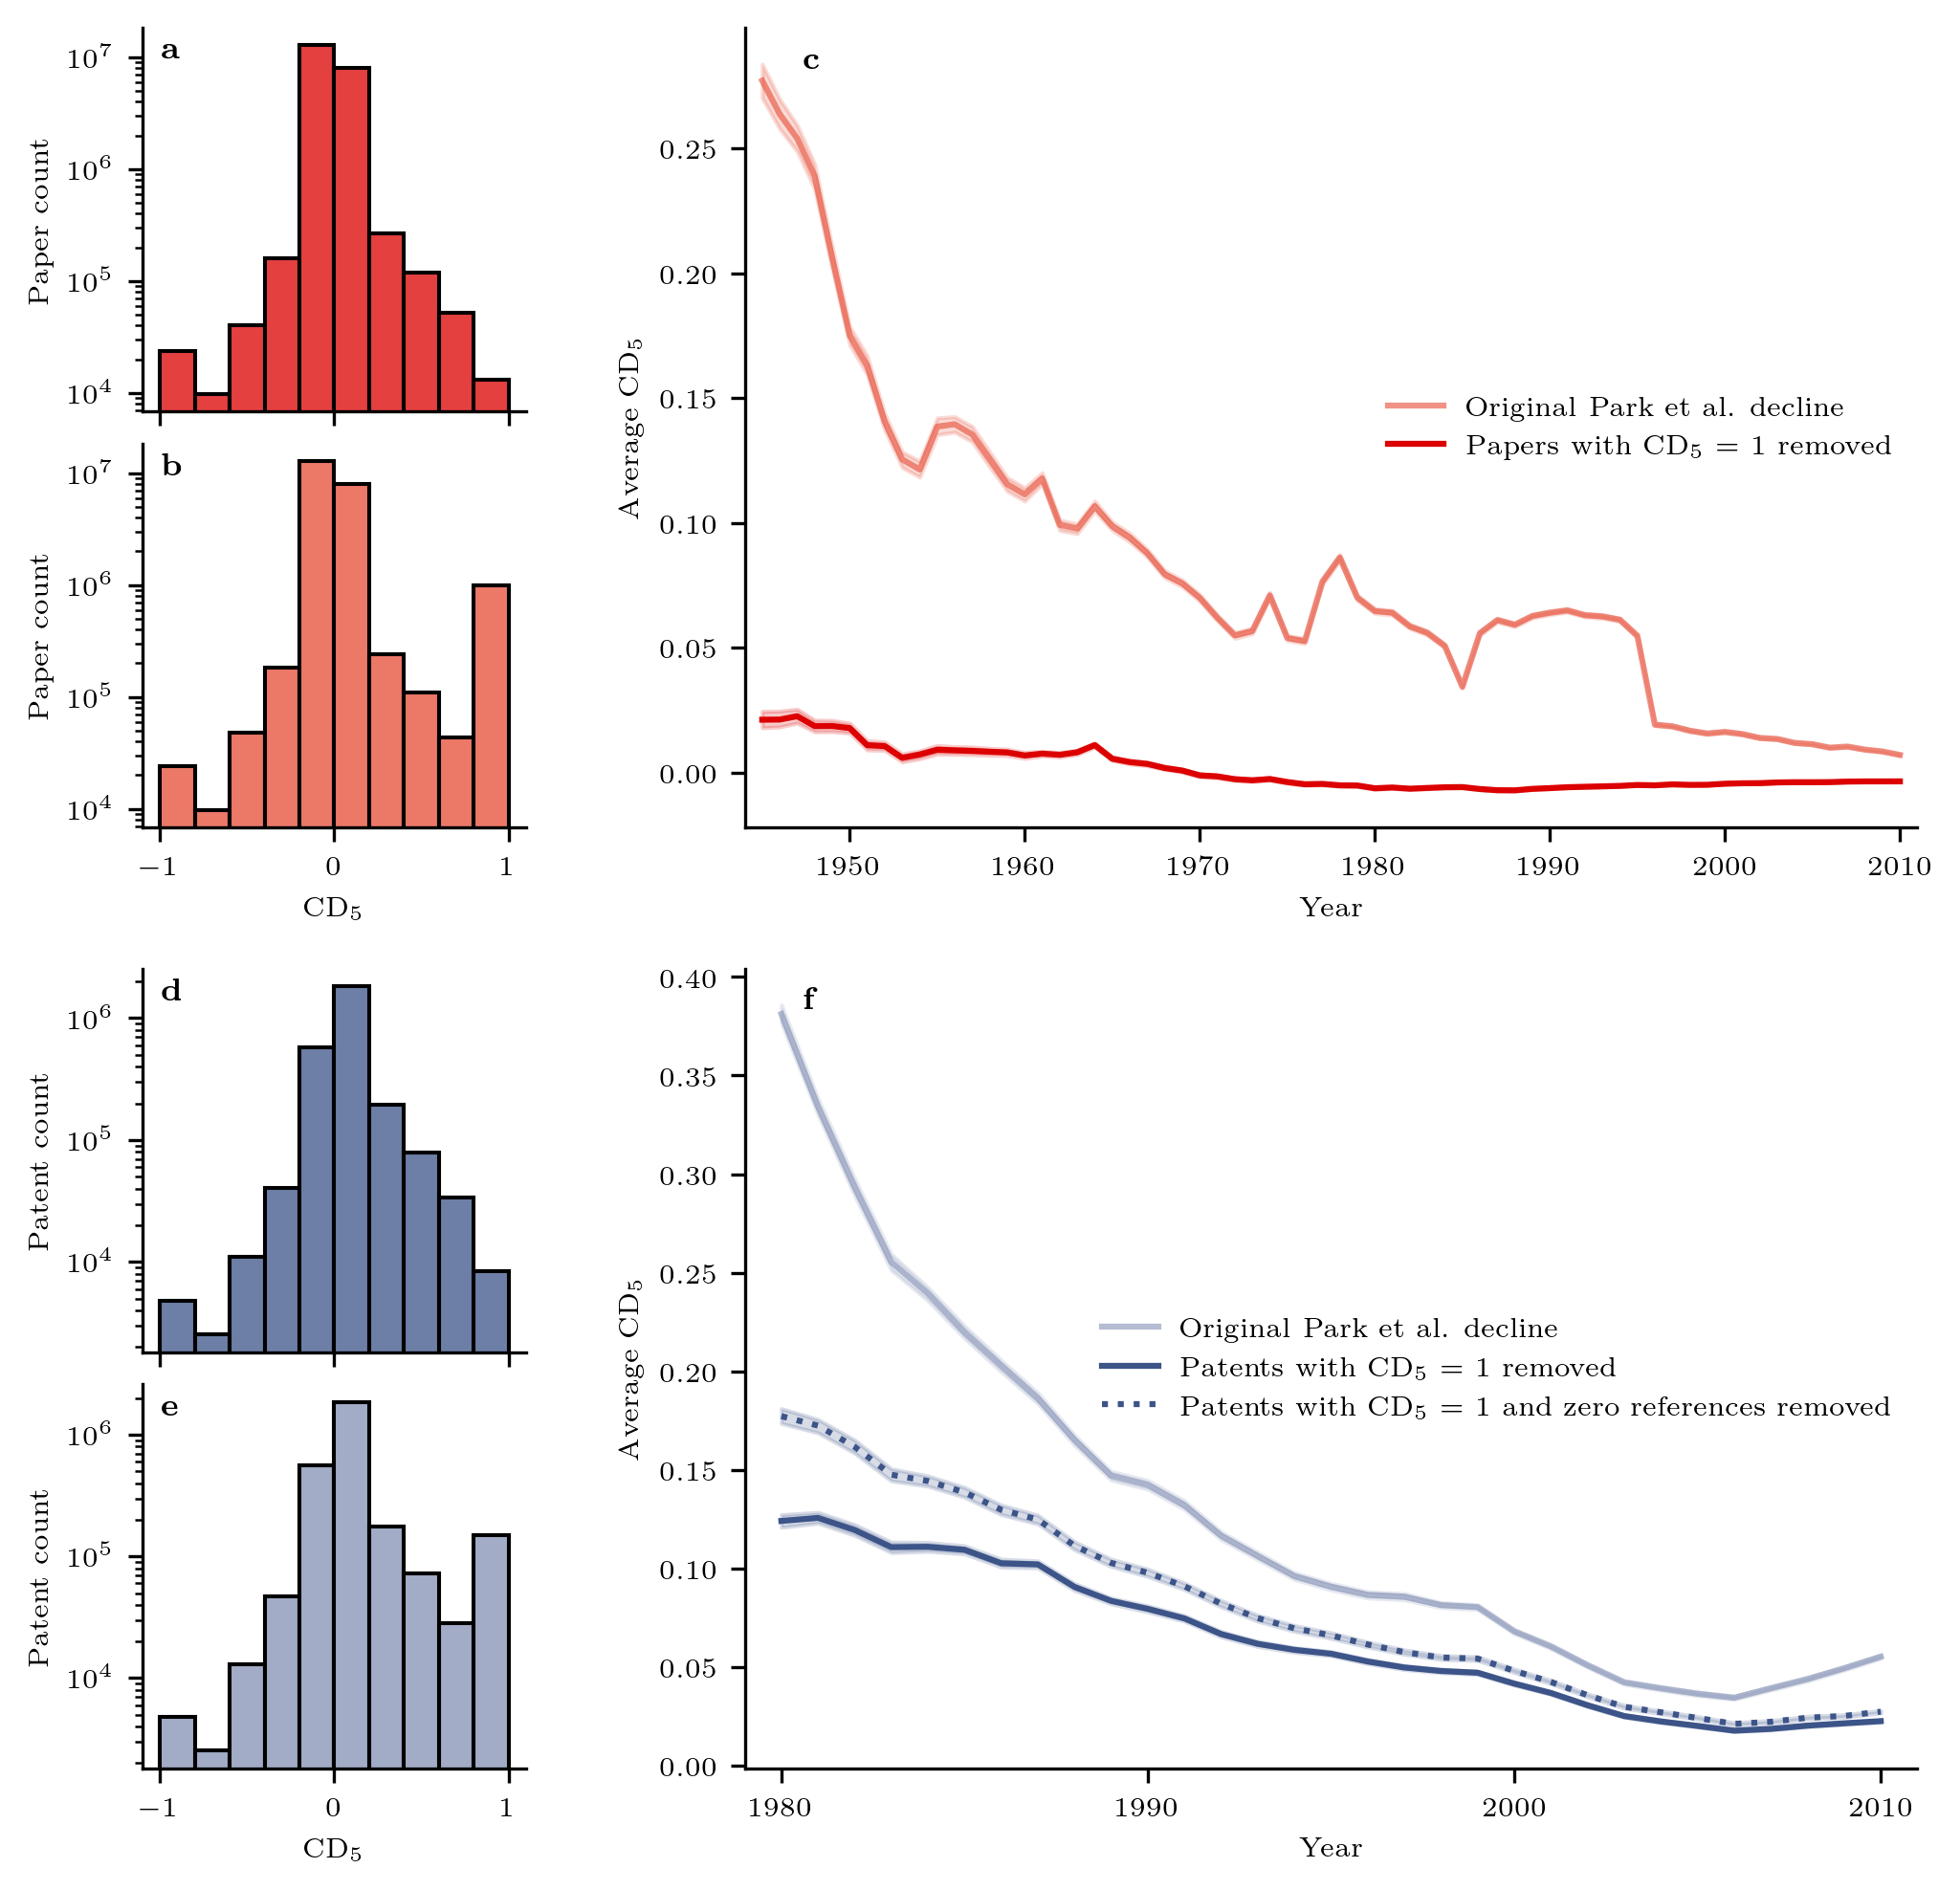

In [53]:
### WARNING: This cell can take some time to run ~10 min ###

CONFIDENCE_INTERVAL = 95 

### RECOMMENDATION: For faster runtime, set CONFIDENCE_INTERVAL to None ### 

Figure1, ax1 = plt.subplot_mosaic([['A','.','C','C'],
                                   ['B','.','C','C'],
                                   ['.','.','.','.'],
                                   ['D','.','F','F'],
                                   ['E','.','F','F']
                                   ],
                                  figsize=(7.08,6.69),gridspec_kw = {'width_ratios':[1,0.2,1,1],
                                                                     'height_ratios': [1,1,0.2,1,1]},
                                                                     dpi = 300
                                                                     )

plt.rcParams['legend.title_fontsize'] = 7

#=========================================== Papers =========================================================
"""
HISTOGRAM 1: Original Seaborn Binning
"""
Histogram1 = sns.histplot(x="cd_5",
             data=wos_df,
             binwidth=0.2, #this parameter causes the error (https://github.com/mwaskom/seaborn/pull/3489)
             #bins=10,
             stat="count",
             color = '#DC0000FF',
             ax=ax1['A'])

ax1['A'].set_yscale("log")
ax1['A'].set_aspect(1/ax1['A'].get_data_ratio())
ax1['A'].set_xlabel(r'$\mathrm{CD}_5$',fontsize = 7)
ax1['A'].set_ylabel("Paper count",fontsize = 7)
ax1['A'].set_yticks([1e4,1e5,1e6,1e7])
ax1['A'].text(0.05,0.92,r'$\textbf{a}$', transform=ax1['A'].transAxes,fontsize = 8)

ax1['A'].tick_params(axis='x', labelsize=7)
ax1['A'].tick_params(axis='y', labelsize=7)
sns.despine(ax=ax1['A'],left=False, bottom=False)

del Histogram1
gc.collect()

"""
HISTOGRAM 2: Correct Seaborn Binning
"""

Histogram2 = sns.histplot(x="cd_5",
             data=wos_df,
             #binwidth=0.2,
             bins=10,
             stat="count",
             color = '#E64B3599',
             ax=ax1['B'])

ax1['B'].set_yscale("log")
ax1['B'].set_aspect(1/ax1['B'].get_data_ratio())
ax1['B'].set_xlabel(r'$\mathrm{CD}_5$',fontsize = 7)
ax1['B'].set_yticks([1e4,1e5,1e6,1e7])
ax1['B'].set_ylabel("Paper count",fontsize = 7)
ax1['B'].text(0.05,0.92,r'$\textbf{b}$', transform=ax1['B'].transAxes,fontsize = 8)


ax1['B'].tick_params(axis='x', labelsize=7)
ax1['B'].tick_params(axis='y', labelsize=7)
sns.despine(ax=ax1['B'],left=False, bottom=False)

del Histogram2
gc.collect()

ax1['A'].get_shared_x_axes().join(ax1['B'], ax1['B'])
ax1['A'].set_xticklabels([])

"""
Lineplot 1: CD_5 evolution over time for papers
"""

#Plot with no papers removed
wosfull = sns.lineplot(data=wos_df,
             x="year",
             y="cd_5",
             color = '#E64B3599',
             ci=95,
             ax = ax1['C'])

ax1['C'].set_xlim(config.PAPER_MIN_YEAR, config.PAPER_MAX_YEAR)
xticks = config.PAPER_YEAR_TICKS
ax1['C'].set_xticks(xticks,[str(x) for x in xticks])
ax1['C'].set_xlabel("Year",fontsize = 7)
ax1['C'].set_ylabel(r"Average $\mathrm{CD}_5$",fontsize = 7)
ax1['C'].text(0.05,0.95,r'$\textbf{c}$', transform=ax1['C'].transAxes,fontsize = 8)


ax1['C'].tick_params(axis='x', labelsize=7)
ax1['C'].tick_params(axis='y', labelsize=7)
sns.despine(ax=ax1['C'],left=False, bottom=False)

del wosfull
gc.collect()

#Plot with papers with CD_5=1 removed

#Mask to remove CD indices with value 1
mask=wos_df.cd_5!=1

wos_p1 = sns.lineplot(data=wos_df[mask],
             x="year",
             y="cd_5",
             color = '#DC0000FF',
             ci=95,
             ax = ax1['C'])

del wos_p1
gc.collect()

legpapers = ax1['C'].legend(labels=['No papers removed','' ,r'Papers with $\mathrm{CD}_5$ = 1 removed'],loc = 'center right',fontsize = 7)
h = legpapers.get_lines()
legpapers_b = ax1['C'].legend(handles = [h[0],h[1]],
                              labels=['Original Park et al. decline' ,r'Papers with $\mathrm{CD}_5$ = 1 removed'],
                              loc = 'center right',
                              fontsize = 7
                              )
legpapers_b.get_frame().set_linewidth(0.0)

#=========================================== Patents =========================================================

"""
HISTOGRAM 3: Original Seaborn Binning
"""
Histogram3 = sns.histplot(x="cd_5",
             data=patentsview_df,
             binwidth=0.2, #this parameter causes the error (https://github.com/mwaskom/seaborn/pull/3489)
             #bins=10,
             stat="count",
             color = '#3C5488FF',
             ax=ax1['D'])
ax1['D'].set_yscale("log")
ax1['D'].set_aspect(1/ax1['D'].get_data_ratio())
ax1['D'].set_xlabel(r"$\mathrm{CD}_5$",fontsize =7)
ax1['D'].set_ylabel("Patent count",fontsize = 7)
ax1['D'].set_yticks([1e4,1e5,1e6])
ax1['D'].text(0.05,0.92,r'$\textbf{d}$', transform=ax1['D'].transAxes,fontsize = 8)


ax1['D'].tick_params(axis='x', labelsize=7)
ax1['D'].tick_params(axis='y', labelsize=7)
sns.despine(ax=ax1['D'],left=False, bottom=False)

del Histogram3
gc.collect()

"""
HISTOGRAM 4: Correct Seaborn Binning
"""

Histogram4 = sns.histplot(x="cd_5",
             data=patentsview_df,
             #binwidth=0.2,
             bins=10,
             stat="count",
             color = '#8491B499',
             ax=ax1['E'])
ax1['E'].set_yscale("log")
ax1['E'].set_aspect(1/ax1['E'].get_data_ratio())
ax1['E'].set_xlabel(r"$\mathrm{CD}_5$",fontsize = 7)
ax1['E'].set_ylabel("Patent count",fontsize = 7)
ax1['E'].set_yticks([1e4,1e5,1e6])

ax1['E'].tick_params(axis='x', labelsize=7)
ax1['E'].tick_params(axis='y', labelsize=7)
ax1['E'].text(0.05,0.92,r'$\textbf{e}$', transform=ax1['E'].transAxes,fontsize = 8)


ax1['D'].get_shared_x_axes().join(ax1['E'], ax1['E'])
ax1['D'].set_xticklabels([])
sns.despine(ax=ax1['E'],left=False, bottom=False)

del Histogram4
gc.collect()
"""
Lineplot 2: CD_5 evolution over time for patents
"""

#Plot with no patents removed
patentsviewfull = sns.lineplot(data=patentsview_df,
             x="grant_year",
             y="cd_5",
             color = '#8491B499',
             ci=95,
             ax = ax1['F'])
ax1['F'].set_xlim(config.PATENT_MIN_YEAR, config.PATENT_MAX_YEAR)
xticks = config.PATENT_YEAR_TICKS
ax1['F'].set_xticks(xticks,[str(x) for x in xticks])
ax1['F'].set_xlabel("Year",fontsize = 7)
ax1['F'].set_ylabel(r"Average $\mathrm{CD}_5$",fontsize = 7)
ax1['F'].text(0.05,0.95,r'$\textbf{f}$', transform=ax1['F'].transAxes,fontsize = 8)

ax1['F'].tick_params(axis='x', labelsize=7)
ax1['F'].tick_params(axis='y', labelsize=7)
sns.despine(ax=ax1['F'],left=False, bottom=False)                                       

#Plot with patents with CD_5=1 removed

#Mask to remove CD indices with value 1
mask=patentsview_df.cd_5!=1

patentsview_p1 = sns.lineplot(data=patentsview_df[mask],
             x="grant_year",
             y="cd_5",
             color = '#3C5488FF',
             ci=95,
             ax = ax1['F'])

#Plot with patents with zero references removed

#Mask to remove patents with zero references
mask=patentsview_df.cited_total!=0

patentsview_zero_ref = sns.lineplot(data=patentsview_df[mask],
                x="grant_year",
                y="cd_5",
                color = '#3C5488FF',
                linestyle = ':',
                ci=95,
                ax = ax1['F'])

legpatents = ax1['F'].legend(labels=['No patents removed',
                                     '', 
                                     r'Patents with $\mathrm{CD}_5$ = 1 removed',
                                     '',
                                     'Patents with zero references removed'],
                             loc = 'center right',
                             fontsize = 7)
h = legpatents.get_lines()
legpatents_b = ax1['F'].legend(handles = [h[0],h[1], h[2]],
                               labels=['Original Park et al. decline', 
                                       r'Patents with $\mathrm{CD}_5$ = 1 removed',
                                       'Patents with $\mathrm{CD}_5$ = 1 and zero references removed'],
                               loc = 'center right',
                               fontsize = 7)

legpatents_b.get_frame().set_linewidth(0.0)


del patentsviewfull
del patentsview_p1
del patentsview_zero_ref
gc.collect()

Figure1.tight_layout()
Figure1.subplots_adjust(hspace = 0.1,wspace = 0)
Figure1.savefig(config.OUTPUT_PATH+'Figure1_final.pdf')

# Figure 2

The reason why the robustness checks in Park et al. (2023) failed to detect the consequences of the hidden outliers.

To reproduce our findings, first download the replication data under the following link: https://zenodo.org/records/10619476. Then insert patentsview_residuals_1.npy, patentsview_residuals_2.npy, SciSciNet_residuals_1.npy and SciSciNet_residuals_2.npy in the data folder. 

In [52]:
#Load Patentsview residuals and add them to the patentsview_df dataframe

residuals_1=np.load(config.DATA_PATH+'patentsview_residuals_1.npy') #model 3 in Supplementary Table S1
residuals_2=np.load(config.DATA_PATH+'patentsview_residuals_2.npy') #model 4 in Supplementary Table S1
#Add the residuals to the patentsview_df dataframe
mask=patentsview_df.cd_5.notna()
patentsview_df.loc[mask,'residuals_squared_1']=residuals_1**2
patentsview_df.loc[mask,'residuals_squared_2']=residuals_2**2
#R2 values for the reference dummies for patents
R2_reference_dummy_patents=[0.10, 0.52, 0.11, 0.10, 0.10, 0.10, 0.10] #calculated in regression_adjustments_patentsview.ipynb

#Load the SciSciNet residuals
residuals_1=np.load(config.DATA_PATH+'SciSciNet_residuals_1.npy') #model 1 in Supplementary Table S1
residuals_2=np.load(config.DATA_PATH+'SciSciNet_residuals_2.npy') #model 2 in Supplementary Table S1
#Add the residuals to the SciSciNet_df dataframe
mask=SciSciNet_df.cd_5.notna()
SciSciNet_df.loc[mask,'residuals_squared_1']=residuals_1**2
SciSciNet_df.loc[mask,'residuals_squared_2']=residuals_2**2
#R2 values for the reference dummies for papers
R2_reference_dummy_papers=[0.15, 0.95, 0.16, 0.17, 0.17, 0.17, 0.17] #calculated in regression_adjustments_sciscinet.ipynb

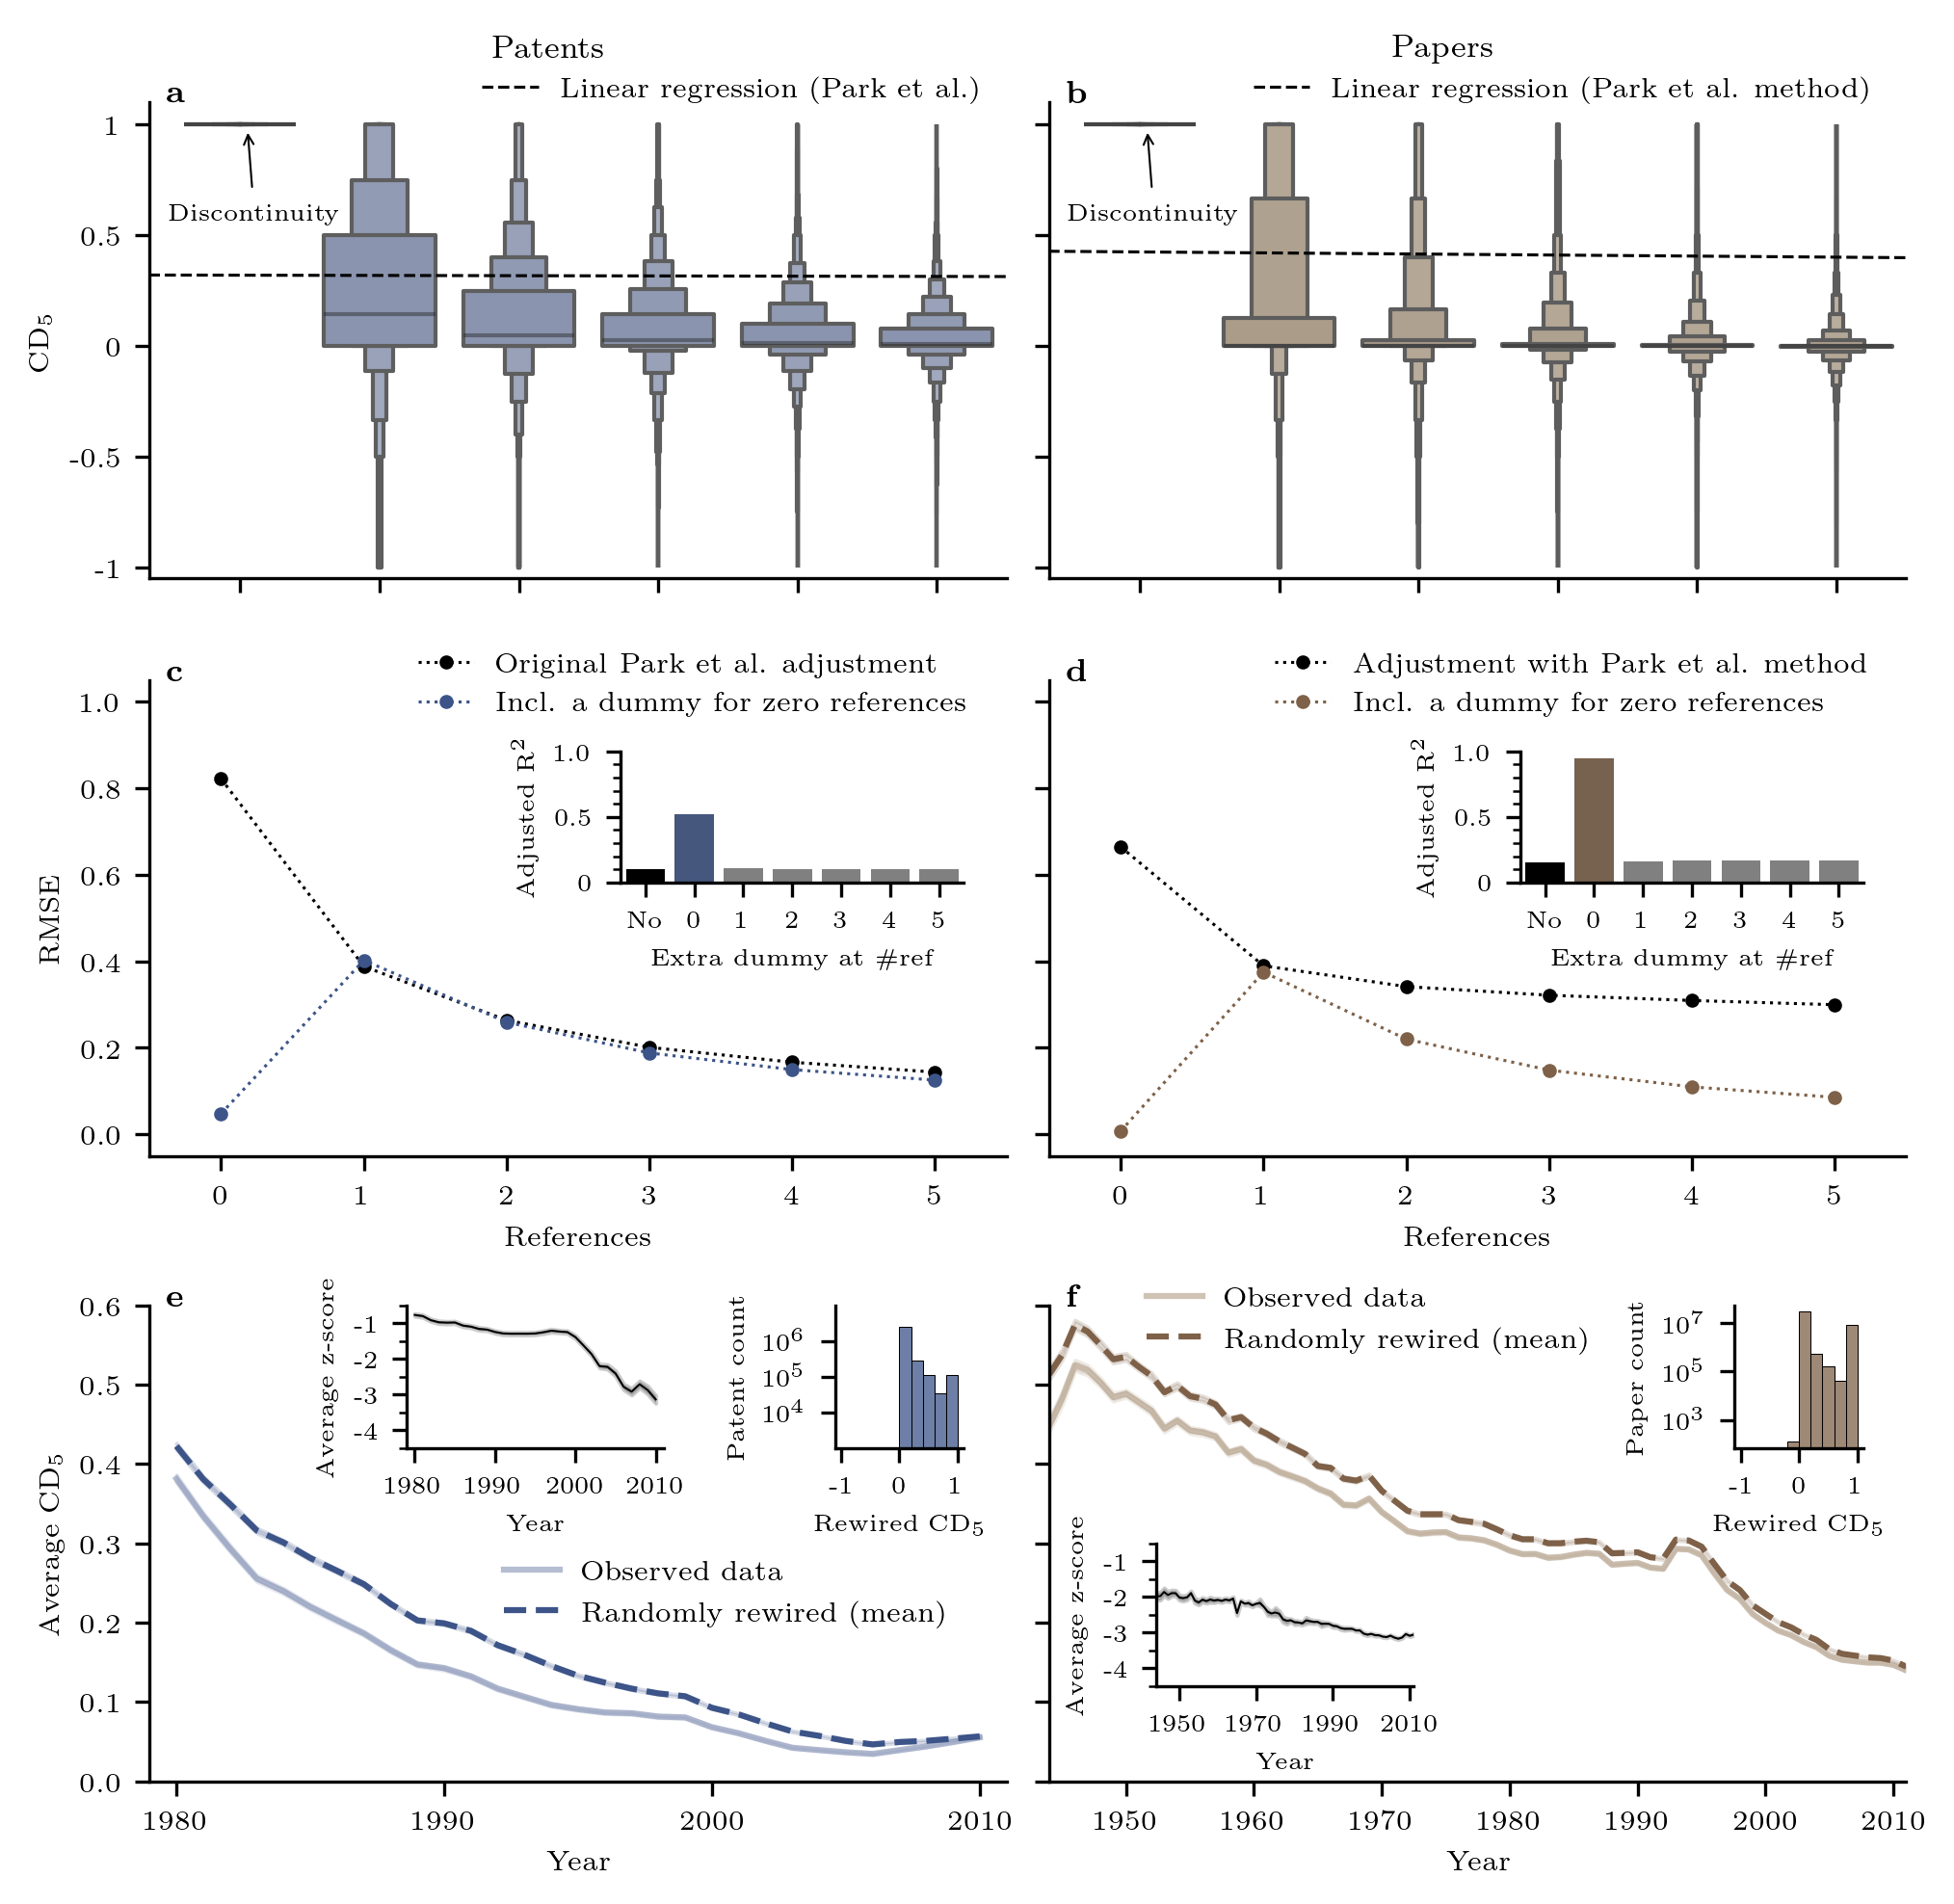

In [61]:
### WARNING: This cell can take some time to run ~30 min ###

CONFIDENCE_INTERVAL = 95 

### RECOMMENDATION: For faster runtime, set CONFIDENCE_INTERVAL to None ### 

### NOTE: In the z score inset in panel F we mask z scores with absolute values greater than 10.000 in the SciSciNet_rewired_df dataframe. ### 
### We therefore filter out 21 of 39,888,199 values in the plot, most of which correspond to floating point errors in the denominator of the z score. ###

Figure2, ax2 = plt.subplot_mosaic([['1', '1', '.', '2','2'],
                                   ['A','A', '.', 'B', 'B'],
                                   ['.','.','.','.','.'],
                                   ['C','C','.','D', 'D'],
                                    ['.','.','.','.','.'],
                                   ['E', 'E','.', 'F', 'F']],
                                  figsize=(7.08,6.69),
                                  gridspec_kw = {'width_ratios':[1, 1, 0.1, 1, 1],
                                                 'height_ratios': [0.1, 1, 0.1, 1, 0.2, 1]},
                                                 dpi = 300
                                                 )


plt.rcParams['legend.title_fontsize'] = 7

#---------------------------------------------1---------------------------------------------
ax2['1'].set_axis_off()
ax2['1'].text(0.4,0.4,'Patents', transform=ax2['1'].transAxes,fontsize = 8)

#---------------------------------------------2---------------------------------------------
ax2['2'].set_axis_off()
ax2['2'].text(0.4,0.4,'Papers', transform=ax2['2'].transAxes,fontsize = 8)

#====================== Discontinuity at zero references =================================== 
"""
a: Distribution of CD index against number of references for patents 
"""

# Add the regression line y=0.32-0.00111*x=alpha+beta_1*x (see model 3 in Supplementary Table S1)
regplot1=sns.lineplot(x=np.arange(-1, 6, 0.1),
                      y=0.32-0.00111*np.arange(-1, 6, 0.1),
                      linestyle="--",
                      linewidth=0.75,
                      color="black",
                      ax=ax2["A"]
                      )
                      

boxenplot1=sns.boxenplot(
    data=patentsview_df[patentsview_df["cited_total"] <= 5],
    x="cited_total",
    y="cd_5",
    color="#8491B499",
    linewidth=1,
    showfliers=True,
    ax=ax2["A"]
)

ax2["A"].set(xlim=(-0.65, 5.5))
ax2["A"].set(ylim=(-1.05, 1.1))
ax2["A"].set_xlabel("", fontsize = 7)
ax2["A"].set_xticks(ticks=[0,1,2,3,4,5], labels=["","","","","",""], fontsize=7)
ax2["A"].set_ylabel(r"$\mathrm{CD}_5$", fontsize = 7)
ax2["A"].set_yticks(ticks=[-1,-0.5,0,0.5,1], labels=["-1","-0.5","0","0.5","1"], fontsize=7)
ax2["A"].set_title("")

ax2['A'].text(0.02,1,r'$\textbf{a}$', transform=ax2['A'].transAxes,fontsize = 8)

ax2['A'].annotate('Discontinuity', xy=(0.05, 1), xytext=(0.1, 0.55),
             arrowprops=dict(facecolor='black', arrowstyle='->', linewidth=0.5),
             horizontalalignment='center', verticalalignment='bottom', fontsize=6)

# legend
ax2['A'].legend(
    handles=[
        Line2D([0], [0], color='black', linestyle='--', linewidth=0.75,
               markersize=1,
               label='Linear regression (Park et al.)'
               )
    ],
    loc=(0.375, 0.975),
    frameon=False,
    fontsize=7,
)

sns.despine(ax=ax2["A"],left=False, bottom=False)

del boxenplot1, regplot1
gc.collect()

"""
b: Distribution of CD index against number of references for papers 
"""

#Add the regression line y=0.4250995-0.0047266*x=alpha+beta_1*x (see model 1 in Supplementary Table S1)

regplot2=sns.lineplot(x=np.arange(-1, 6, 0.1),
              y=0.4250995-0.0047266*np.arange(-1, 6, 0.1),
              linestyle="--",
              linewidth=0.75,
              color="black",
              ax=ax2["B"]
              )

boxenplot2=sns.boxenplot(
    data=SciSciNet_df[SciSciNet_df["references"] <= 5],
    x="references",
    y="cd_5",
    color="#B09C8599",
    linewidth=1,
    showfliers=True,
    ax=ax2["B"]
)

ax2["B"].set(xlim=(-0.65, 5.5))
ax2["B"].set(ylim=(-1.05, 1.1))
ax2["B"].set_xlabel("", fontsize = 7)
ax2["B"].set_xticks(ticks=[0,1,2,3,4,5], labels=["","","","","",""], fontsize=7)
ax2["B"].set_ylabel(r"", fontsize = 7)
ax2["B"].set_yticks(ticks=[-1,-0.5,0,0.5,1], labels=["","","","",""], fontsize=7)
ax2["B"].set_title("")

ax2['B'].text(0.02,1,r'$\textbf{b}$', transform=ax2['B'].transAxes,fontsize = 8)

ax2['B'].annotate('Discontinuity', xy=(0.05, 1), xytext=(0.1, 0.55),
             arrowprops=dict(facecolor='black', arrowstyle='->', linewidth=0.5),
             horizontalalignment='center', verticalalignment='bottom', fontsize=6)

# legend
ax2['B'].legend(
    handles=[
        Line2D([0], [0], color='black', linestyle='--', linewidth=0.75,
               markersize=1,
               label='Linear regression (Park et al. method)'
               )
    ],
    loc=(0.225, 0.975),
    frameon=False,
    fontsize=7,
)

sns.despine(ax=ax2["B"],left=False, bottom=False)

del boxenplot2, regplot2
gc.collect()


#================================= Regression =================================== 

"""
c: Regression adjustment plot for patents 
"""

#Calculate mean residuals_squared_1 per cited_total
mask=patentsview_df["cited_total"] <= 5
rmse_1_mean=np.sqrt(patentsview_df[mask].groupby('cited_total')['residuals_squared_1'].mean().values)
rmse_1=ax2['C'].errorbar(
                x=np.arange(0, 6, 1),
                y=rmse_1_mean,
                color="black",
                linestyle=':',
                linewidth=0.75,
                marker='.',
                markersize=5
                )


#Calculate mean residuals_squared_2 per cited_total
mask=patentsview_df["cited_total"] <= 5
rmse_2_mean=np.sqrt(patentsview_df[mask].groupby('cited_total')['residuals_squared_2'].mean().values)
rmse_2=ax2['C'].errorbar(x=np.arange(0, 6, 1),
                y=rmse_2_mean,
                color='#3C5488FF',
                linestyle=':',
                linewidth=0.75,
                marker='.',
                markersize=5
                )

ax2['C'].set_xlabel("References", fontsize=7)
ax2['C'].set(xlim=(-0.5, 5.5))
ax2['C'].set_ylim(-0.05, 1.05)
ax2['C'].set_ylabel("RMSE", fontsize = 7)
ax2['C'].set_xticks(ticks=[0,1,2,3,4,5], labels=[r"0","1","2","3","4","5"], fontsize=7)
yticks=np.arange(0, 1.2, 0.2) 
ax2['C'].set_yticks(ticks=yticks, labels=[str(x)[0:3] for x in yticks], fontsize=7)
ax2['C'].set_title("")
ax2['C'].text(0.02,1,r'$\textbf{c}$', transform=ax2['C'].transAxes,fontsize = 8)

sns.despine(ax=ax2['C'],left=False, bottom=False)

# legend
ax2['C'].legend(
    handles=[
        Line2D([0], [0], color='black', marker='.', markersize=5, linestyle=':', linewidth=0.75,
               label=r'Original Park et al. adjustment'),
        Line2D([0], [0], color='#3C5488FF', marker='.', markersize=5, linestyle=':', linewidth=0.75,
               label=r'Incl. a dummy for zero references'),
    ],
    loc=(0.3,0.9),
    frameon=False,
    fontsize=7,
)

del rmse_1, rmse_2
gc.collect()

ax2['C_inset'] = ax2['C'].inset_axes([0.55, 0.575, 0.4, 0.275])


#HUE FOR COLORING THE BARS
HUE=[0, 1, 2, 2, 2, 2, 2]

#Plot the R2_reference_dummy_patents as a line
patent_dummies=sns.barplot(x=np.arange(0, 7, 1),
                            y=R2_reference_dummy_patents,
                            hue=HUE,
                            dodge=False,
                            palette=['black', '#3C5488FF', 'grey'],
                            ax=ax2["C_inset"]
                            )

ax2['C_inset'].set_xlabel(r"Extra dummy at $\# \mathrm{ref}$", fontsize=6)
ax2['C_inset'].set_ylabel(r"Adjusted $\mathrm{R}^2$", fontsize = 6)
ax2['C_inset'].set_xticks(ticks=[0,1,2,3,4,5, 6], labels=[r"No","0","1","2","3","4", "5"], fontsize=6)
yticks=np.arange(0, 1.1, 0.5)
ax2['C_inset'].set_yticks(yticks, labels=['0', '0.5', '1.0'], fontsize=6, minor=False)
ax2['C_inset'].set_yticks([0.1, 0.2, 0.3, 0.4, 0.6, 0.7, 0.8, 0.9],labels=['', '', '', '', '', '', '', ''], minor=True)
ax2['C_inset'].set_title("")
#Remove legend of inset 
ax2['C_inset'].get_legend().remove()
sns.despine(ax=ax2['C_inset'],left=False, bottom=False) 

del patent_dummies
gc.collect()

"""
d: Regression adjustment plot for papers 
"""

#Calculate mean residuals_squared_1 per number of references
mask=SciSciNet_df["references"] <= 5
rmse_1_mean=np.sqrt(SciSciNet_df[mask].groupby('references')['residuals_squared_1'].mean().values)
rmse_1=ax2['D'].errorbar(
                x=np.arange(0, 6, 1),
                y=rmse_1_mean,
                color="black",
                linestyle=':',
                linewidth=0.75,
                marker='.',
                markersize=5
                )


#Calculate mean residuals_squared_2 per cited_total
mask=SciSciNet_df["references"] <= 5
rmse_2_mean=np.sqrt(SciSciNet_df[mask].groupby('references')['residuals_squared_2'].mean().values)
rmse_2=ax2['D'].errorbar(x=np.arange(0, 6, 1),
                y=rmse_2_mean,
                color='#7E6148FF',
                linestyle=':',
                linewidth=0.75,
                marker='.',
                markersize=5
                )

ax2['D'].set_xlabel("References", fontsize=7)
ax2['D'].set(xlim=(-0.5, 5.5))
ax2['D'].set_ylim(-0.05, 1.05)
ax2['D'].set_ylabel('', fontsize = 7)
ax2['D'].set_xticks(ticks=[0,1,2,3,4,5], labels=[r"0","1","2","3","4","5"], fontsize=7)
yticks=np.arange(0, 1.1, 0.2) 
ax2['D'].set_yticks(ticks=yticks, labels=['' for x in yticks], fontsize=7)
ax2['D'].set_title("")
ax2['D'].text(0.02,1,r'$\textbf{d}$', transform=ax2['D'].transAxes,fontsize = 8)

sns.despine(ax=ax2['D'],left=False, bottom=False)

# legend
ax2['D'].legend(
    handles=[
        Line2D([0], [0], color='black', marker='.', markersize=5, linestyle=':', linewidth=0.75,
               label=r'Adjustment with Park et al. method'),
        Line2D([0], [0], color='#7E6148FF', marker='.', markersize=5, linestyle=':', linewidth=0.75,
               label=r'Incl. a dummy for zero references'),
    ],
    loc=(0.25,0.9),
    frameon=False,
    fontsize=7,
)

del rmse_1, rmse_2
gc.collect()

ax2['D_inset'] = ax2['D'].inset_axes([0.55, 0.575, 0.4, 0.275])

#HUE FOR COLORING THE BARS
HUE=[0, 1, 2, 2, 2, 2, 2]

#Plot the R2_reference_dummy_papers as a line
paper_dummies=sns.barplot(x=np.arange(0, 7, 1),
                            y=R2_reference_dummy_papers,
                            hue=HUE,
                            dodge=False,
                            palette=['black', '#7E6148FF', 'grey'],
                            ax=ax2["D_inset"]
                            )

ax2['D_inset'].set_xlabel(r"Extra dummy at $\# \mathrm{ref}$", fontsize=6)
ax2['D_inset'].set_ylabel(r"Adjusted $\mathrm{R}^2$", fontsize = 6)
ax2['D_inset'].set_xticks(ticks=[0,1,2,3,4,5, 6], labels=[r"No","0","1","2","3","4", "5"], fontsize=6)
yticks=np.arange(0, 1.1, 0.5)
ax2['D_inset'].set_yticks(yticks, labels=['0', '0.5', '1.0'], fontsize=6, minor=False)
ax2['D_inset'].set_yticks([0.1, 0.2, 0.3, 0.4, 0.6, 0.7, 0.8, 0.9],labels=['', '', '', '', '', '', '', ''], minor=True)
ax2['D_inset'].set_title("")

#Remove legend of inset 
ax2['D_inset'].get_legend().remove()
sns.despine(ax=ax2['D_inset'],left=False, bottom=False) 

del paper_dummies
gc.collect()

#=========================================== Simulation =========================================================

"""
e: CD_5 evolution over time for rewired patent network 
"""

original_evolution=sns.lineplot(data=patentsview_rewired_df,
             x="grant_year",
             y="cd_5_o",
             color = '#8491B499',
             ci=CONFIDENCE_INTERVAL, 
             ax = ax2['E'])
    
rewired_evolution=sns.lineplot(data=patentsview_rewired_df,
                 x="grant_year",
                 y=f"cd_5_r_mean",
                 color = '#3C5488FF',
                 linestyle = '--',
                 ci=CONFIDENCE_INTERVAL,
                 ax = ax2['E'])

ax2['E'].set_xlim(config.PATENT_MIN_YEAR, config.PATENT_MAX_YEAR)
xticks = config.PATENT_YEAR_TICKS
ax2['E'].set_xticks(xticks,[str(x) for x in xticks])
ax2['E'].set_xlabel("Year",fontsize = 7)
ax2['E'].set_ylabel(r"Average $\mathrm{CD}_5$",fontsize = 7)
ax2['E'].set_ylim(0, 0.6)
ax2['E'].text(0.02,1,r'$\textbf{e}$', transform=ax2['E'].transAxes,fontsize = 8)

ax2['E'].tick_params(axis='x', labelsize=7)
ax2['E'].tick_params(axis='y', labelsize=7)
sns.despine(ax=ax2['E'],left=False, bottom=False)

#Add an inset plot to ax2['E'] to show the distribution of the rewired CD_5
ax2['E_inset'] = ax2['E'].inset_axes([0.8, 0.7, 0.15, 0.3])

Histogram=sns.histplot(x=f"cd_5_r_mean",
                 data=patentsview_rewired_df,
                 bins=10,
                 binrange=(-1,1), 
                 stat="count",
                 color = '#3C5488FF',
                 ax=ax2['E_inset'])

ax2['E_inset'].set_yscale("log")
ax2['E_inset'].set_ylim(1e3, 1e7)
ax2['E_inset'].set_xticks([-1, 0, 1],['-1', '0', '1'], fontsize=6)
ax2['E_inset'].set_xlabel(r'Rewired $\mathrm{CD}_5$', fontsize = 6)
ax2['E_inset'].set_ylabel("Patent count",fontsize = 6)
ax2['E_inset'].set_yticks(ticks=[1e4,1e5,1e6], fontsize=6)

ax2['E_inset'].tick_params(axis='x', labelsize=6)
ax2['E_inset'].tick_params(axis='y', labelsize=6)
sns.despine(ax=ax2['E_inset'],left=False, bottom=False)

del Histogram
gc.collect()

#Add an inset plot to ax2['E'] to show the average z-score over time 
ax2['E_inset2'] = ax2['E'].inset_axes([0.3, 0.7, 0.3, 0.3])

inset_z_score=sns.lineplot(data=patentsview_rewired_df,
                x="grant_year",
                y="cd_5_zscore",
                color = 'black',
                linewidth = 0.5,
                ci=CONFIDENCE_INTERVAL, 
                ax = ax2['E_inset2'])

ax2['E_inset2'].set_xlim(config.PATENT_MIN_YEAR, config.PATENT_MAX_YEAR)
ax2['E_inset2'].set_xticks(xticks,[str(x) for x in xticks], fontsize=6)
ax2['E_inset2'].set_xlabel("Year",fontsize = 6)
ax2['E_inset2'].set_ylabel(r"Average z-score",fontsize = 6)
ax2['E_inset2'].set_ylim(-4.5, -0.5)
ax2['E_inset2'].set_yticks(ticks=[-4, -3, -2, -1], labels=["-4", "-3","-2","-1"], fontsize=6)
ax2['E_inset2'].set_yticks([-4.5, -3.5, -2.5, -1.5, -0.5],labels=['', '', '', '',''], minor=True)

sns.despine(ax=ax2['E_inset2'],left=False, bottom=False)

del inset_z_score   
gc.collect()

#Add legend
legpapers = ax2['E'].legend(labels=['original' ,'','rewired','', 
                                    ],
                                 loc = (0.45,0.6),
                                 fontsize = 7,
                                 frameon=False)
h = legpapers.get_lines()
legpapers_b = ax2['E'].legend(handles = [h[0],h[1]],
                              labels=['Observed data' ,r'Randomly rewired (mean)'],
                              loc = (0.4, 0.3),
                              #loc='lower left',
                              framealpha=0.0,
                              fontsize = 7)
legpapers_b.get_frame().set_linewidth(0.0)

del original_evolution, rewired_evolution
gc.collect()

"""
f: CD_5 evolution over time for rewired paper network 
"""

original_evolution=sns.lineplot(data=SciSciNet_rewired_df,
             x="year",
             y="cd_5_o",
             color = "#B09C8599",
             ci=CONFIDENCE_INTERVAL, 
             ax = ax2['F'])
    
rewired_evolution=sns.lineplot(data=SciSciNet_rewired_df,
                 x="year",
                 y=f"cd_5_rmean",
                 color = '#7E6148FF',
                 linestyle = '--',
                 ci=CONFIDENCE_INTERVAL,
                 ax = ax2['F'])

ax2['F'].set_xlim(config.PAPER_MIN_YEAR, config.PAPER_MAX_YEAR)
xticks = config.PAPER_YEAR_TICKS
ax2['F'].set_xticks(xticks,[str(x) for x in xticks])
ax2['F'].set_xlabel("Year",fontsize = 7)
ax2['F'].set_ylabel('',fontsize = 7)
ax2['F'].set_ylim(0, 0.6)
yticks=np.arange(0, 0.7, 0.1)
ax2['F'].set_yticks(yticks, ['' for y in yticks], fontsize=7)
ax2['F'].text(0.02,1,r'$\textbf{f}$', transform=ax2['F'].transAxes,fontsize = 8)

ax2['F'].tick_params(axis='x', labelsize=7)
ax2['F'].tick_params(axis='y', labelsize=7)
sns.despine(ax=ax2['F'],left=False, bottom=False)

#Add an inset plot to ax2['F'] to show the distribution of the rewired CD_5
ax2['F_inset'] = ax2['F'].inset_axes([0.8, 0.7, 0.15, 0.3])

Histogram=sns.histplot(x=f"cd_5_rmean",
                 data=SciSciNet_rewired_df,
                 bins=10,
                 binrange=(-1,1), 
                 stat="count",
                 color = '#7E6148FF',
                 ax=ax2['F_inset'])

ax2['F_inset'].set_yscale("log")
ax2['F_inset'].set_xticks([-1, 0, 1],['-1', '0', '1'], fontsize=6)
ax2['F_inset'].set_xlabel(r'Rewired $\mathrm{CD}_5$', fontsize = 6)
ax2['F_inset'].set_ylabel("Paper count",fontsize = 6)
ax2['F_inset'].set_yticks(ticks=[1e3,1e5,1e7], fontsize=6)

ax2['F_inset'].tick_params(axis='x', labelsize=6)
ax2['F_inset'].tick_params(axis='y', labelsize=6)
sns.despine(ax=ax2['F_inset'],left=False, bottom=False)

del Histogram
gc.collect()

#Add an inset plot to ax2['F'] to show the average z-score over time 
ax2['F_inset2'] = ax2['F'].inset_axes([0.125, 0.2, 0.3, 0.3])

#Aforementioned mask to remove large z scores (mostly due) to floating point issues in calculation of the standard deviation 
#--> 21 data points in total removed
mask=abs(SciSciNet_rewired_df['cd_5_zscore'])<=10000

inset_z_score=sns.lineplot(data=SciSciNet_rewired_df[mask],
                x="year",
                y="cd_5_zscore",
                color = 'black',
                linewidth = 0.5,
                ci=CONFIDENCE_INTERVAL, 
                ax = ax2['F_inset2'])

ax2['F_inset2'].set_xlim(config.PAPER_MIN_YEAR, config.PAPER_MAX_YEAR)
xticks=[1950, 1970, 1990, 2010]
ax2['F_inset2'].set_xticks(xticks,[str(x) for x in xticks], fontsize=6)
ax2['F_inset2'].set_xlabel("Year",fontsize = 6)
ax2['F_inset2'].set_ylabel(r"Average z-score",fontsize = 6)
ax2['F_inset2'].set_ylim(-4.5, -0.5)
ax2['F_inset2'].set_yticks(ticks=[-4, -3, -2, -1], labels=["-4", "-3","-2","-1"], fontsize=6)
ax2['F_inset2'].set_yticks([-4.5, -3.5, -2.5, -1.5, -0.5],labels=['', '', '', '',''], minor=True)


sns.despine(ax=ax2['F_inset2'],left=False, bottom=False)

del inset_z_score   
gc.collect()

#Add legend
legpapers = ax2['F'].legend(labels=['original' ,'','rewired','', 
                                    ],
                                 loc = (0.45,0.6),
                                 fontsize = 7,
                                 frameon=False)
h = legpapers.get_lines()
legpapers_b = ax2['F'].legend(handles = [h[0],h[1]],
                              labels=['Observed data' ,'Randomly rewired (mean)'],
                              loc = (0.1, 0.875),
                              framealpha=0.0,
                              fontsize = 7)
legpapers_b.get_frame().set_linewidth(0.0)

del original_evolution, rewired_evolution
gc.collect()

Figure2.tight_layout()
Figure2.subplots_adjust(hspace = 0.1,wspace = 0)
Figure2.savefig(config.OUTPUT_PATH+'Figure2_final.pdf')

# Extended Figure 1

Distribution of the $\mathbf{\mathrm{CD}_5}$ index with vs without the hidden outliers and its impact on the disruptiveness for the $\textit{SciSciNet}$ data source.

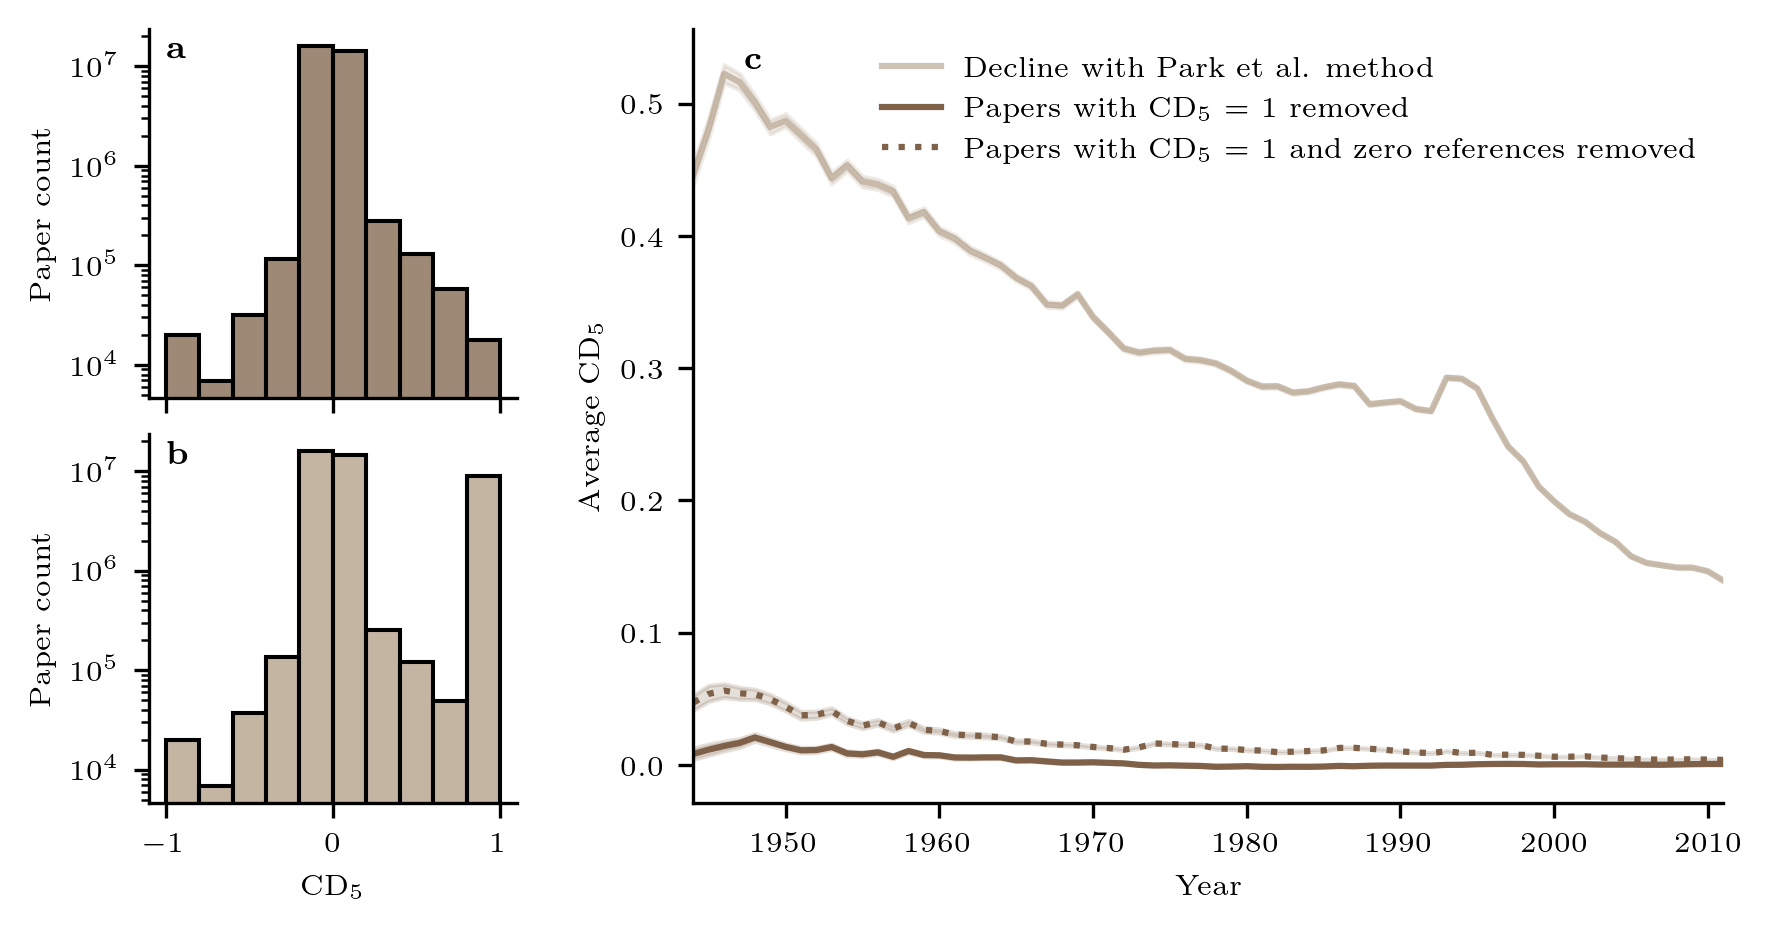

In [13]:
### WARNING: This cell is very memory intensive, in case it crashes we recommend loading a smaller sample of SciSciNet and try again ###

CONFIDENCE_INTERVAL=95

### RECOMMENDATION: For faster runtime, set CONFIDENCE_INTERVAL to None ### 

ExtendedFigure1, Extax1 = plt.subplot_mosaic([
                                              ['A','.','C','C'],
                                              ['B','.','C','C']
                                              ],
                                            figsize=(7.08661,3.346455),
                                            gridspec_kw = {'width_ratios':[1,0.2,1,1],'height_ratios': [1,1]},
                                            dpi = 300
                                            )

plt.rcParams['legend.title_fontsize'] = 7

"""
HISTOGRAM 1: Original Seaborn Binning
"""
Histogram1 = sns.histplot(x="cd_5",
             data=SciSciNet_df,
             binwidth=0.2, #this parameter causes the error (https://github.com/mwaskom/seaborn/pull/3489)
             #bins=10,
             stat="count",
             color ='#7E6148FF',
             ax=Extax1['A'])
Extax1['A'].set_yscale("log")
Extax1['A'].set_aspect(1/Extax1['A'].get_data_ratio())
Extax1['A'].set_ylabel("Paper count",fontsize = 7)
Extax1['A'].set_yticks([1e4,1e5,1e6, 1e7])

Extax1['A'].tick_params(axis='x', labelsize=7)
Extax1['A'].tick_params(axis='y', labelsize=7)
Extax1['A'].text(0.05,0.92,r'$\textbf{a}$', transform=Extax1['A'].transAxes,fontsize = 8)
sns.despine(ax=Extax1['A'], left=False, bottom=False)

del Histogram1
gc.collect()

"""
HISTOGRAM 2: Correct Seaborn Binning
"""

Histogram2 = sns.histplot(x="cd_5",
             data=SciSciNet_df,
             #binwidth=0.2,
             bins=10,
             stat="count",
             color = '#B09C8599',
             ax=Extax1['B'])
Extax1['B'].set_yscale("log")
Extax1['B'].set_aspect(1/Extax1['B'].get_data_ratio())
Extax1['B'].set_xlabel(r"$\mathrm{CD}_{5}$",fontsize = 7)
Extax1['B'].set_ylabel("Paper count",fontsize = 7)
Extax1['B'].set_yticks([1e4,1e5,1e6, 1e7])

Extax1['B'].tick_params(axis='x', labelsize=7)
Extax1['B'].tick_params(axis='y', labelsize=7)

Extax1['A'].get_shared_x_axes().join(Extax1['A'], Extax1['B'])
Extax1['A'].set_xticklabels([])

Extax1['B'].text(0.05,0.92,r'$\textbf{b}$', transform=Extax1['B'].transAxes,fontsize = 8)
sns.despine(ax=Extax1['B'], left=False, bottom=False)

del Histogram2
gc.collect()
"""
Lineplots: CD_5 evolution over time for papers
"""

sciscinetfull = sns.lineplot(data=SciSciNet_df,
             x="year",
             y="cd_5",
             color = '#B09C8599',
             ci=95,
             ax = Extax1['C'])

Extax1['C'].set_xlim(config.PAPER_MIN_YEAR, config.PAPER_MAX_YEAR)
xticks = config.PAPER_YEAR_TICKS
Extax1['C'].set_xticks(xticks,[str(x) for x in xticks])
Extax1['C'].set_xlabel("Year",fontsize = 7)
Extax1['C'].set_ylabel(r"Average $\mathrm{CD}_{5}$",fontsize = 7)
Extax1['C'].tick_params(axis='x', labelsize=7)
Extax1['C'].tick_params(axis='y', labelsize=7)
Extax1['C'].text(0.05,0.95,r'$\textbf{c}$', transform=Extax1['C'].transAxes,fontsize = 8)
sns.despine(ax=Extax1['C'], left=False, bottom=False)

mask=SciSciNet_df.cd_5==1
sciscinet_p1 = sns.lineplot(data=SciSciNet_df[~mask],
             x="year",
             y="cd_5",
             color = '#7E6148FF',
             ci=95,
             ax = Extax1['C'])

mask=SciSciNet_df.references==0
sciscinet_ref = sns.lineplot(data=SciSciNet_df[~mask],
             x="year",
             y="cd_5",
             color = '#7E6148FF',
             linestyle = ':',
             ci=95,
             ax = Extax1['C'])


legsciscinet = Extax1['C'].legend(
    labels=['Decline with Park et al. method','',r'Papers with $\mathrm{CD}_5$ = 1 removed', '', r'Papers with $\mathrm{CD}_5$ = 1 and zero references removed'],
    loc = 'center right',
    fontsize = 7
    )

h = legsciscinet.get_lines()
legsciscinet_b = Extax1['C'].legend(handles = [h[0],h[1], h[2]],
                                    labels=['Decline with Park et al. method',r'Papers with $\mathrm{CD}_5$ = 1 removed', r'Papers with $\mathrm{CD}_5$ = 1 and zero references removed'],
                                    loc = 'upper right',
                                    fontsize = 7
                                    )
legsciscinet_b.get_frame().set_linewidth(0.0)

del sciscinetfull
del sciscinet_p1
del sciscinet_ref
gc.collect()

ExtendedFigure1.subplots_adjust(hspace = 0.1,wspace = 0)

ExtendedFigure1.savefig(config.OUTPUT_PATH+'ExtendedFigure1_final.pdf')

# Extended Figure 2

Papers and patents with $\mathrm{CD}_5=1$ predominantly make zero references.

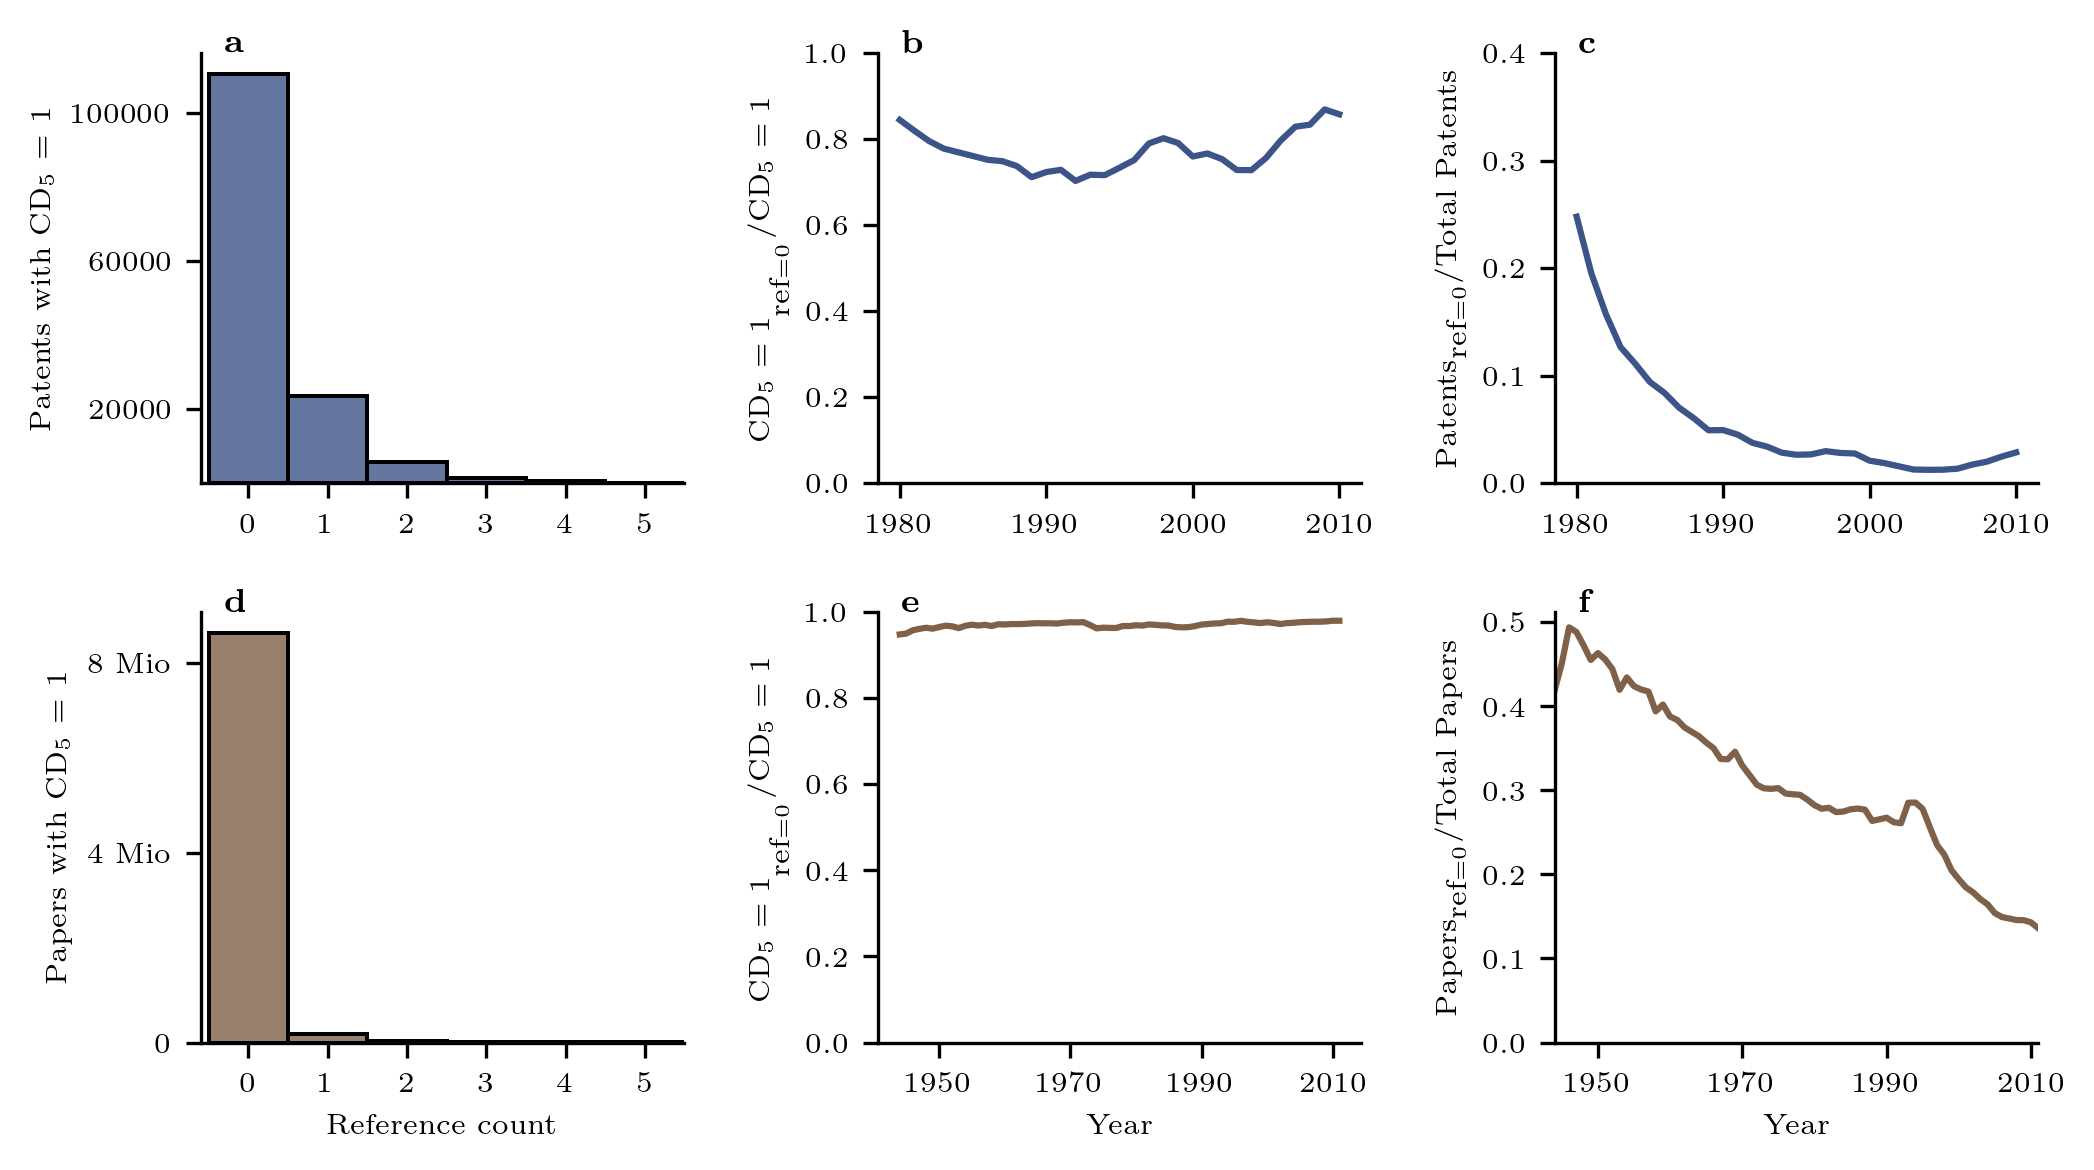

In [63]:
ExtendedFigure2, Extax2 = plt.subplot_mosaic([
                                              ['A','B','C'],
                                              ['D','E','F']
                                              ],
                                              figsize=(7.08,4),
                                              gridspec_kw = {'width_ratios':[1,1,1]},
                                              dpi = 300
                                              )


""" Panel A """
#Distribution of the reference count for patents with CD_5=1

histogram0ref = sns.histplot(data=patentsview_df[patentsview_df.cd_5==1],
             x="cited_total",
             binwidth=1,
             binrange=(0,10),
             color='#3C5488FF',
             alpha=0.8,
             discrete=True,
             ax = Extax2['A'] )

Extax2['A'].set_ylabel("Patents with $\mathrm{CD}_5$ = 1",fontsize = 7)
Extax2['A'].set_yticks([2e4,6e4,10e4])
Extax2['A'].set_xticks([0,1,2,3,4,5])
Extax2['A'].set_xlim(-0.6,5.5)
Extax2['A'].tick_params(axis='x', labelsize=7)
Extax2['A'].tick_params(axis='y', labelsize=7)
Extax2['A'].set_xlabel(None)
Extax2['A'].text(0.05,1,r'$\textbf{a}$', transform=Extax2['A'].transAxes,fontsize = 8)
sns.despine(ax=Extax2['A'], left=False, bottom=False)

del histogram0ref
gc.collect()

""" Panel B """
#Within the category of patents with CD_5=1, we calculate the relative frequency of patents with no references over time.

patents_per_year_CD5_1_ref_0 =patentsview_df[(patentsview_df.cited_total==0) & (patentsview_df.cd_5==1)].groupby('grant_year').size().to_numpy()

patents_per_year_CD5_1 =patentsview_df[(patentsview_df.cd_5==1)].groupby('grant_year').size().to_numpy()

freq_CD5_1_ref_0 = patents_per_year_CD5_1_ref_0 / patents_per_year_CD5_1 

no_references_df=pd.DataFrame({'grant_year':np.sort(patentsview_df.grant_year.unique()),
                                    'frequency':freq_CD5_1_ref_0,
                                    'category':'patents with no references'})

lineplotperyearpatents = sns.lineplot(data=no_references_df,
            x="grant_year",
            y="frequency",
            hue="category",
            palette = ['#3C5488FF'],
            ax = Extax2['B'])

Extax2['B'].set_ylabel(r'${\textrm{CD}_{5} = 1}_{ _{\textrm{ref} = 0} }/\textrm{CD}_{5} = 1$',fontsize = 7)
Extax2['B'].set_ylim(0,1)

Extax2['B'].text(0.05,1,r'$\textbf{b}$', transform=Extax2['B'].transAxes,fontsize = 8)

Extax2['B'].tick_params(axis='x', labelsize=7)
Extax2['B'].tick_params(axis='y', labelsize=7)
Extax2['B'].set_xlabel(None)
sns.despine(ax=Extax2['B'], left=False, bottom=False)

lineplotperyearpatents.legend_.remove()

del lineplotperyearpatents
gc.collect()

""" Panel C"""
#We examine the relative frequency of patents with CD_5=1 and zero references over time. 
 
#Create a mask to filter for patents with not defined CD index
mask1=patentsview_df.cd_5.isna()

#Create a mask to filter for patents with no references 
mask2=patentsview_df.cited_total==0

#Calculate the number of patents per year and store in a numpy array
patents_per_year=patentsview_df[~mask1].groupby('grant_year').size().to_numpy()
 
#Calculate the number of patents per year with no references and defined CD index, that is CD_5=1
patents_per_year_no_references=patentsview_df[~mask1 & mask2].groupby('grant_year').size().to_numpy()
 
#Calculate the frequency of patents with no references and CD_5=1
frequency_no_references=patents_per_year_no_references/patents_per_year
 
#Create a data_frame with the year and the frequency of patents with no references and CD_5=1
no_references_df=pd.DataFrame({'grant_year':np.sort(patentsview_df[~mask1].grant_year.unique()),
                                    'frequency':frequency_no_references
                                    })
 
lineplotnoreference_patents = sns.lineplot(data=no_references_df,
            x="grant_year",
            y="frequency",
            color = '#3C5488FF',
            ax = Extax2['C'])

Extax2['C'].set_ylabel(r'$\textrm{Patents}_{\textrm{ref} = 0}/\textrm{Total Patents}$',fontsize = 7)
Extax2['C'].set_ylim(0,0.4)

Extax2['C'].tick_params(axis='x', labelsize=7)
Extax2['C'].tick_params(axis='y', labelsize=7)
Extax2['C'].set_xlabel(None)
Extax2['C'].text(0.05,1,r'$\textbf{c}$', transform=Extax2['C'].transAxes,fontsize = 8)
sns.despine(ax=Extax2['C'], left=False, bottom=False)

del lineplotnoreference_patents
gc.collect()

""" Panel D """
#Distribution of the reference count for papers with CD_5=1

histogram0ref_ourdata =sns.histplot(data=SciSciNet_df[SciSciNet_df.cd_5==1],
             x="references",
             binwidth=1,
             binrange=(0,10),
             color='#7E6148FF',
             alpha=0.8,
             discrete = True,
             ax = Extax2['D'])

Extax2['D'].set_xlabel("Reference count",fontsize = 7)
Extax2['D'].set_ylabel("Papers with $\mathrm{CD}_5$ = 1",fontsize = 7)
Extax2['D'].set_xlim(-0.6,5.5)

Extax2['D'].tick_params(axis='x', labelsize=7)
Extax2['D'].tick_params(axis='y', labelsize=7)
Extax2['D'].set_yticks(ticks=[0,4e6,8e6], labels=[r"0", '4 Mio', '8 Mio'])
Extax2['D'].set_xticks([0,1,2,3,4,5])
Extax2['D'].text(0.05,1,r'$\textbf{d}$', transform=Extax2['D'].transAxes,fontsize = 8)
sns.despine(ax=Extax2['D'], left=False, bottom=False)

del histogram0ref_ourdata
gc.collect()

""" Panel E """
#Within the category of papers with CD_5=1, we calculate the relative frequency of papers with no references over time.

papers_per_year_CD5_1_ref_0 =SciSciNet_df[(SciSciNet_df.references==0) & (SciSciNet_df.cd_5==1)].groupby('year').size().to_numpy()

papers_per_year_CD5_1 =SciSciNet_df[(SciSciNet_df.cd_5==1)].groupby('year').size().to_numpy()

papers_freq_CD5_1_ref_0 = papers_per_year_CD5_1_ref_0 / papers_per_year_CD5_1 

papers_no_references_df=pd.DataFrame({'year':np.sort(SciSciNet_df.year.unique()),
                                    'frequency':papers_freq_CD5_1_ref_0,
                                    'category':'papers with no references'})

lineplotperyearpapers = sns.lineplot(data=papers_no_references_df,
            x="year",
            y="frequency",
            hue="category",
            palette=['#7E6148FF'],
            ax = Extax2['E'])
Extax2['E'].set_xlabel("Year",fontsize = 7)
xticks=[1950, 1970, 1990, 2010]
Extax2['E'].set_xticks(xticks,[str(x) for x in xticks], fontsize=7)
Extax2['E'].set_ylabel(r'${\textrm{CD}_{5} = 1}_{ _{\textrm{ref} = 0} }/\textrm{CD}_{5} = 1$',fontsize = 7)
Extax2['E'].set_ylim(0,1)

Extax2['E'].text(0.05,1,r'$\textbf{e}$', transform=Extax2['E'].transAxes,fontsize = 8)

Extax2['E'].tick_params(axis='x', labelsize=7)
Extax2['E'].tick_params(axis='y', labelsize=7)
sns.despine(ax=Extax2['E'], left=False, bottom=False)

lineplotperyearpapers.legend_.remove()
del lineplotperyearpapers
gc.collect()

""" Panel F """
#We examine the relative frequency of papers with CD_5=1 and zero references over time. 

#Create a mask to filter for papers with not defined CD index
mask1=SciSciNet_df.cd_5.isna()

#Create a mask to filter for papers with no references
mask2=SciSciNet_df.references==0 
 
#Calculate the number of papers per year and store in a numpy array
papers_per_year=SciSciNet_df[~mask1].groupby('year').size().to_numpy()
 
#Calculate the number of papers per year with no references and defined CD index, that is CD_5=1
papers_per_year_no_references=SciSciNet_df[~mask1 & mask2].groupby('year').size().to_numpy()
 
#Calculate the frequency of papers with no references and CD_5=1
frequency_no_references=papers_per_year_no_references/papers_per_year
 
#Create a data_frame with the year and the frequency of papers with no references and CD_5=1
no_references_df=pd.DataFrame({'year':np.sort(SciSciNet_df[~mask1].year.unique()),
                                    'frequency':frequency_no_references})
 
lineplotnoreference_paper = sns.lineplot(data=no_references_df,
            x="year",
            y="frequency",
            color='#7E6148FF',
            ax = Extax2['F'])

Extax2['F'].set_xlim(config.PAPER_MIN_YEAR, config.PAPER_MAX_YEAR)
Extax2['F'].set_xlabel("Year",fontsize = 7)
xticks=[1950, 1970, 1990, 2010]
Extax2['F'].set_xticks(xticks,[str(x) for x in xticks], fontsize=7)
Extax2['F'].set_ylabel(r'$\textrm{Papers}_{\textrm{ref} = 0}/\textrm{Total Papers}$',fontsize = 7)
yticks=np.arange(0,0.6,0.1)
Extax2['F'].set_yticks(ticks=yticks)
Extax2['F'].tick_params(axis='x', labelsize=7)
Extax2['F'].tick_params(axis='y', labelsize=7)
 
Extax2['F'].text(0.05,1,r'$\textbf{f}$', transform=Extax2['F'].transAxes,fontsize = 8)
sns.despine(ax=Extax2['F'], left=False, bottom=False)

del lineplotnoreference_paper
gc.collect()

ExtendedFigure2.tight_layout()
ExtendedFigure2.subplots_adjust(wspace = 0.4,hspace = 0.3)
ExtendedFigure2.savefig(config.OUTPUT_PATH+'ExtendedFigure2_final.pdf')


## Extended Figure 3

Across various data sources and within different categories, papers and patents with $\mathrm{CD}_5=1$ are driving the decline in the disruptiveness in scientific and technological knowledge over time.

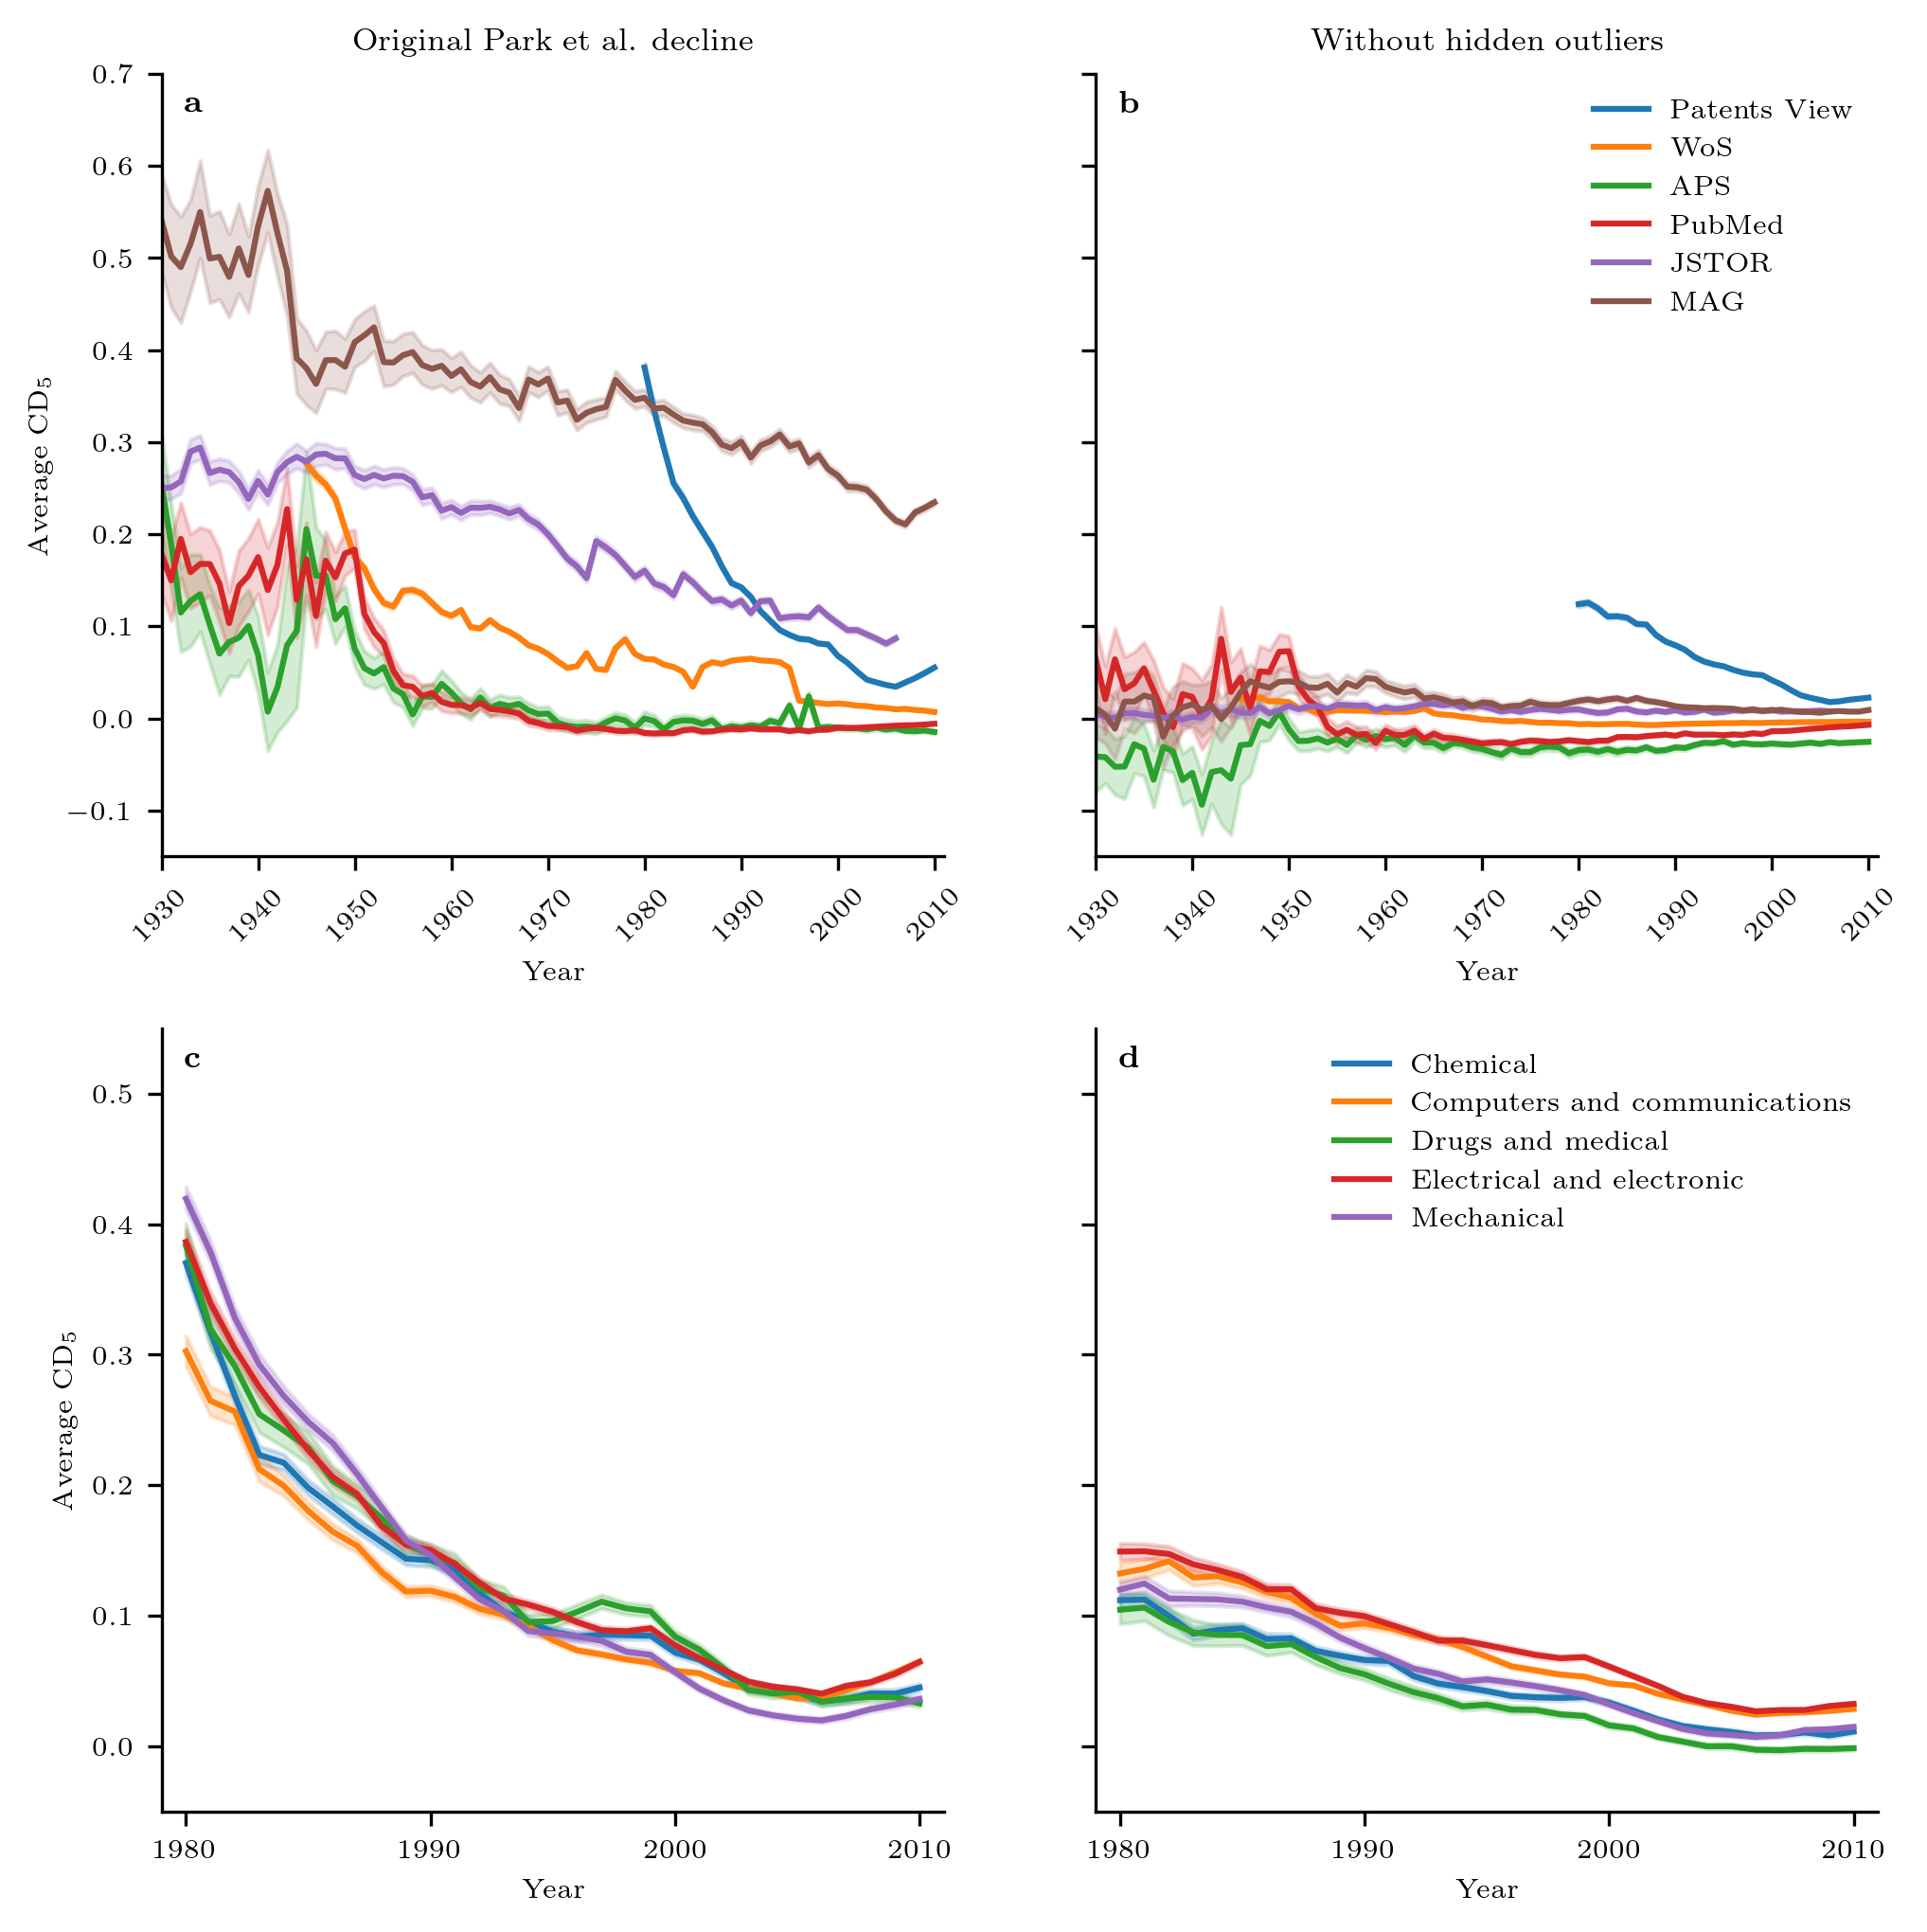

In [12]:
### Warning: This cell can take some time to run ~10 min ###

CONFIDENTIAL_INTERVAL=95

### RECOMMENDATION: For faster runtime, set CONFIDENCE_INTERVAL to None ### 

ExtendedFigure3,Extax3 = plt.subplot_mosaic([
                                            ['A','B'],
                                             ['C','D']],
                                             figsize=(7.08661,6.9),
                                             dpi = 300
                                            )

#Plot with no papers and patents removed
lineplot1 = sns.lineplot(data=unified_cdindex_df,
             x="year",
             y="cd_5",
             hue="source",
             ci=95,
             legend = None,
             ax=Extax3['A'])

Extax3['A'].set_xlim(config.PATENT_MIN_YEAR, config.PATENT_MAX_YEAR)
x_ticks = [1930, 1940, 1950, 1960, 1970] + config.PATENT_YEAR_TICKS
Extax3['A'].set_xticks(x_ticks,labels = [str(x) for x in x_ticks],rotation = 45)
Extax3['A'].set_ylim(-0.15, 0.7)
Extax3['A'].set_aspect(1/Extax3['A'].get_data_ratio())
Extax3['A'].set_xlabel("Year",fontsize = 7)
Extax3['A'].set_ylabel("Average $\mathrm{CD}_5$",fontsize = 7)

Extax3['A'].tick_params(axis='x', labelsize=7)
Extax3['A'].tick_params(axis='y', labelsize=7)

Extax3['A'].text(0.03,0.95,r'$\textbf{a}$', transform=Extax3['A'].transAxes,fontsize = 8)
sns.despine(ax=Extax3['A'], left=False, bottom=False)

Extax3['A'].set_title('Original Park et al. decline', fontsize=8)

#Plot with papers and patents with CD_5=1 removed
mask=unified_cdindex_df.cd_5!=1

lineplot2 = sns.lineplot(data=unified_cdindex_df[mask],
             x="year",
             y="cd_5",
             hue="source",
             ci=95,
             ax=Extax3['B'])

Extax3['B'].set_xlim(config.PATENT_MIN_YEAR, config.PATENT_MAX_YEAR)
Extax3['B'].set_xticks(x_ticks,labels = [str(x) for x in x_ticks],rotation = 45)
Extax3['B'].set_yticks(np.arange(-0.1,0.8,0.1),labels = '')
Extax3['B'].set_ylim(-0.15, 0.7)
Extax3['B'].set_aspect(1/Extax3['B'].get_data_ratio())
Extax3['B'].set_xlabel("Year",fontsize = 7)
Extax3['B'].set_ylabel("",fontsize =7)

Extax3['B'].tick_params(axis='x', labelsize=7)
Extax3['B'].tick_params(axis='y', labelsize=7)
Extax3['B'].text(0.03,0.95,r'$\textbf{b}$', transform=Extax3['B'].transAxes,fontsize = 8)
Extax3['B'].set_title('Without hidden outliers', fontsize=8)

sns.despine(ax=Extax3['B'], left=False, bottom=False)

lineplot2.legend(title =None,fontsize = 7,frameon=False,loc = 'upper right')
del lineplot1
del mask
del lineplot2
gc.collect()

#Plot with no patents removed
lineplot1patents = sns.lineplot(data=patentsview_df,
             x="grant_year",
             y="cd_5",
             hue="field_nber_category_id",
             legend = None,
             ci=95,
             hue_order=config.CATEGORY_ORDER,
             ax=Extax3['C'])

Extax3['C'].set_xlim(config.PATENT_MIN_YEAR, config.PATENT_MAX_YEAR)
Extax3['C'].set_xticks(config.PATENT_YEAR_TICKS)
Extax3['C'].set_ylim(-0.05, 0.55)
Extax3['C'].set_aspect(1/Extax3['C'].get_data_ratio())

Extax3['C'].set_xlabel("Year",fontsize = 7)
Extax3['C'].set_ylabel("Average $\mathrm{CD}_5$",fontsize = 7)

Extax3['C'].tick_params(axis='x', labelsize=7)
Extax3['C'].tick_params(axis='y', labelsize=7)
Extax3['C'].text(0.03,0.95,r'$\textbf{c}$', transform=Extax3['C'].transAxes,fontsize = 8)
sns.despine(ax=Extax3['C'], left=False, bottom=False)

#Plot with patents with CD_5=1 removed
mask=patentsview_df.cd_5!=1

lineplot2patents = sns.lineplot(data=patentsview_df[mask],
             x="grant_year",
             y="cd_5",
             hue="field_nber_category_id",
             ci=95,
             hue_order=config.CATEGORY_ORDER,
             ax=Extax3['D'])

Extax3['D'].set_xlim(config.PATENT_MIN_YEAR, config.PATENT_MAX_YEAR)
Extax3['D'].set_xticks(config.PATENT_YEAR_TICKS)
Extax3['D'].set_ylim(-0.05, 0.55)
Extax3['D'].set_yticks(np.arange(0.0,0.6,0.1),labels = '')
Extax3['D'].set_aspect(1/Extax3['D'].get_data_ratio())
Extax3['D'].set_xlabel("Year",fontsize = 7)
Extax3['D'].set_ylabel("",fontsize = 7)

Extax3['D'].tick_params(axis='x', labelsize=7)
Extax3['D'].tick_params(axis='y', labelsize=7)
Extax3['D'].text(0.03,0.95,r'$\textbf{d}$', transform=Extax3['D'].transAxes,fontsize = 8)
sns.despine(ax=Extax3['D'], left=False, bottom=False)

lineplot2patents.legend(title =None,fontsize = 7,frameon=False)

ExtendedFigure3.tight_layout()
ExtendedFigure3.savefig(config.OUTPUT_PATH+'ExtendedFigure3_final.pdf')

## Supplementary Figure S1

Inclusion of the zero references dummy variable to properly control for the corresponding discontinuity in the $\mathrm{CD}_5$ largely negates the decline of disruptive science.

To reproduce our findings, first download the replication data under the following link: https://zenodo.org/records/10619476. Then insert the patentsview_margins.csv and the SciSciNet_margins.csv in the data folder.  

In [33]:
patents_margins=pd.read_csv(config.DATA_PATH+'patentsview_margins.csv')
SciSciNet_margins=pd.read_csv(config.DATA_PATH+'SciSciNet_margins.csv')

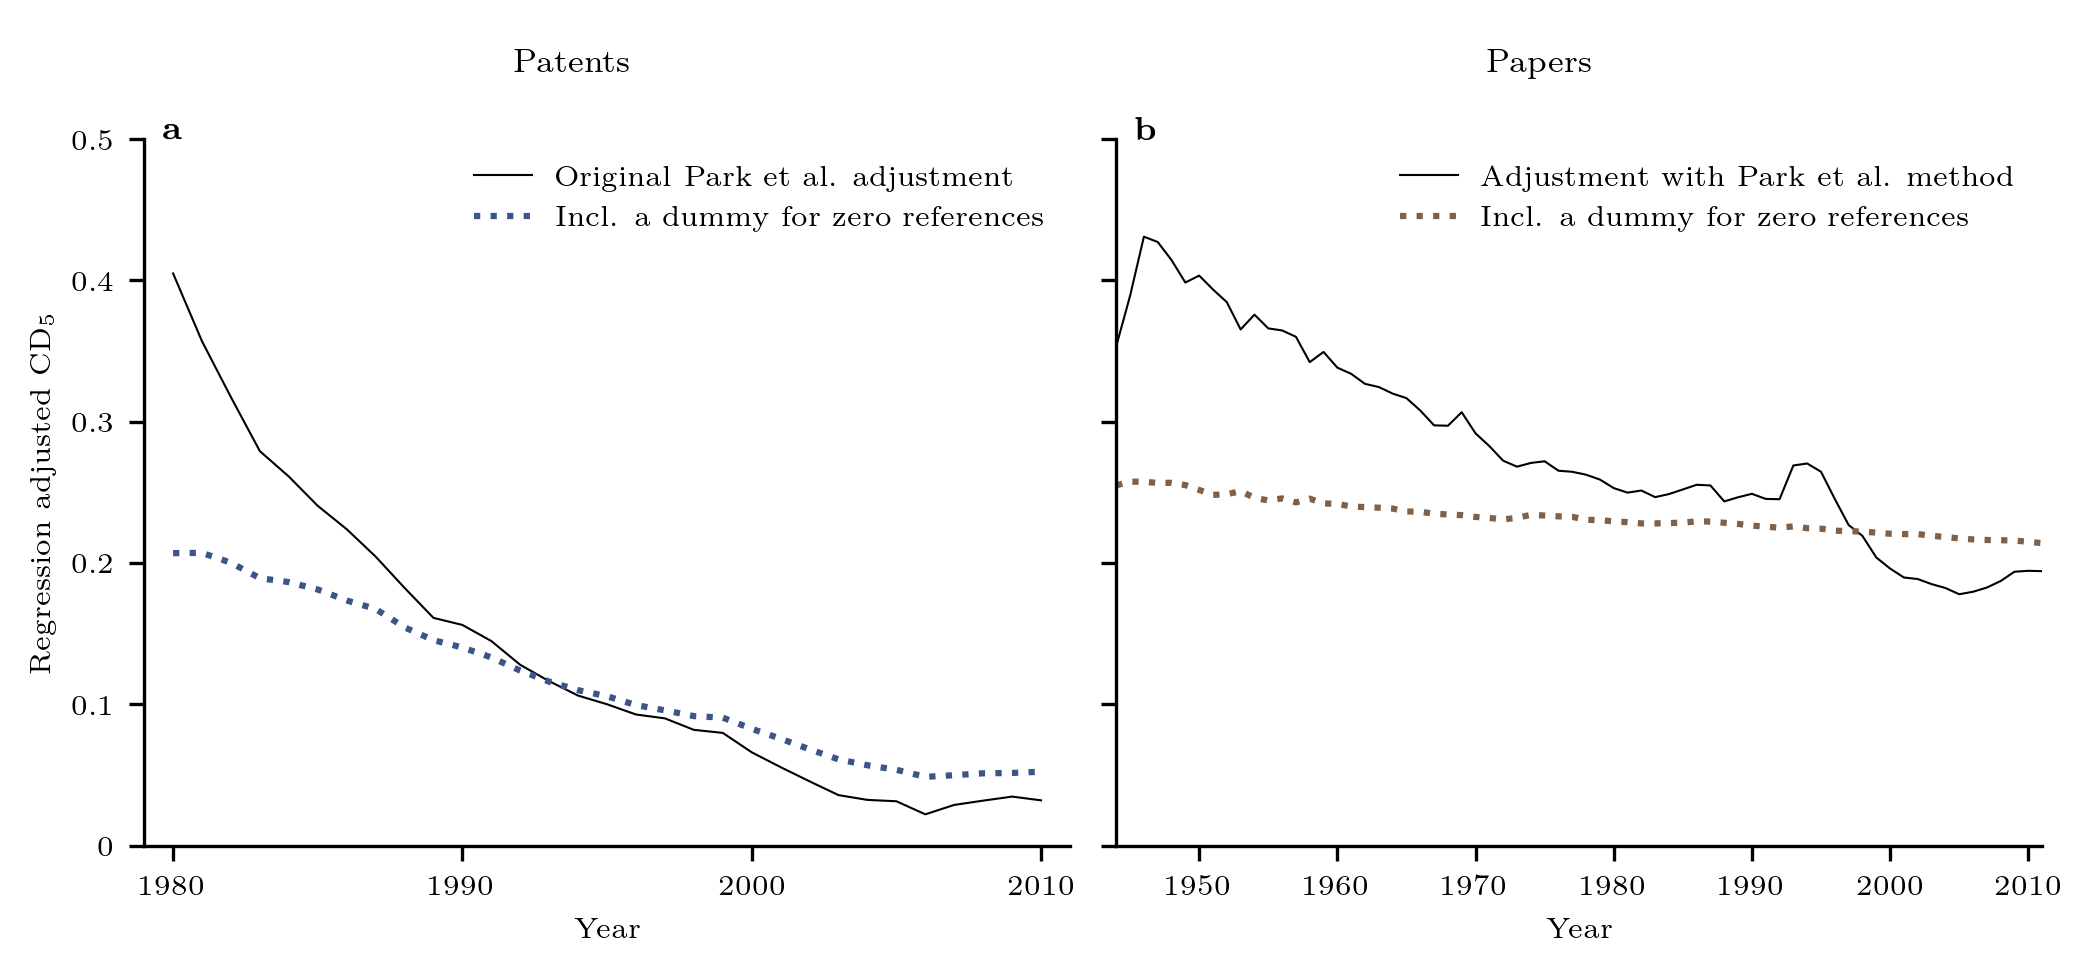

In [75]:
Figure, ax = plt.subplot_mosaic([
                                ['1', '1', '.', '2','2'],
                                ['A','A', '.', 'B', 'B']
                                ],
                                figsize=(7.08,6.69/2),
                                gridspec_kw = {'width_ratios':[1, 1, 0.1, 1, 1],
                                                 'height_ratios': [0.1, 1]},
                                dpi = 300
                                )


plt.rcParams['legend.title_fontsize'] = 7

#---------------------------------------------1---------------------------------------------
ax['1'].set_axis_off()
ax['1'].text(0.4,0.4,'Patents', transform=ax['1'].transAxes,fontsize = 8)

#---------------------------------------------2---------------------------------------------
ax['2'].set_axis_off()
ax['2'].text(0.4,0.4,'Papers', transform=ax['2'].transAxes,fontsize = 8)

#====================== Different regression models =================================== 
"""
a: Different regression models for adjusted CD_5 for patents 
"""

margins1=sns.lineplot(data=patents_margins, 
                      x="years",
                      y="margins_original", 
                      color="black", 
                      linewidth=0.5, 
                      ax=ax["A"]
                      )

margins2=sns.lineplot(data=patents_margins, 
                      x="years", 
                      y="margins_zero_refs", 
                      color="#3C5488FF", 
                      linestyle=":",
                      #linewidth=0.5, 
                      ax=ax["A"]
                      )

ax['A'].set_xlim(config.PATENT_MIN_YEAR, config.PATENT_MAX_YEAR)
ax['A'].set_ylim(0.0, 0.5)
ax["A"].set_xlabel('Year', fontsize=7)
ax["A"].set_ylabel(r"Regression adjusted $\mathrm{CD}_5$", fontsize=7)
xticks=config.PATENT_YEAR_TICKS
ax['A'].set_xticks(xticks,[str(x) for x in xticks], fontsize=7)
ax["A"].set_yticks(ticks=[0,0.1,0.2,0.3,0.4,0.5], labels=[r"0","0.1","0.2","0.3","0.4","0.5"], fontsize=7)
ax["A"].set_title("")

ax['A'].text(0.02,1,r'$\textbf{a}$', transform=ax['A'].transAxes,fontsize = 8)

sns.despine(ax=ax['A'],left=False, bottom=False)

del margins1, margins2
gc.collect()

# legend
ax['A'].legend(
    handles=[
        Line2D([0], [0], color='black', linestyle='-', linewidth=0.5,
               label=r'Original Park et al. adjustment'),
        Line2D([0], [0], color='#3C5488FF', linestyle=':',
               label=r'Incl. a dummy for zero references')],
    loc='upper right',
    frameon=False,
    fontsize=7,
)

"""
b: Different regression models for adjusted CD_5 for patents 
"""

margins_original=sns.lineplot(data=SciSciNet_margins, x="Years", y="margins_original", color="black", linewidth=0.5, ax=ax['B'])
margins_zero_refs=sns.lineplot(data=SciSciNet_margins, x="Years", y="margins_zero_refs", color='#7E6148FF', linestyle=":", ax=ax['B'])

ax['B'].set_xlim(config.PAPER_MIN_YEAR, config.PAPER_MAX_YEAR)
ax['B'].set_ylim(0.0, 0.5)
ax['B'].set_xlabel('Year', fontsize=7)
ax["B"].set_ylabel('', fontsize=7)
xticks=config.PAPER_YEAR_TICKS
ax['B'].set_xticks(xticks,[str(x) for x in xticks], fontsize=7)
ax['B'].set_yticks(ticks=[0,0.1,0.2,0.3,0.4,0.5], labels=["","","","","",""], fontsize=7)
ax['B'].set_title("")

ax['B'].text(0.02,1,r'$\textbf{b}$', transform=ax['B'].transAxes,fontsize = 8)

sns.despine(ax=ax['B'],left=False, bottom=False)

del margins_original, margins_zero_refs
gc.collect()

#legend
ax['B'].legend(
    handles=[
        Line2D([0], [0], color='black', linestyle='-', linewidth=0.5,
               label=r'Adjustment with Park et al. method'),
        Line2D([0], [0], color='#7E6148FF', linestyle=':',
               label=r'Incl. a dummy for zero references'),
    ],
    loc='upper right',
    frameon=False,
    fontsize=7,
)

Figure.tight_layout()
Figure.subplots_adjust(hspace = 0.1,wspace = 0)
#Figure.savefig(config.OUTPUT_PATH+'SupplementalFigure_Regression.pdf')

## Supplementary Figure S2

The temporal decline of the $\mathrm{CD}_5$ index for patents is mirrored by random citation behaviour supporting that the hidden outliers are driving the decline.

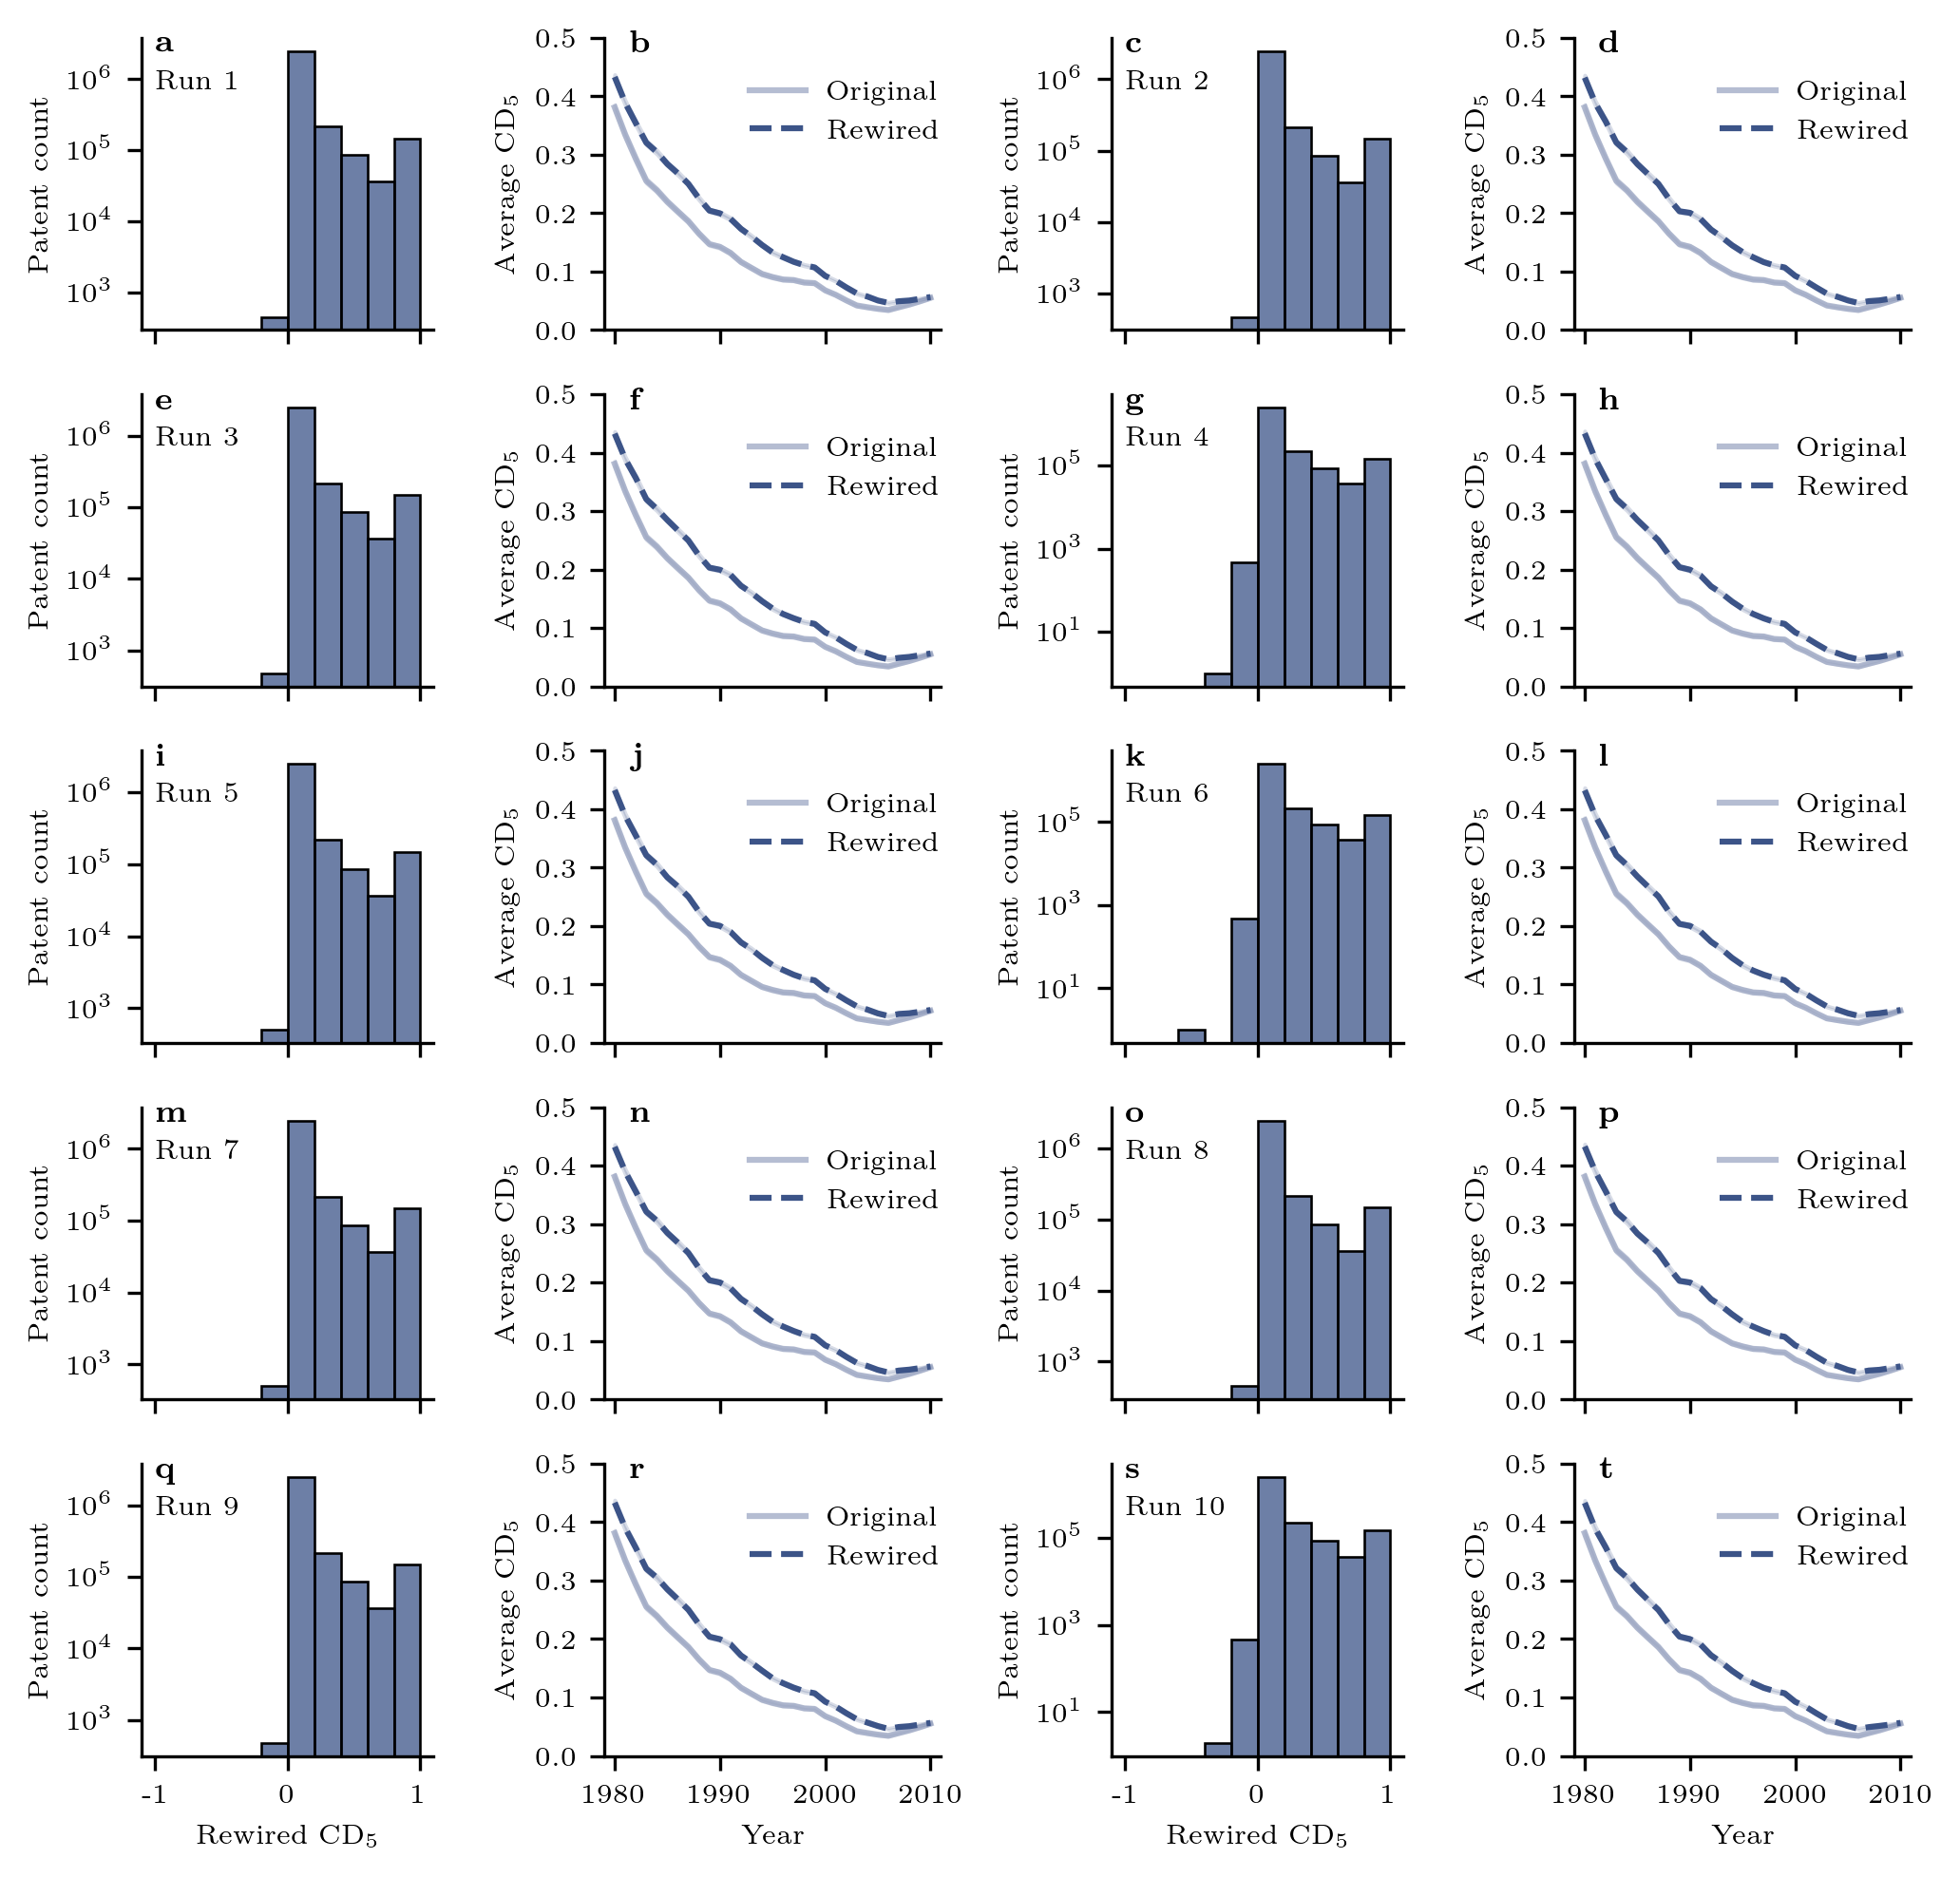

In [66]:
### Warning: This cell can take some time to run ~10 min ###

CONFIDENTIAL_INTERVAL=95

### RECOMMENDATION: For faster runtime, set CONFIDENCE_INTERVAL to None ### 

figure, ax = plt.subplot_mosaic([['1', '.','11','.','2','.','12'],
                                 ['.','.','.','.','.','.','.'],
                                ['3','.','13','.','4','.','14'],
                                ['.','.','.','.','.','.','.'],
                                ['5','.','15','.','6','.','16'],
                                ['.','.','.','.','.','.','.'],
                                ['7','.','17','.','8','.','18'],
                                ['.','.','.','.','.','.','.'],
                                ['9','.','19','.','10','.','20']],
                                figsize=(7.08,6.69),
                                gridspec_kw = {'width_ratios':[1,0.3,1,0.3,1,0.3,1],'height_ratios': [1,0.1,1,0.1,1,0.1,1,0.1,1]},
                                dpi = 300
                                )

plt.rcParams['legend.title_fontsize'] = 7
plt.rcParams['text.usetex'] = True

label1 =['','a', 'c', 'e', 'g', 'i', 'k', 'm', 'o', 'q', 's']
label2=['','b', 'd', 'f', 'h', 'j', 'l', 'n', 'p', 'r', 't']

for i in range(1, 11):
    # Histogram
    sns.histplot(x=f"cd_5_r{i}",
                 data=patentsview_rewired_df,
                 bins=10,
                 binrange=(-1,1), 
                 stat="count",
                 color = '#3C5488FF',
                 ax=ax[str(i)])

    ax[str(i)].set_yscale("log")
    ax[str(i)].set_aspect(1/ax[str(i)].get_data_ratio())
    ax[str(i)].set_xlabel('')
    ax[str(i)].set_ylabel("Patent count",fontsize = 7)
    ax[str(i)].text(0.05,0.95,rf'$\textbf{{{label1[i]}}}$', transform=ax[str(i)].transAxes,fontsize = 8)
    ax[str(i)].text(0.05,0.825,'Run {0}'.format(i), transform=ax[str(i)].transAxes,fontsize = 7)


    ax[str(i)].tick_params(axis='x', labelsize=7)
    ax[str(i)].tick_params(axis='y', labelsize=7)

    ax[str(i)].set_xticks([-1, 0, 1],['', '', ''])

    #Set y-ticks to log scale
    major_locator = ticker.LogLocator(base=10.0)
    ax[str(i)].yaxis.set_major_locator(major_locator)
    #Disable minor ticks
    ax[str(i)].yaxis.set_minor_locator(ticker.NullLocator())

    sns.despine(ax=ax[str(i)], left=False, bottom=False)

    #Lineplot showing evolution of rewired CD_5 against original CD_5 over time 

    sns.lineplot(data=patentsview_rewired_df,
                x="grant_year",
                 y="cd_5_o",
                color = '#8491B499',
                ci=CONFIDENCE_INTERVAL, 
                ax = ax[str(i+10)])
    
    sns.lineplot(data=patentsview_rewired_df,
                x="grant_year",
                y=f"cd_5_r{i}",
                color = '#3C5488FF',
                linestyle = '--',
                ci=CONFIDENCE_INTERVAL,
                ax = ax[str(i+10)])

    ax[str(i+10)].set_xlim(config.PATENT_MIN_YEAR, config.PATENT_MAX_YEAR)
    xticks = config.PATENT_YEAR_TICKS
    ax[str(i+10)].set_xticks(xticks,['' for x in xticks])
    ax[str(i+10)].set_xlabel("",fontsize = 7)
    ax[str(i+10)].set_ylabel(r"Average $\mathrm{CD}_5$",fontsize = 7)
    ax[str(i+10)].set_ylim(0,0.5)
    ax[str(i+10)].text(0.075,0.95,rf'$\textbf{{{label2[i]}}}$', transform=ax[str(i+10)].transAxes,fontsize = 8)

    ax[str(i+10)].tick_params(axis='x', labelsize=7)
    ax[str(i+10)].tick_params(axis='y', labelsize=7)

    #Create custom legend handles
    original_line = mlines.Line2D([], [], 
                              color='#8491B499', 
                              label='Original')
    
    rewired_line = mlines.Line2D([], [], 
                             color='#3C5488FF', 
                             linestyle='--', 
                             label='Rewired')

    #Adding custom legend
    ax[str(i+10)].legend(handles=[original_line, rewired_line],
                frameon=False,
                loc = (0.4,0.6),
                fontsize = 7)
    
    sns.despine(ax=ax[str(i+10)], left=False, bottom=False)

#Set x-axis ticks and labels for last row
xticks = config.PATENT_YEAR_TICKS
ax['9'].set_xticks([-1, 0, 1],['-1', '0', '1'])
ax['9'].set_xlabel(r'Rewired $\mathrm{CD}_5$',fontsize = 7)
ax['19'].set_xticks(xticks,[str(x) for x in xticks])
ax['19'].set_xlabel("Year",fontsize = 7)
ax['10'].set_xticks([-1, 0, 1],['-1', '0', '1'])
ax['10'].set_xlabel(r'Rewired $\mathrm{CD}_5$',fontsize = 7)
ax['20'].set_xticks(xticks,[str(x) for x in xticks])
ax['20'].set_xlabel("Year",fontsize = 7)

figure.tight_layout()
figure.subplots_adjust(hspace = 0.1, wspace = 0.1)

#figure.savefig(config.OUTPUT_PATH+'SupplementalFigure_Rewiring_Patents.pdf')

## Supplementary Figure S3

The temporal decline of the $\mathrm{CD}_5$ index for the $\textit{SciSciNet}$ data source is mirrored by random citation behaviour supporting that the hidden outliers are driving the decline.

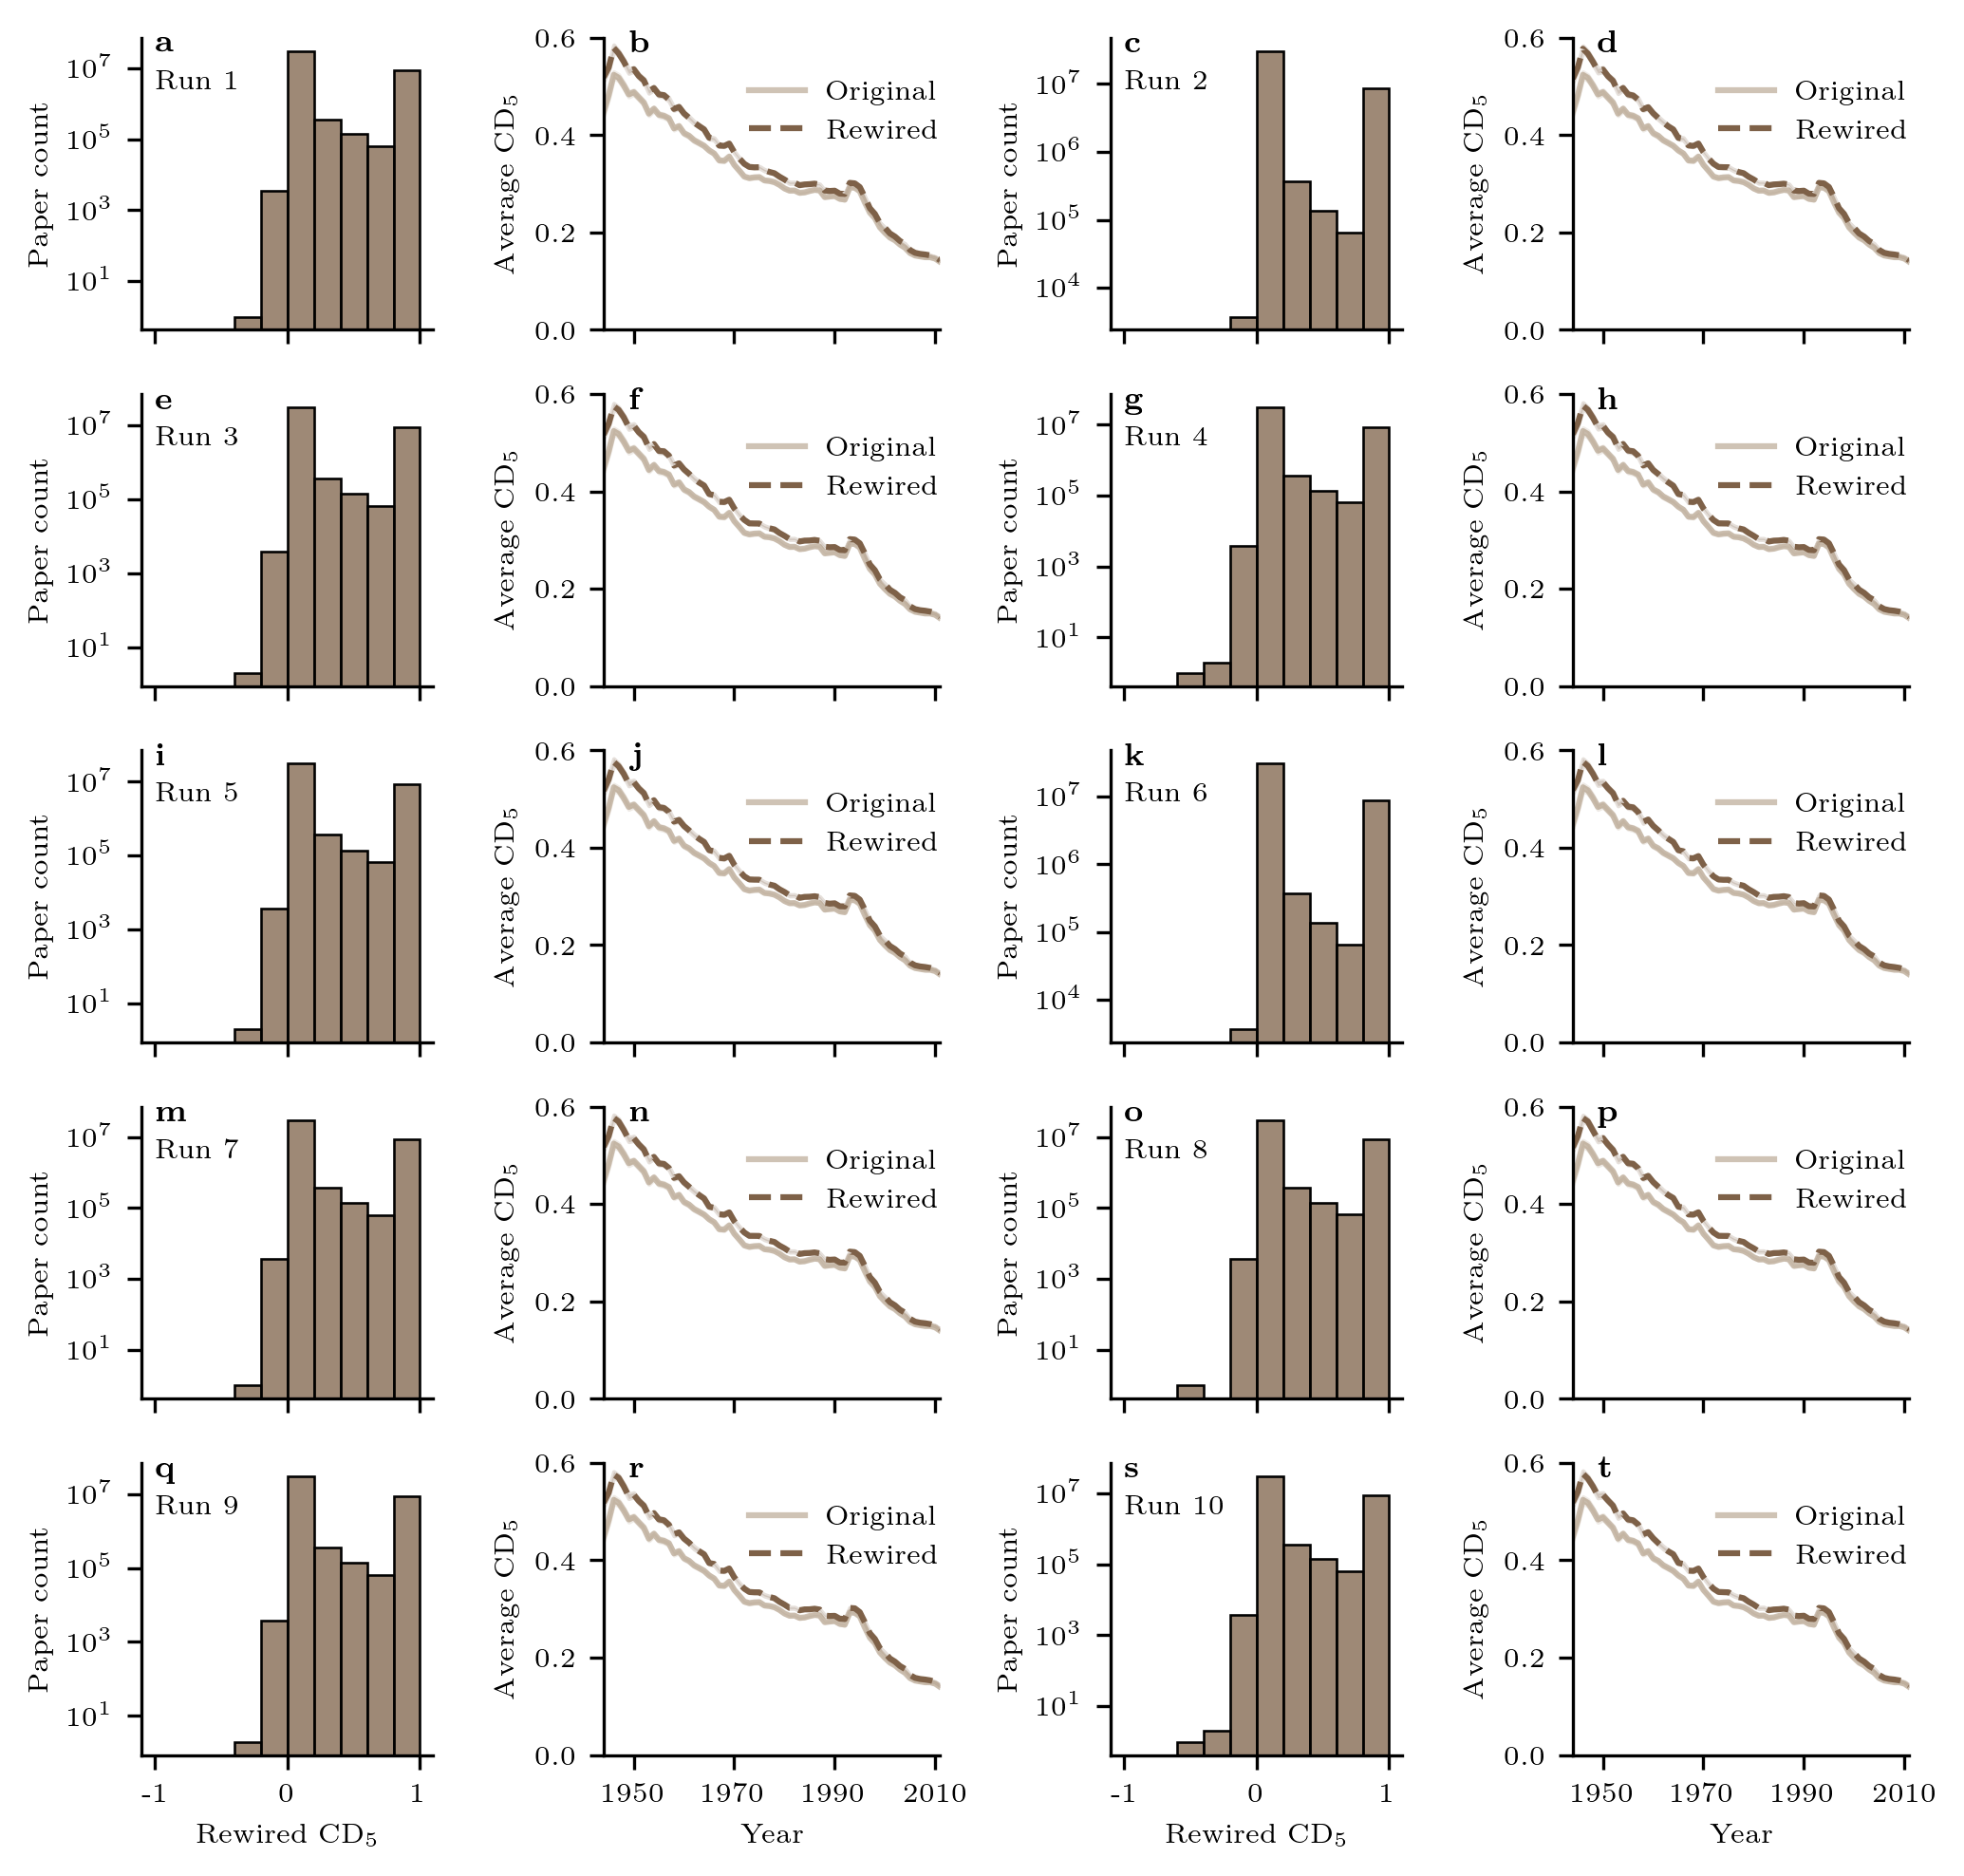

In [67]:
### Warning: This cell can take some time to run ~180 min ###

CONFIDENTIAL_INTERVAL=95

### RECOMMENDATION: For faster runtime, set CONFIDENCE_INTERVAL to None ### 

figure, ax = plt.subplot_mosaic([['1', '.','11','.','2','.','12'],
                                 ['.','.','.','.','.','.','.'],
                                ['3','.','13','.','4','.','14'],
                                ['.','.','.','.','.','.','.'],
                                ['5','.','15','.','6','.','16'],
                                ['.','.','.','.','.','.','.'],
                                ['7','.','17','.','8','.','18'],
                                ['.','.','.','.','.','.','.'],
                                ['9','.','19','.','10','.','20']],
                                figsize=(7.08,6.69),
                                gridspec_kw = {'width_ratios':[1,0.3,1,0.3,1,0.3,1],'height_ratios': [1,0.1,1,0.1,1,0.1,1,0.1,1]},
                                dpi = 300
                                )

plt.rcParams['legend.title_fontsize'] = 7
plt.rcParams['text.usetex'] = True

label1 =['','a', 'c', 'e', 'g', 'i', 'k', 'm', 'o', 'q', 's']
label2=['','b', 'd', 'f', 'h', 'j', 'l', 'n', 'p', 'r', 't']

for i in range(1, 11):
    # Histogram
    sns.histplot(x=f"cd_5_r{i}",
                 data=SciSciNet_rewired_df,
                 bins=10,
                 binrange=(-1,1), 
                 stat="count",
                 color = '#7E6148FF',
                 ax=ax[str(i)])

    ax[str(i)].set_yscale("log")
    ax[str(i)].set_aspect(1/ax[str(i)].get_data_ratio())
    ax[str(i)].set_xlabel('')
    ax[str(i)].set_ylabel("Paper count",fontsize = 7)
    ax[str(i)].text(0.05,0.95,rf'$\textbf{{{label1[i]}}}$', transform=ax[str(i)].transAxes,fontsize = 8)
    ax[str(i)].text(0.05,0.825,'Run {0}'.format(i), transform=ax[str(i)].transAxes,fontsize = 7)


    ax[str(i)].tick_params(axis='x', labelsize=7)
    ax[str(i)].tick_params(axis='y', labelsize=7)

    ax[str(i)].set_xticks([-1, 0, 1],['', '', ''])

    #Set y-ticks to log scale
    major_locator = ticker.LogLocator(base=10.0)
    ax[str(i)].yaxis.set_major_locator(major_locator)
    #Disable minor ticks
    ax[str(i)].yaxis.set_minor_locator(ticker.NullLocator())

    sns.despine(ax=ax[str(i)], left=False, bottom=False)

    # Lineplot

    sns.lineplot(data=SciSciNet_rewired_df,
             x="year",
             y="cd_5_o",
             color = '#B09C8599',
             ci=95, 
             ax = ax[str(i+10)])
    
    sns.lineplot(data=SciSciNet_rewired_df,
                 x="year",
                 y=f"cd_5_r{i}",
                 color = '#7E6148FF',
                 linestyle = '--',
                 ci=95,
                 ax = ax[str(i+10)])

    ax[str(i+10)].set_xlim(config.PAPER_MIN_YEAR, config.PAPER_MAX_YEAR)
    xticks = [1950, 1970, 1990, 2010]
    ax[str(i+10)].set_xticks(xticks,['' for x in xticks])
    ax[str(i+10)].set_xlabel("",fontsize = 7)
    ax[str(i+10)].set_ylabel(r"Average $\mathrm{CD}_5$",fontsize = 7)
    ax[str(i+10)].set_ylim(0,0.6)
    ax[str(i+10)].text(0.075,0.95,rf'$\textbf{{{label2[i]}}}$', transform=ax[str(i+10)].transAxes,fontsize = 8)

    ax[str(i+10)].tick_params(axis='x', labelsize=7)
    ax[str(i+10)].tick_params(axis='y', labelsize=7)

    #Create custom legend handles
    original_line = mlines.Line2D([], [], 
                              color='#B09C8599', 
                              label='Original')
    
    rewired_line = mlines.Line2D([], [], 
                             color='#7E6148FF', 
                             linestyle='--', 
                             label='Rewired')

    #Adding custom legend
    ax[str(i+10)].legend(handles=[original_line, rewired_line],
                frameon=False,
                loc = (0.4,0.6),
                fontsize = 7)
    
    sns.despine(ax=ax[str(i+10)], left=False, bottom=False)

#Set x-axis ticks for last row
xticks = [1950, 1970, 1990, 2010]
ax['9'].set_xticks([-1, 0, 1],['-1', '0', '1'])
ax['9'].set_xlabel(r'Rewired $\mathrm{CD}_5$',fontsize = 7)
ax['19'].set_xticks(xticks,[str(x) for x in xticks])
ax['19'].set_xlabel("Year",fontsize = 7)
ax['10'].set_xticks([-1, 0, 1],['-1', '0', '1'])
ax['10'].set_xlabel(r'Rewired $\mathrm{CD}_5$',fontsize = 7)
ax['20'].set_xticks(xticks,[str(x) for x in xticks])
ax['20'].set_xlabel("Year",fontsize = 7)

figure.tight_layout()
figure.subplots_adjust(hspace = 0.1, wspace = 0.1)

figure.savefig(config.OUTPUT_PATH+'SupplementalFigure_Rewiring_SciSciNet.pdf')

## Supplementary Figure S4

Distribution of the $\mathrm{CD}_5$ index with vs without the hidden outliers and its impact on the disruptiveness for the $\textit{DBLP-Citation-network V14}$.

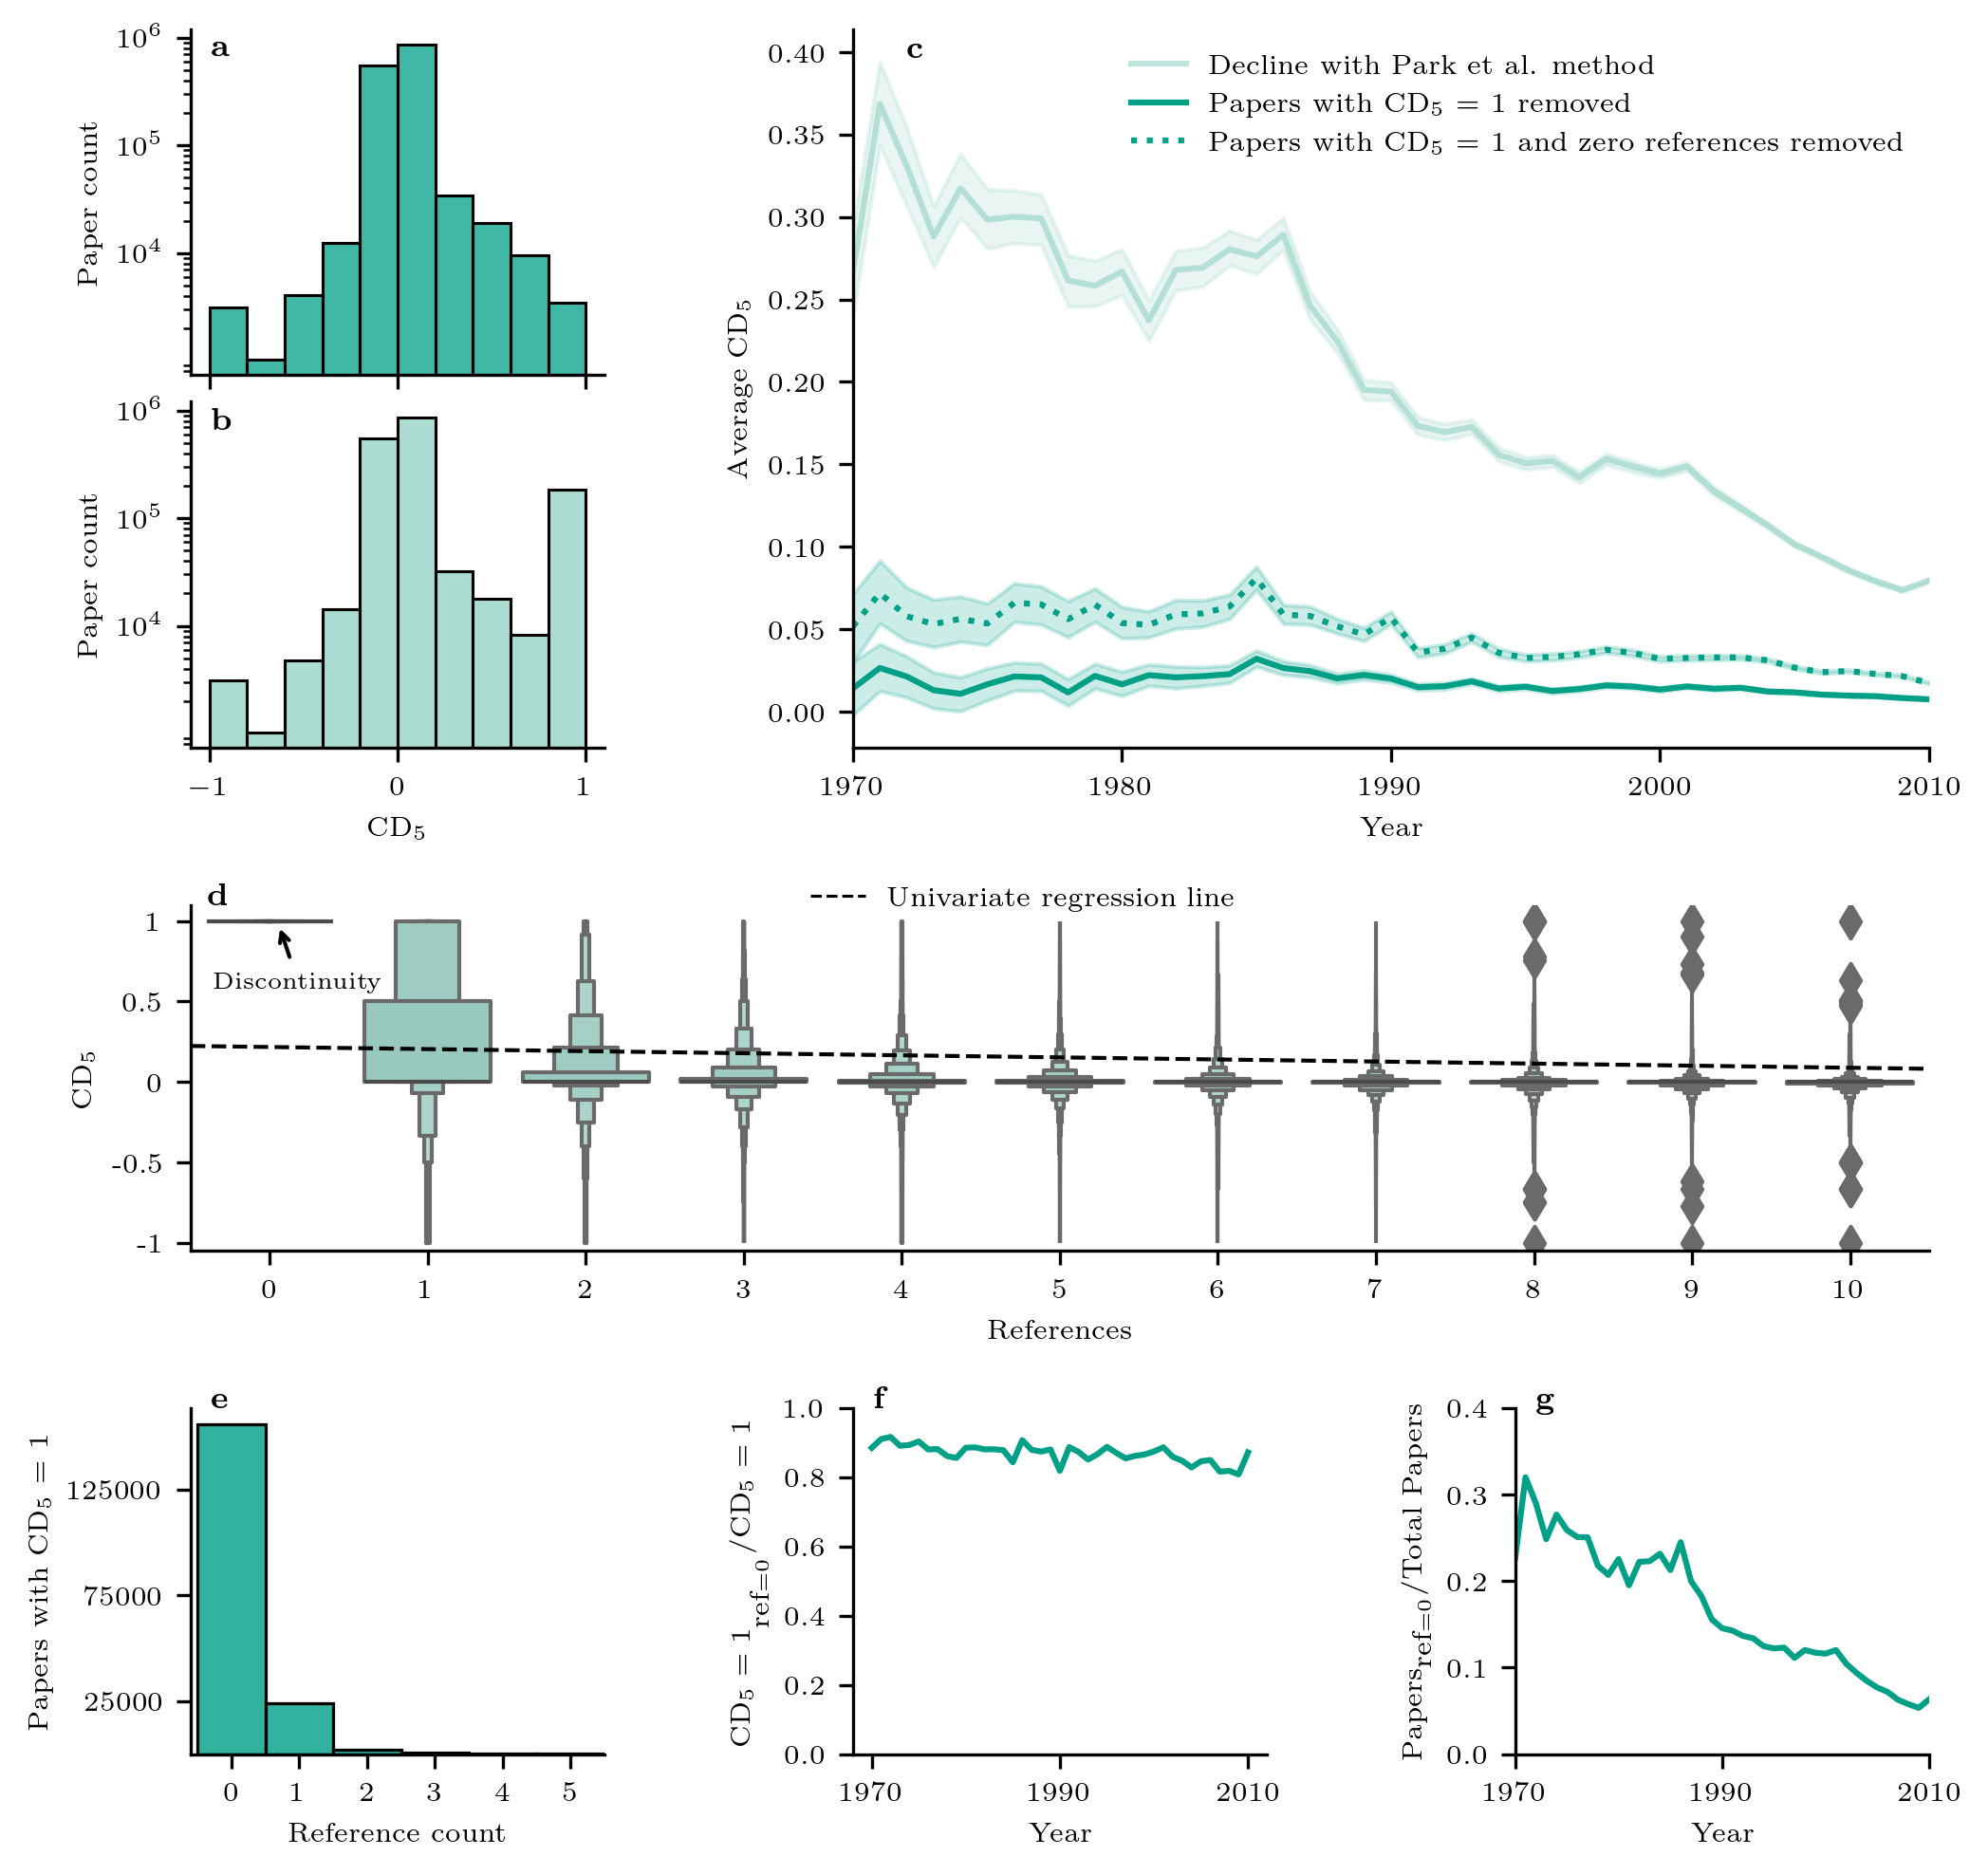

In [68]:
CONFIDENCE_INTERVAL=95

figure, ax = plt.subplot_mosaic([['A','.','C', 'C', 'C'],
                                 ['B','.','C','C', 'C'],
                                 ['.', '.', '.', '.', '.'],
                                 ['D', 'D', 'D', 'D', 'D'],
                                 ['.', '.', '.', '.', '.'],
                                 ['E', '.', 'F', '.', 'G']
                                 ],
                                  figsize=(7.08661,3.34645*2),gridspec_kw = {'width_ratios':[1, 0.6, 1, 0.6, 1],'height_ratios': [1, 1, 0.3, 1, 0.3, 1]},dpi = 300)

plt.rcParams['legend.title_fontsize'] = 7

"""
HISTOGRAM 1: Original Seaborn Binning
"""
HistogramCS1 = sns.histplot(x="cd_5",
             data=DBLPv14_df,
             binwidth=0.2, #this parameter causes the error (https://github.com/mwaskom/seaborn/pull/3489)
             #bins=10,
             stat="count",
             color = '#00A087FF',
             ax=ax['A'])
ax['A'].set_yscale("log")
ax['A'].set_xlabel(r"$\mathrm{CD}_5$",fontsize =7)
ax['A'].set_ylabel("Paper count",fontsize = 7)
ax['A'].set_yticks([1e4,1e5,1e6])


ax['A'].tick_params(axis='x', labelsize=7)
ax['A'].tick_params(axis='y', labelsize=7)
ax['A'].text(0.05,0.92,r'$\textbf{a}$', transform=ax['A'].transAxes,fontsize = 8)
sns.despine(ax=ax['A'], left=False, bottom=False)

del HistogramCS1
gc.collect()

"""
HISTOGRAM 2: Correct Seaborn Binning
"""

HistogramCS2 = sns.histplot(x="cd_5",
             data=DBLPv14_df,
             #binwidth=0.2,
             bins=10,
             stat="count",
             color = '#91D1C299',
             ax=ax['B'])

ax['B'].set_yscale("log")
ax['B'].set_xlabel(r"$\mathrm{CD}_5$",fontsize = 7)
ax['B'].set_ylabel("Paper count",fontsize = 7)
ax['B'].set_yticks([1e4,1e5,1e6])


ax['B'].tick_params(axis='x', labelsize=7)
ax['B'].tick_params(axis='y', labelsize=7)
ax['B'].text(0.05,0.92,r'$\textbf{b}$', transform=ax['B'].transAxes,fontsize = 8)

ax['A'].get_shared_x_axes().join(ax['A'], ax['B'])
ax['A'].set_xticklabels([])
sns.despine(ax=ax['B'], left=False, bottom=False)

del HistogramCS2
gc.collect()
"""
Lineplots: CD_5 evolution over time for patents
"""

#Plot with no papers removed
DBLPviewFull = sns.lineplot(data=DBLPv14_df,
             x="year",
             y="cd_5",
             color = '#91D1C299',
             ci=95,
             ax = ax['C'])
ax['C'].set_xlim(config.DBLP_MIN_YEAR, config.DBLP_MAX_YEAR )

xticks = config.DBLP_YEAR_TICKS

ax['C'].set_xticks(xticks,[str(x) for x in xticks])
ax['C'].set_xlabel("Year",fontsize = 7)
ax['C'].set_ylabel(r"Average $\mathrm{CD}_5$",fontsize = 7)

ax['C'].tick_params(axis='x', labelsize=7)
ax['C'].tick_params(axis='y', labelsize=7)

#Plot with papers with CD_5=1 removed

#Mask to remove CD indices with value 1
mask=DBLPv14_df.cd_5!=1

DBLPview_p1 = sns.lineplot(data=DBLPv14_df[mask],
             x="year",
             y="cd_5",
             color = '#00A087FF',
             ci=95,
             ax = ax['C'])

#Plot with papers with zero references removed

#Mask to remove papers with zero references
mask=DBLPv14_df.references!=0

DBLPview_zero_ref = sns.lineplot(data=DBLPv14_df[mask],
                x="year",
                y="cd_5",
                color = '#00A087FF',
                ci=95,
                linestyle = ':',
                ax = ax['C'])

legpapers = ax['C'].legend(labels=['Decline with Park et al. method',
                                       '',
                                       r'Papers with $\mathrm{CD}_5$ = 1 removed',
                                       '',
                                       r'Papers with $\mathrm{CD}_5$ = 1 and zero references removed'],
                               loc = 'best',
                               fontsize = 7
                               )
h = legpapers.get_lines()
legpapers_b = ax['C'].legend(handles = [h[0],h[1], h[2]],
                            labels=['Decline with Park et al. method',
                            r'Papers with $\mathrm{CD}_5$ = 1 removed',
                            r'Papers with $\mathrm{CD}_5$ = 1 and zero references removed'],
                            loc ='best',
                            fontsize = 7
                            )

sns.despine(ax=ax['C'], left=False, bottom=False)

legpapers_b.get_frame().set_linewidth(0.0)

ax['C'].text(0.05,0.96,r'$\textbf{c}$', transform=ax['C'].transAxes,fontsize = 8)

del DBLPviewFull
del DBLPview_p1
del DBLPview_zero_ref

gc.collect()

"""
d: Distribution of CD index against number of references for papers 
"""

ax["D"].set(xlim=(-0.5, 10.5))

regplot1=sns.regplot(
    data=DBLPv14_df,
    x="references",
    y="cd_5",
    color="black",
    scatter=False,
    truncate=False,
    ci=None,
    line_kws={"linewidth": 1, "linestyle": "--"},
    ax=ax["D"],
)

boxenplot1=sns.boxenplot(
    data=DBLPv14_df[DBLPv14_df["references"] <= 10],
    x="references",
    y="cd_5",
    color='#91D1C299',
    linewidth=1,
    showfliers=True,
    ax=ax["D"]
)

ax["D"].set(ylim=(-1.05, 1.1))
ax["D"].set_xlabel("References", fontsize = 7)
ax["D"].set_ylabel(r"$\mathrm{CD}_5$", fontsize = 7)
ax["D"].tick_params(axis='x', labelsize=7)
ax["D"].set_yticks(ticks=[-1,-0.5,0,0.5,1], labels=["-1","-0.5","0","0.5","1"], fontsize=7)
ax["D"].set_title("")

sns.despine(ax=ax["D"],left=False, bottom=False)
ax['D'].text(0.01,1,r'$\textbf{d}$', transform=ax['D'].transAxes,fontsize = 8)

# legend
ax['D'].legend(
    handles=[
        Line2D([0], [0], color='black', linestyle='--', linewidth=0.75,
               markersize=1,
               label=r'Univariate regression line'),
    ],
    loc=(0.35, 0.95),
    frameon=False,
    framealpha=0,
    fontsize=7,
)

ax['D'].annotate('Discontinuity', xy=(0.05, 1), xytext=(0.18, 0.55),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             horizontalalignment='center', verticalalignment='bottom', fontsize=6)

legpapers.get_frame().set_linewidth(0.0)
figure.subplots_adjust(hspace = 0.1,wspace = 0)

#=========================================== Zero reference papers =========================================================

#Distribution of the reference count for papers with CD_5=1

histogram0ref_ourdata =sns.histplot(data=DBLPv14_df[DBLPv14_df.cd_5==1],
             x="references",
             binwidth=1,
             binrange=(0,10),
             color='#00A087FF',
             alpha=0.8,
             discrete = True,
             ax = ax['E'])

ax['E'].set_xlabel("Reference count",fontsize = 7)
ax['E'].set_ylabel(r"Papers with $\mathrm{CD}_5$ = 1",fontsize = 7)
ax['E'].set_xlim(-0.6,5.5)

ax['E'].tick_params(axis='x', labelsize=7)
ax['E'].tick_params(axis='y', labelsize=7)
ax['E'].set_yticks([2.5e4,7.5e4,12.5e4])
ax['E'].set_xticks([0,1,2,3,4,5])
ax['E'].text(0.05,1,r'$\textbf{e}$', transform=ax['E'].transAxes,fontsize = 8)

sns.despine(ax=ax['E'], left=False, bottom=False)

#Within the category of papers with CD_5=1, we calculate the relative frequency of papers with no references over time.

papers_per_year_CD5_1_ref_0 =DBLPv14_df[(DBLPv14_df.references==0) & (DBLPv14_df.cd_5==1)].groupby('year').size().to_numpy()

papers_per_year_CD5_1 =DBLPv14_df[(DBLPv14_df.cd_5==1)].groupby('year').size().to_numpy()

papers_freq_CD5_1_ref_0 = papers_per_year_CD5_1_ref_0 / papers_per_year_CD5_1 

papers_no_references_df=pd.DataFrame({'year':np.sort(DBLPv14_df.year.unique()),
                                    'frequency':papers_freq_CD5_1_ref_0,
                                    'category':'papers with no references'})

lineplotperyearpapers = sns.lineplot(data=papers_no_references_df,
            x="year",
            y="frequency",
            hue="category",
            palette=['#00A087FF'],
            ax = ax['F'])
ax['F'].set_xlabel("Year",fontsize = 7)
ax['F'].set_ylabel(r'${\textrm{CD}_{5} = 1}_{ _{\textrm{ref} = 0} }/\textrm{CD}_{5} = 1$',fontsize = 7)
ax['F'].set_ylim(0,1)
ax['F'].set_xticks([1970, 1990, 2010])


ax['F'].text(0.05,1,r'$\textbf{f}$', transform=ax['F'].transAxes,fontsize = 8)

ax['F'].tick_params(axis='x', labelsize=7)
ax['F'].tick_params(axis='y', labelsize=7)

sns.despine(ax=ax['F'], left=False, bottom=False)

lineplotperyearpapers.legend_.remove()

#We examine the relative frequency of papers with CD_5=1 and zero references over time. 

#Create a mask to filter for papers with not defined CD index
mask1=DBLPv14_df.cd_5.isna()

#Create a mask to filter for papers with no references
mask2=DBLPv14_df.references==0 
 
#Calculate the number of papers per year and store in a numpy array
papers_per_year=DBLPv14_df[~mask1].groupby('year').size().to_numpy()
 
#Calculate the number of papers per year with no references and defined CD index, that is CD_5=1
papers_per_year_no_references=DBLPv14_df[~mask1 & mask2].groupby('year').size().to_numpy()
 
#Calculate the frequency of papers with no references and CD_5=1
frequency_no_references=papers_per_year_no_references/papers_per_year
 
#Create a data_frame with the year and the frequency of papers with no references and CD_5=1
no_references_df=pd.DataFrame({'year':np.sort(DBLPv14_df[~mask1].year.unique()),
                                    'frequency':frequency_no_references})
 
lineplotnoreference_paper = sns.lineplot(data=no_references_df,
            x="year",
            y="frequency",
            color='#00A087FF',
            ax = ax['G'])
ax['G'].tick_params(axis='x', labelsize=7)
ax['G'].tick_params(axis='y', labelsize=7)
ax['G'].set_ylim(0,0.4)
ax['G'].set_xlabel("Year",fontsize = 7)
ax['G'].set_ylabel(r'$\textrm{Papers}_{\textrm{ref} = 0}/\textrm{Total Papers}$',fontsize = 7)
ax['G'].set_xticks([1970, 1990, 2010])
ax['G'].set_xlim(config.DBLP_MIN_YEAR, config.DBLP_MAX_YEAR)
 
ax['G'].text(0.05,1,r'$\textbf{g}$', transform=ax['G'].transAxes,fontsize = 8)

sns.despine(ax=ax['G'], left=False, bottom=False)

figure.tight_layout()
figure.subplots_adjust(hspace = 0.1,wspace = 0)
figure.savefig(config.OUTPUT_PATH+'SupplementalFigure_DBLPv14.pdf')

## Supplementary Figure S5

The temporal decline of the $\mathrm{CD}_5$ index for the $\textit{DBLP-Citation-network V14}$ is mirrored by random citation behaviour supporting that the hidden outliers are driving the decline. 

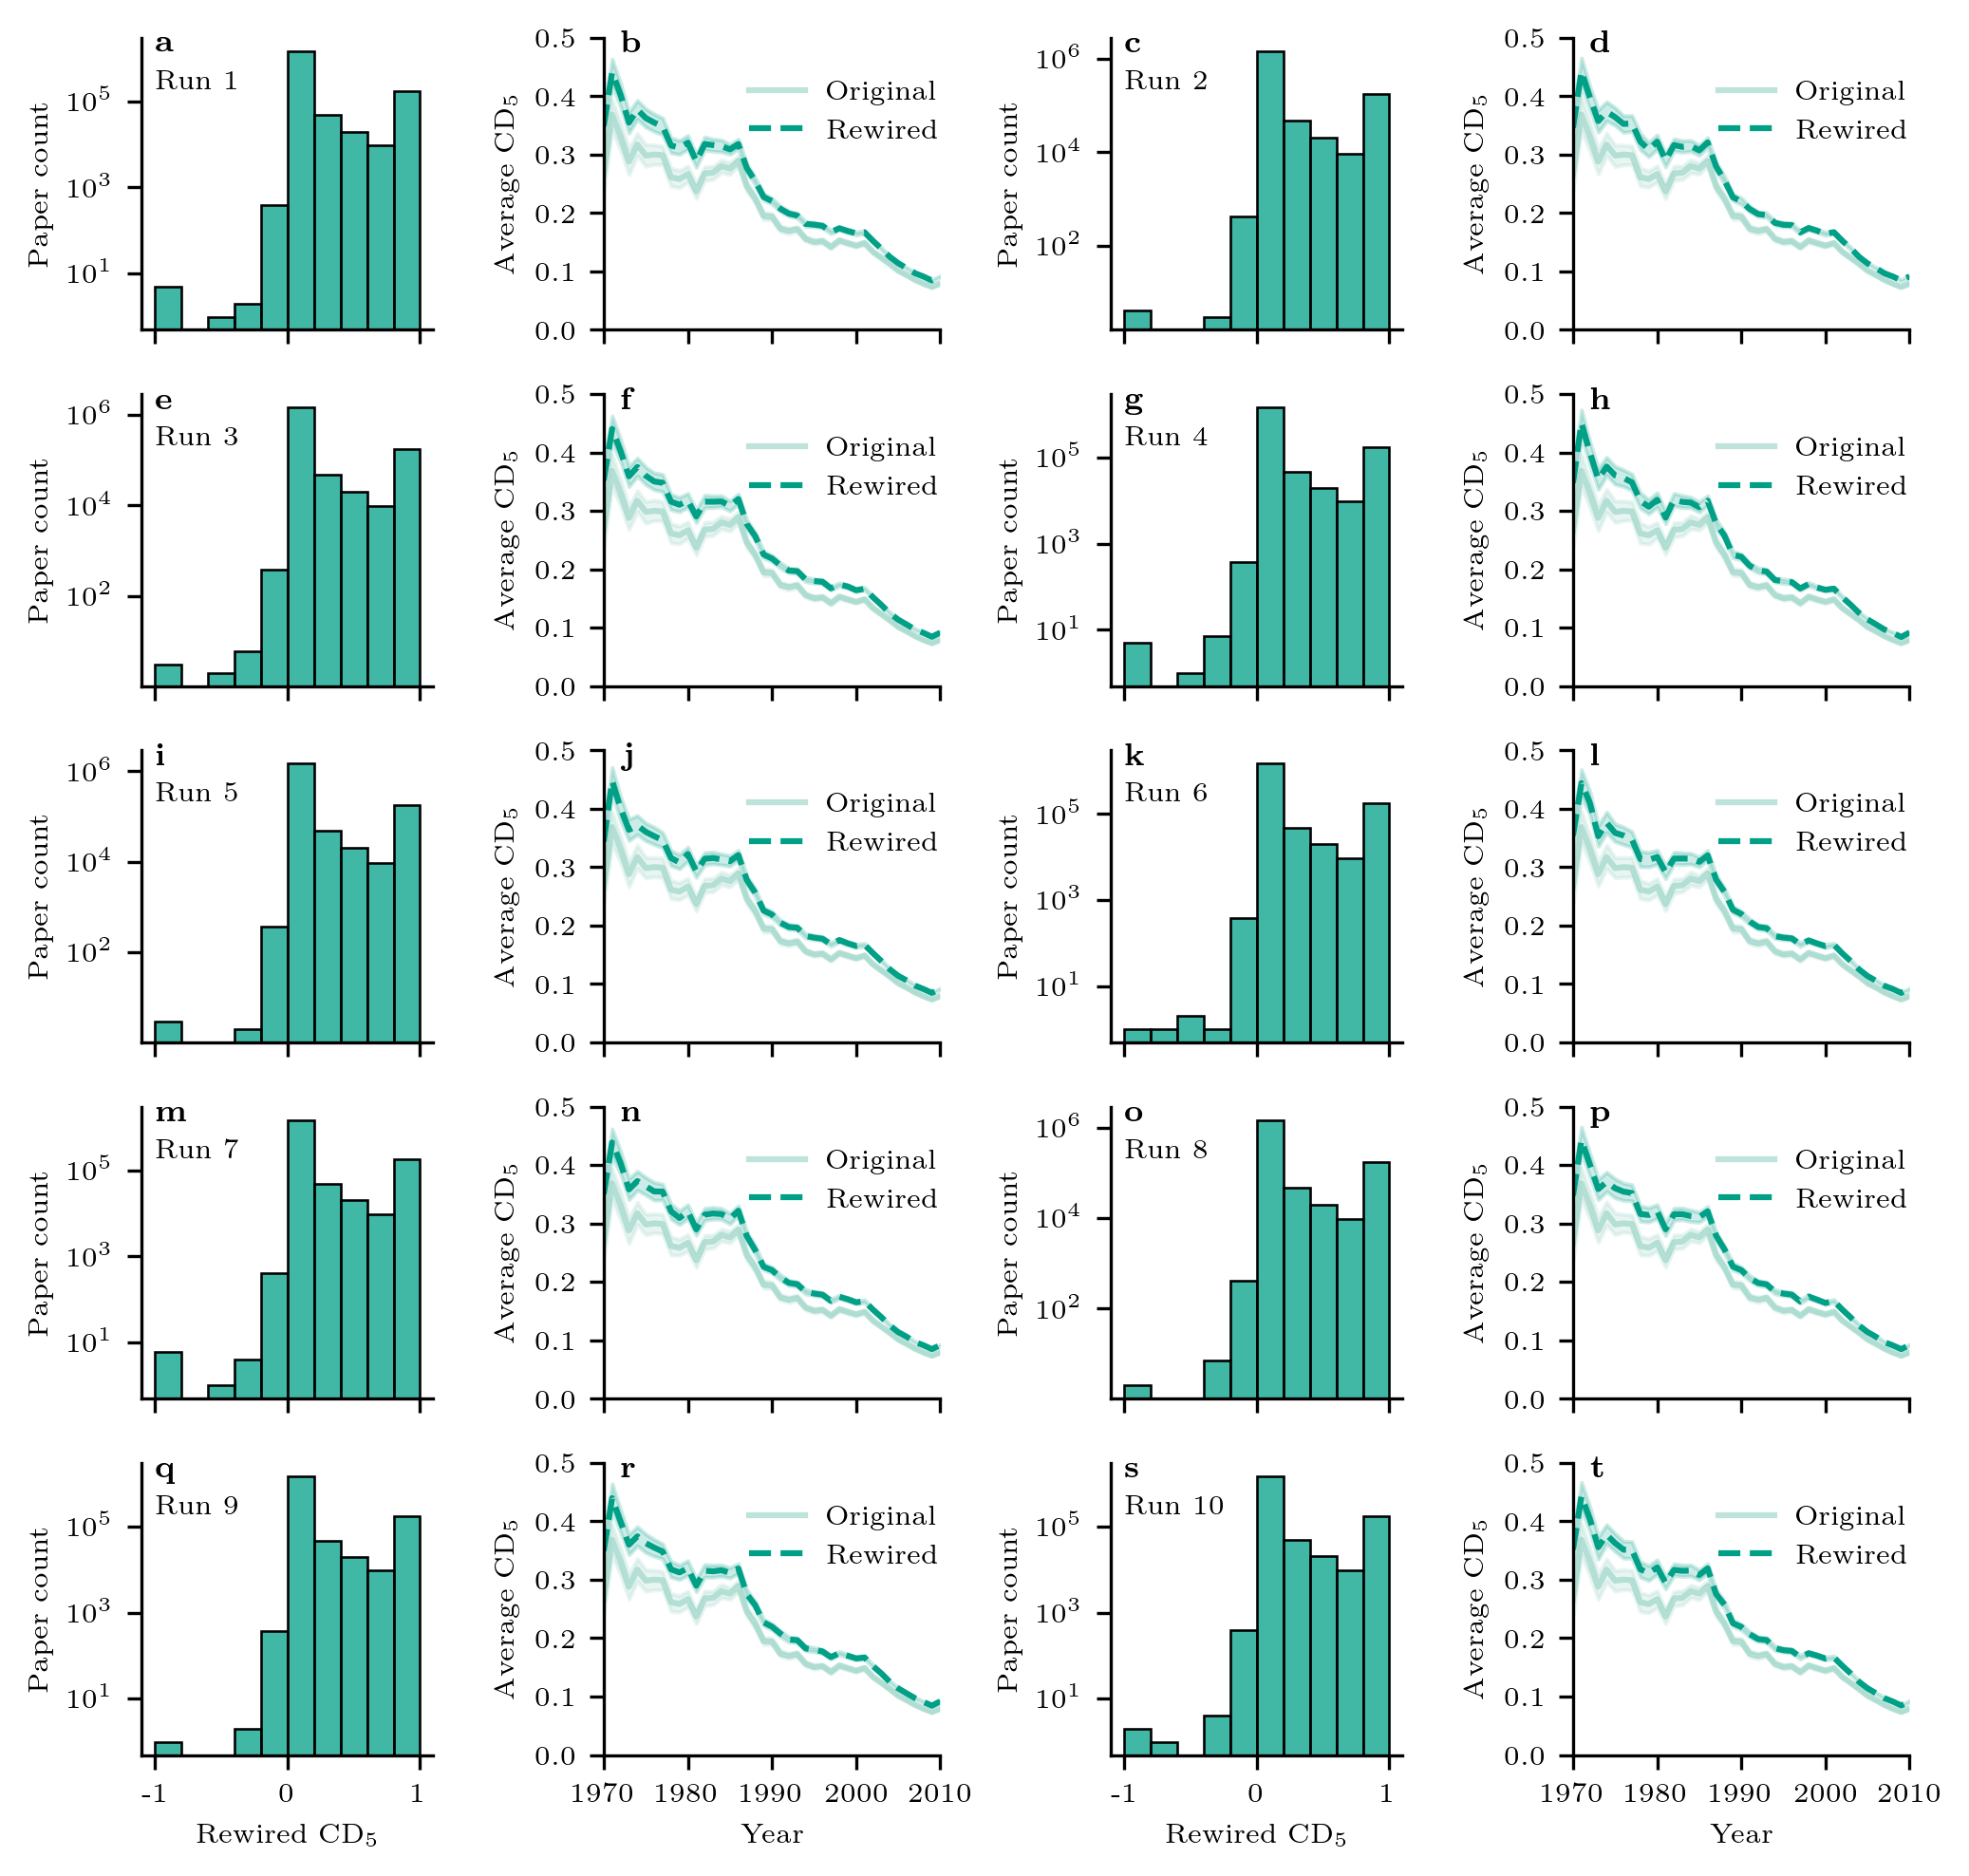

In [69]:
### RUNTIME WARNING: This cell can take some time to run ~5 min ###

CONFIDENCE_INTERVAL=95

### RECOMMENDATION: For faster runtime, set CONFIDENCE_INTERVAL to None ### 

figure, ax = plt.subplot_mosaic([['1', '.','11','.','2','.','12'],
                                 ['.','.','.','.','.','.','.'],
                                ['3','.','13','.','4','.','14'],
                                ['.','.','.','.','.','.','.'],
                                ['5','.','15','.','6','.','16'],
                                ['.','.','.','.','.','.','.'],
                                ['7','.','17','.','8','.','18'],
                                ['.','.','.','.','.','.','.'],
                                ['9','.','19','.','10','.','20']],
                                figsize=(7.08,6.69),
                                gridspec_kw = {'width_ratios':[1,0.3,1,0.3,1,0.3,1],'height_ratios': [1,0.1,1,0.1,1,0.1,1,0.1,1]},
                                dpi = 300
                                )

plt.rcParams['legend.title_fontsize'] = 7
plt.rcParams['text.usetex'] = True

label1 =['','a', 'c', 'e', 'g', 'i', 'k', 'm', 'o', 'q', 's']
label2=['','b', 'd', 'f', 'h', 'j', 'l', 'n', 'p', 'r', 't']

mask=DBLPv14_rewired_df.references>0
for i in range(1, 11):
    # Histogram
    sns.histplot(x=f"cd_5_r{i}",
                 data=DBLPv14_rewired_df,
                 bins=10,
                 binrange=(-1,1), 
                 stat="count",
                 color = '#00A087FF',
                 ax=ax[str(i)])

    ax[str(i)].set_yscale("log")
    ax[str(i)].set_aspect(1/ax[str(i)].get_data_ratio())
    ax[str(i)].set_xlabel('')
    ax[str(i)].set_ylabel("Paper count",fontsize = 7)
    #ax[str(i)].set_yticks([1e3,1e4,1e5,1e6])
    ax[str(i)].text(0.05,0.95,rf'$\textbf{{{label1[i]}}}$', transform=ax[str(i)].transAxes,fontsize = 8)
    ax[str(i)].text(0.05,0.825,'Run {0}'.format(i), transform=ax[str(i)].transAxes,fontsize = 7)


    ax[str(i)].tick_params(axis='x', labelsize=7)
    ax[str(i)].tick_params(axis='y', labelsize=7)

    ax[str(i)].set_xticks([-1, 0, 1],['', '', ''])

    #Set y-ticks to log scale
    major_locator = ticker.LogLocator(base=10.0)
    ax[str(i)].yaxis.set_major_locator(major_locator)
    #Disable minor ticks
    ax[str(i)].yaxis.set_minor_locator(ticker.NullLocator())

    sns.despine(ax=ax[str(i)], left=False, bottom=False)

    # Lineplot

    sns.lineplot(data=DBLPv14_rewired_df,
             x="year",
             y="cd_5_o",
             color = '#91D1C299',
             ci=95, 
             ax = ax[str(i+10)])
    
    sns.lineplot(data=DBLPv14_rewired_df,
                 x="year",
                 y=f"cd_5_r{i}",
                 color = '#00A087FF',
                 linestyle = '--',
                 ci=95,
                 ax = ax[str(i+10)])

    ax[str(i+10)].set_xlim(1970, 2010)
    xticks = [1970, 1980, 1990, 2000, 2010]
    ax[str(i+10)].set_xticks(xticks,['' for x in xticks])
    ax[str(i+10)].set_xlabel("",fontsize = 7)
    ax[str(i+10)].set_ylim(0, 0.5)
    ax[str(i+10)].set_ylabel(r"Average $\mathrm{CD}_5$",fontsize = 7)
    ax[str(i+10)].text(0.05,0.95,rf'$\textbf{{{label2[i]}}}$', transform=ax[str(i+10)].transAxes,fontsize = 8)

    ax[str(i+10)].tick_params(axis='x', labelsize=7)
    ax[str(i+10)].tick_params(axis='y', labelsize=7)

    #Create custom legend handles
    original_line = mlines.Line2D([], [], 
                              color='#91D1C299', 
                              label='Original')
    
    rewired_line = mlines.Line2D([], [], 
                             color='#00A087FF', 
                             linestyle='--', 
                             label='Rewired')

    #Adding custom legend
    ax[str(i+10)].legend(handles=[original_line, rewired_line],
                frameon=False,
                loc = (0.4,0.6),
                fontsize = 7)
    
    sns.despine(ax=ax[str(i+10)], left=False, bottom=False)

#Set x-axis ticks for last row
xticks = [1970, 1980, 1990, 2000, 2010]
ax['9'].set_xticks([-1, 0, 1],['-1', '0', '1'])
ax['9'].set_xlabel(r'Rewired $\mathrm{CD}_5$',fontsize = 7)
ax['19'].set_xticks(xticks,[str(x) for x in xticks])
ax['19'].set_xlabel("Year",fontsize = 7)
ax['10'].set_xticks([-1, 0, 1],['-1', '0', '1'])
ax['10'].set_xlabel(r'Rewired $\mathrm{CD}_5$',fontsize = 7)
ax['20'].set_xticks(xticks,[str(x) for x in xticks])
ax['20'].set_xlabel("Year",fontsize = 7)

figure.tight_layout()
figure.subplots_adjust(hspace = 0.1,wspace = 0.1)
figure.savefig(config.OUTPUT_PATH+'SupplementalFigure_DBLPv14_rewiring.pdf')

## Supplementary Figure S6

Distribution of the $\mathrm{CD}_{10}$ index with vs without the hidden outliers and its impact on the disruptiveness for the $\textit{SciSciNet}$ and the $\textit{PatentsView}$ data source.

In [32]:
### RUNTIME WARNING: This cell can take some time to run ~20 min ###

CONFIDENCE_INTERVAL=95

### RECOMMENDATION: For faster runtime, set CONFIDENCE_INTERVAL to None ### 

Figure, ax = plt.subplot_mosaic([
                                 ['A','.','C','C'],
                                 ['B','.','C','C'],
                                 ['.','.','.','.'],
                                 ['D','.','F','F'],
                                 ['E','.','F','F']
                                 ],
                                 figsize=(7.08,6.69),
                                 gridspec_kw = {'width_ratios':[1,0.2,1,1],'height_ratios': [1,1,0.35,1,1]},
                                 dpi = 300
                                )

plt.rcParams['legend.title_fontsize'] = 7

#=========================================== Papers =========================================================
"""
HISTOGRAM 1: Original Seaborn Binning
"""
Histogram1 = sns.histplot(x="cd_10",
             data=SciSciNet_df,
             binwidth=0.2, #this parameter causes the error (https://github.com/mwaskom/seaborn/pull/3489)
             #bins=10,
             stat="count",
             color = '#7E6148FF',
             ax=ax['A'])

ax['A'].set_yscale("log")
ax['A'].set_aspect(1/ax['A'].get_data_ratio())
ax['A'].set_xlabel(r'$\mathrm{CD}_{10}$',fontsize = 7)
ax['A'].set_ylabel("Paper count",fontsize = 7)
ax['A'].text(0.05,0.92,r'$\textbf{a}$', transform=ax['A'].transAxes,fontsize = 8)

ax['A'].tick_params(axis='x', labelsize=7)
ax['A'].tick_params(axis='y', labelsize=7)
sns.despine(ax=ax['A'],left=False, bottom=False)

del Histogram1
gc.collect()

"""
HISTOGRAM 2: Correct Seaborn Binning
"""

Histogram2 = sns.histplot(x="cd_10",
             data=SciSciNet_df,
             #binwidth=0.2,
             bins=10,
             stat="count",
             color = '#B09C8599',
             ax=ax['B'])

ax['B'].set_yscale("log")
ax['B'].set_aspect(1/ax['B'].get_data_ratio())
ax['B'].set_xlabel(r'$\mathrm{CD}_{10}$',fontsize = 7)
ax['B'].set_ylabel("Paper count",fontsize = 7)
ax['B'].text(0.05,0.92,r'$\textbf{b}$', transform=ax['B'].transAxes,fontsize = 8)


ax['B'].tick_params(axis='x', labelsize=7)
ax['B'].tick_params(axis='y', labelsize=7)
sns.despine(ax=ax['B'],left=False, bottom=False)

del Histogram2
gc.collect()

ax['A'].get_shared_x_axes().join(ax['B'], ax['B'])
ax['A'].set_xticklabels([])

"""
Lineplot 1: CD_10 evolution over time for papers
"""

#Plot with no papers removed
sciscinetfull = sns.lineplot(data=SciSciNet_df,
             x="year",
             y="cd_10",
             color = '#B09C8599',
             ci=95,
             ax = ax['C'])

ax['C'].set_xlim(config.PAPER_MIN_YEAR, config.PAPER_MAX_YEAR)
xticks = config.PAPER_YEAR_TICKS
ax['C'].set_xticks(xticks,[str(x) for x in xticks])
ax['C'].set_xlabel("Year",fontsize = 7)
ax['C'].set_ylabel(r"Average $\mathrm{CD}_{10}$",fontsize = 7)
ax['C'].text(0.05,0.95,r'$\textbf{c}$', transform=ax['C'].transAxes,fontsize = 8)


ax['C'].tick_params(axis='x', labelsize=7)
ax['C'].tick_params(axis='y', labelsize=7)
sns.despine(ax=ax['C'],left=False, bottom=False)

del sciscinetfull
gc.collect()

#Plot with papers with CD_10=1 removed

#Mask to remove CD indices with value 1
mask=SciSciNet_df.cd_10!=1

sciscinet_p1 = sns.lineplot(data=SciSciNet_df[mask],
             x="year",
             y="cd_10",
             color = '#7E6148FF',
             ci=95,
             ax = ax['C'])

del sciscinet_p1
gc.collect()

#Plot with papers with zero references removed

#Mask to remove papers with zero references
mask=SciSciNet_df.references>0

sciscinet_ref = sns.lineplot(data=SciSciNet_df[mask],
             x="year",
             y="cd_10",
             color = '#7E6148FF',
             linestyle = ':',
             ci=95,
             ax = ax['C'])

del sciscinet_ref
gc.collect()

legpapers = ax['C'].legend(labels=['Decline with Park et al. method',
                                   '' ,
                                   r'Papers with $\mathrm{CD}_{10}$ = 1 removed',
                                   '',
                                   r'Papers with $\mathrm{CD}_{10}$ = 1 and zero references removed'
                                   ],
                                   loc = 'upper right',
                                   fontsize = 7
                                   )
h = legpapers.get_lines()
legpapers_b = ax['C'].legend(handles = [h[0],h[1], h[2]],
                             labels=['Decline with Park et al. method' ,r'Papers with $\mathrm{CD}_{10}$ = 1 removed', r'Papers with $\mathrm{CD}_{10}$ = 1 and zero references removed'],
                             loc = 'upper right',
                             fontsize = 7)
legpapers_b.get_frame().set_linewidth(0.0)

#=========================================== Patents =========================================================

"""
HISTOGRAM 3: Original Seaborn Binning
"""
Histogram3 = sns.histplot(x="cd_10",
             data=patentsview_df,
             binwidth=0.2, #this parameter causes the error (https://github.com/mwaskom/seaborn/pull/3489)
             #bins=10,
             stat="count",
             color = '#3C5488FF',
             ax=ax['D'])
ax['D'].set_yscale("log")
ax['D'].set_aspect(1/ax['D'].get_data_ratio())
ax['D'].set_xlabel(r"$\mathrm{CD}_{10}$",fontsize =7)
ax['D'].set_ylabel("Patent count",fontsize = 7)
ax['D'].set_yticks([1e4,1e5,1e6])
ax['D'].text(0.05,0.92,r'$\textbf{d}$', transform=ax['D'].transAxes,fontsize = 8)


ax['D'].tick_params(axis='x', labelsize=7)
ax['D'].tick_params(axis='y', labelsize=7)
sns.despine(ax=ax['D'],left=False, bottom=False)

del Histogram3
gc.collect()

"""
HISTOGRAM 4: Correct Seaborn Binning
"""

Histogram4 = sns.histplot(x="cd_10",
             data=patentsview_df,
             #binwidth=0.2,
             bins=10,
             stat="count",
             color = '#8491B499',
             ax=ax['E'])
ax['E'].set_yscale("log")
ax['E'].set_aspect(1/ax['E'].get_data_ratio())
ax['E'].set_xlabel(r"$\mathrm{CD}_{10}$",fontsize = 7)
ax['E'].set_ylabel("Patent count",fontsize = 7)
ax['E'].set_yticks([1e4,1e5,1e6])

ax['E'].tick_params(axis='x', labelsize=7)
ax['E'].tick_params(axis='y', labelsize=7)
ax['E'].text(0.05,0.92,r'$\textbf{e}$', transform=ax['E'].transAxes,fontsize = 8)


ax['E'].get_shared_x_axes().join(ax['D'], ax['E'])
ax['D'].set_xticklabels([])
sns.despine(ax=ax['E'],left=False, bottom=False)

del Histogram4
gc.collect()
"""
Lineplot 2: CD_10 evolution over time for patents
"""

#Plot with no patents removed
patentsviewfull = sns.lineplot(data=patentsview_df,
             x="grant_year",
             y="cd_10",
             color = '#8491B499',
             ci=95,
             ax = ax['F'])

ax['F'].set_xlim(config.PATENT_MIN_YEAR, config.PATENT_MAX_YEAR)
xticks = config.PATENT_YEAR_TICKS
ax['F'].set_xticks(xticks,[str(x) for x in xticks])
ax['F'].set_xlabel("Year",fontsize = 7)
ax['F'].set_ylabel(r"Average $\mathrm{CD}_{10}$",fontsize = 7)
ax['F'].set_ylim(0, 0.5)
ax['F'].text(0.05,0.95,r'$\textbf{f}$', transform=ax['F'].transAxes,fontsize = 8)

ax['F'].tick_params(axis='x', labelsize=7)
ax['F'].tick_params(axis='y', labelsize=7)
sns.despine(ax=ax['F'],left=False, bottom=False)                                       

#Plot with patents with CD_10=1 removed

#Mask to remove CD indices with value 1
mask=patentsview_df.cd_10!=1

patentsview_p1 = sns.lineplot(data=patentsview_df[mask],
             x="grant_year",
             y="cd_10",
             color = '#3C5488FF',
             ci=95,
             ax = ax['F'])

#Plot with patents with zero references removed

#Mask to remove patents with zero references
mask=patentsview_df.cited_total!=0

patentsview_zero_ref = sns.lineplot(data=patentsview_df[mask],
                x="grant_year",
                y="cd_10",
                color = '#3C5488FF',
                linestyle = ':',
                ci=95,
                ax = ax['F'])

legpatents = ax['F'].legend(labels=['Original Park et al. decline',
                                    '', 
                                    r'Patents with $\mathrm{CD}_{10}$ = 1 removed',
                                    '',
                                    r'Patents with $\mathrm{CD}_{10}$ = 1 and zero references removed'],
                            loc = 'upper right',
                            fontsize = 7)
h = legpatents.get_lines()
legpatents_b = ax['F'].legend(handles = [h[0],h[1], h[2]],
                              labels=['Original Park et al. decline', 
                                       r'Patents with $\mathrm{CD}_{10}$ = 1 removed',
                                       r'Patents with $\mathrm{CD}_{10}$ = 1 and zero references removed'],
                              loc = 'upper right',
                              fontsize = 7)

legpatents_b.get_frame().set_linewidth(0.0)


del patentsviewfull
del patentsview_p1
del patentsview_zero_ref
gc.collect()

Figure.tight_layout()
Figure.subplots_adjust(hspace = 0.1,wspace = 0)
Figure.savefig(config.OUTPUT_PATH+'SupplementalFigure_cd_10.pdf')

## Supplementary Figure S7

Distribution of the $\mathrm{CD}_{\mathrm{max}}$ index with vs without the hidden outliers and its impact on the disruptiveness for the $\textit{SciSciNet}$ and the $\textit{PatentsView}$ data source.

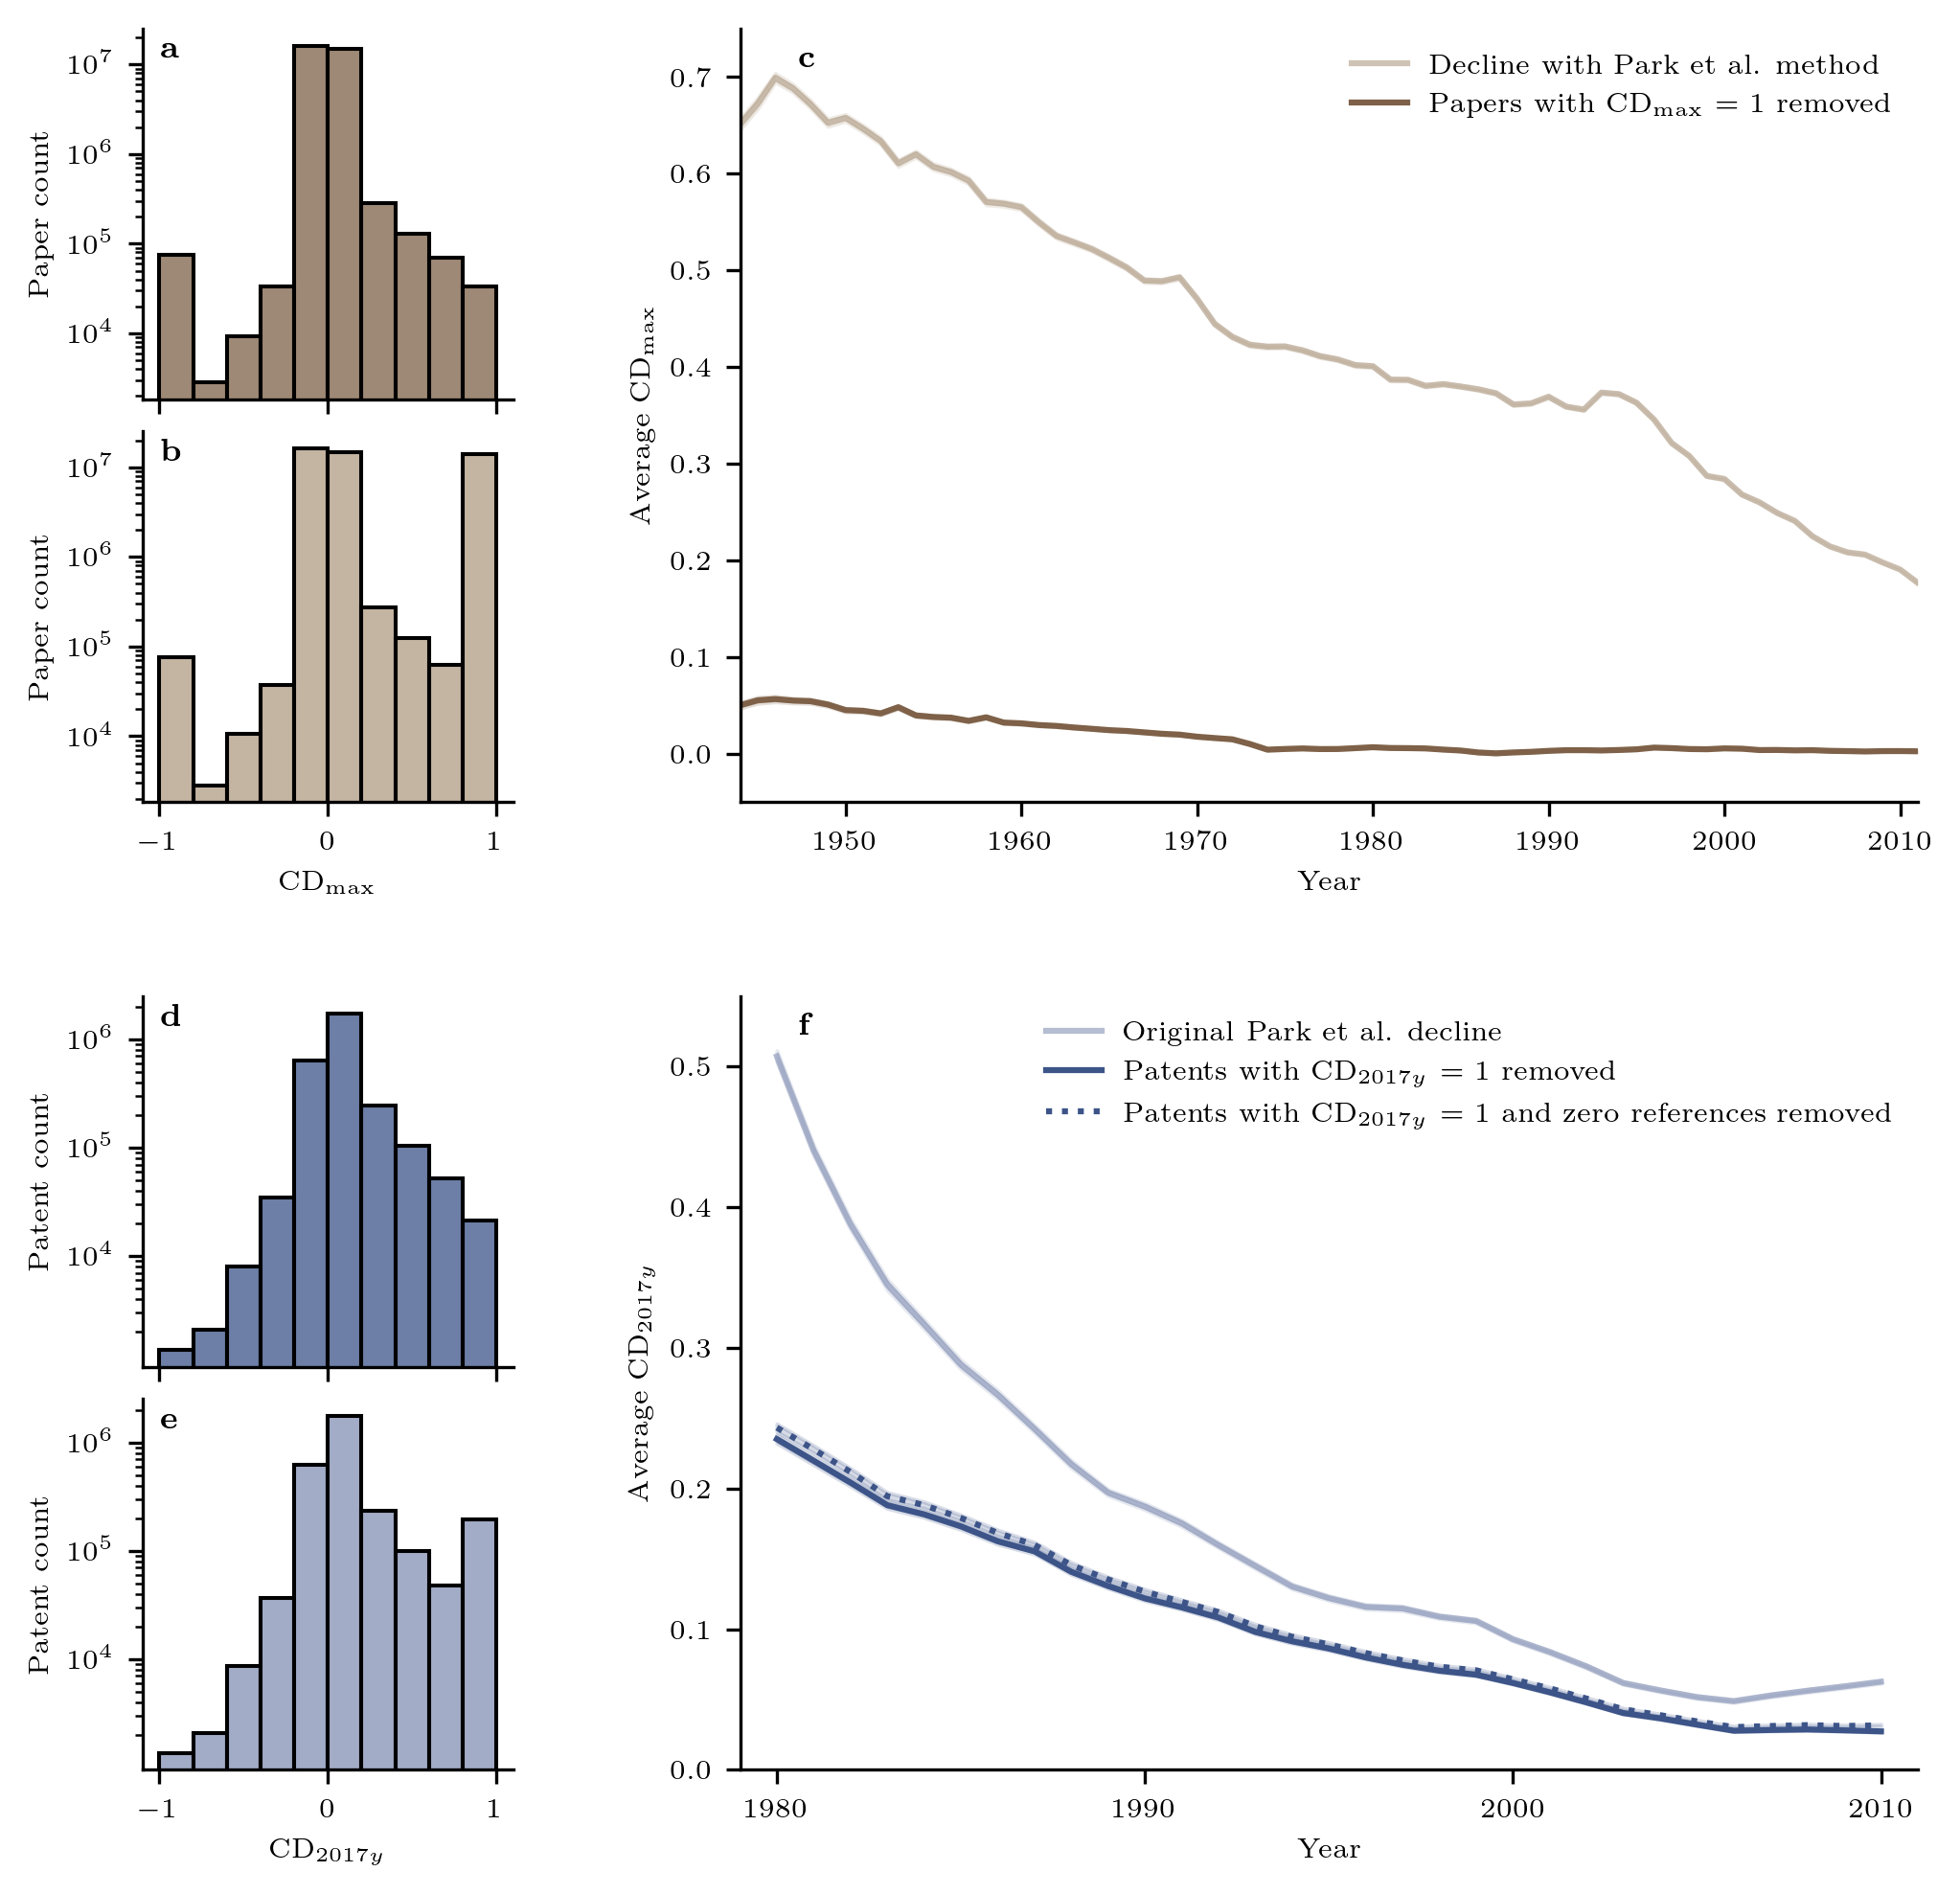

In [37]:
### RUNTIME WARNING: This cell can take some time to run ~20 min ###

CONFIDENCE_INTERVAL=95

### RECOMMENDATION: For faster runtime, set CONFIDENCE_INTERVAL to None ### 

Figure, ax = plt.subplot_mosaic([['A','.','C','C'],['B','.','C','C'],['.','.','.','.'],['D','.','F','F'],['E','.','F','F']],
                                  figsize=(7.08,6.69),gridspec_kw = {'width_ratios':[1,0.2,1,1],'height_ratios': [1,1,0.35,1,1]},dpi = 300)

plt.rcParams['legend.title_fontsize'] = 7

#=========================================== Papers =========================================================
"""
HISTOGRAM 1: Original Seaborn Binning
"""
Histogram1 = sns.histplot(x="cd_max",
             data=SciSciNet_df,
             binwidth=0.2, #this parameter causes the error (https://github.com/mwaskom/seaborn/pull/3489)
             #bins=10,
             stat="count",
             color = '#7E6148FF',
             ax=ax['A'])

ax['A'].set_yscale("log")
ax['A'].set_aspect(1/ax['A'].get_data_ratio())
ax['A'].set_xlabel(r'$\mathrm{CD}_{\mathrm{max}}$',fontsize = 7)
ax['A'].set_ylabel("Paper count",fontsize = 7)
ax['A'].text(0.05,0.92,r'$\textbf{a}$', transform=ax['A'].transAxes,fontsize = 8)

ax['A'].tick_params(axis='x', labelsize=7)
ax['A'].tick_params(axis='y', labelsize=7)
sns.despine(ax=ax['A'],left=False, bottom=False)

del Histogram1
gc.collect()

"""
HISTOGRAM 2: Correct Seaborn Binning
"""

Histogram2 = sns.histplot(x="cd_max",
             data=SciSciNet_df,
             #binwidth=0.2,
             bins=10,
             stat="count",
             color = '#B09C8599',
             ax=ax['B'])

ax['B'].set_yscale("log")
ax['B'].set_aspect(1/ax['B'].get_data_ratio())
ax['B'].set_xlabel(r'$\mathrm{CD}_{\mathrm{max}}$',fontsize = 7)
ax['B'].set_ylabel("Paper count",fontsize = 7)
ax['B'].text(0.05,0.92,r'$\textbf{b}$', transform=ax['B'].transAxes,fontsize = 8)


ax['B'].tick_params(axis='x', labelsize=7)
ax['B'].tick_params(axis='y', labelsize=7)
sns.despine(ax=ax['B'],left=False, bottom=False)

del Histogram2
gc.collect()

ax['A'].get_shared_x_axes().join(ax['B'], ax['B'])
ax['A'].set_xticklabels([])

"""
Lineplot 1: CD_max evolution over time for papers
"""

#Plot with no papers removed
sciscinetfull = sns.lineplot(data=SciSciNet_df,
             x="year",
             y="cd_max",
             color = '#B09C8599',
             ci=95,
             ax = ax['C'])

ax['C'].set_xlim(config.PAPER_MIN_YEAR, config.PAPER_MAX_YEAR)
xticks = config.PAPER_YEAR_TICKS
ax['C'].set_xticks(xticks,[str(x) for x in xticks])
ax['C'].set_xlabel("Year",fontsize = 7)
ax['C'].set_ylabel(r"Average $\mathrm{CD}_{\mathrm{max}}$",fontsize = 7)
ax['C'].set_ylim(-0.05, 0.75)
ax['C'].text(0.05,0.95,r'$\textbf{c}$', transform=ax['C'].transAxes,fontsize = 8)


ax['C'].tick_params(axis='x', labelsize=7)
ax['C'].tick_params(axis='y', labelsize=7)
sns.despine(ax=ax['C'],left=False, bottom=False)

del sciscinetfull
gc.collect()

#Plot with papers with CD_max=1 removed

#Mask to remove CD indices with value 1
mask=SciSciNet_df.cd_max!=1

sciscinet_p1 = sns.lineplot(data=SciSciNet_df[mask],
             x="year",
             y="cd_max",
             color = '#7E6148FF',
             ci=95,
             ax = ax['C'])

del sciscinet_p1
gc.collect()


legpapers = ax['C'].legend(labels=['Decline with Park et al. method',
                                   '' ,
                                   r'Papers with $\mathrm{CD}_{max}$ = 1 removed',
                                   ],
                                   loc = 'upper right',
                                   fontsize = 7
                                   )
h = legpapers.get_lines()
legpapers_b = ax['C'].legend(handles = [h[0],h[1]],
                             labels=['Decline with Park et al. method' ,r'Papers with $\mathrm{CD}_{\mathrm{max}}$ = 1 removed'],
                             loc = 'upper right',
                             fontsize = 7)
legpapers_b.get_frame().set_linewidth(0.0)

#=========================================== Patents =========================================================

"""
HISTOGRAM 3: Original Seaborn Binning
"""
Histogram3 = sns.histplot(x="cd_2017y",
             data=patentsview_df,
             binwidth=0.2, #this parameter causes the error (https://github.com/mwaskom/seaborn/pull/3489)
             #bins=10,
             stat="count",
             color = '#3C5488FF',
             ax=ax['D'])
ax['D'].set_yscale("log")
ax['D'].set_aspect(1/ax['D'].get_data_ratio())
ax['D'].set_xlabel(r"$\mathrm{CD}_{2017y}$",fontsize =7)
ax['D'].set_ylabel("Patent count",fontsize = 7)
ax['D'].set_yticks([1e4,1e5,1e6])
ax['D'].text(0.05,0.92,r'$\textbf{d}$', transform=ax['D'].transAxes,fontsize = 8)


ax['D'].tick_params(axis='x', labelsize=7)
ax['D'].tick_params(axis='y', labelsize=7)
sns.despine(ax=ax['D'],left=False, bottom=False)

del Histogram3
gc.collect()

"""
HISTOGRAM 4: Correct Seaborn Binning
"""

Histogram4 = sns.histplot(x="cd_2017y",
             data=patentsview_df,
             #binwidth=0.2,
             bins=10,
             stat="count",
             color = '#8491B499',
             ax=ax['E'])
ax['E'].set_yscale("log")
ax['E'].set_aspect(1/ax['E'].get_data_ratio())
ax['E'].set_xlabel(r"$\mathrm{CD}_{2017y}$",fontsize = 7)
ax['E'].set_ylabel("Patent count",fontsize = 7)
ax['E'].set_yticks([1e4,1e5,1e6])

ax['E'].tick_params(axis='x', labelsize=7)
ax['E'].tick_params(axis='y', labelsize=7)
ax['E'].text(0.05,0.92,r'$\textbf{e}$', transform=ax['E'].transAxes,fontsize = 8)


ax['E'].get_shared_x_axes().join(ax['D'], ax['E'])
ax['D'].set_xticklabels([])
sns.despine(ax=ax['E'],left=False, bottom=False)

del Histogram4
gc.collect()
"""
Lineplot 2: CD_2017y evolution over time for patents
"""

#Plot with no patents removed
patentsviewfull = sns.lineplot(data=patentsview_df,
             x="grant_year",
             y="cd_2017y",
             color = '#8491B499',
             ci=95,
             ax = ax['F'])

ax['F'].set_xlim(config.PATENT_MIN_YEAR, config.PATENT_MAX_YEAR)
xticks = config.PATENT_YEAR_TICKS
ax['F'].set_xticks(xticks,[str(x) for x in xticks])
ax['F'].set_xlabel("Year",fontsize = 7)
ax['F'].set_ylabel(r"Average $\mathrm{CD}_{2017y}$",fontsize = 7)
ax['F'].set_ylim(0, 0.55)
ax['F'].text(0.05,0.95,r'$\textbf{f}$', transform=ax['F'].transAxes,fontsize = 8)

ax['F'].tick_params(axis='x', labelsize=7)
ax['F'].tick_params(axis='y', labelsize=7)
sns.despine(ax=ax['F'],left=False, bottom=False)                                       

#Plot with patents with CD_2017y=1 removed

#Mask to remove CD indices with value 1
mask=patentsview_df.cd_2017y!=1

patentsview_p1 = sns.lineplot(data=patentsview_df[mask],
             x="grant_year",
             y="cd_2017y",
             color = '#3C5488FF',
             ci=95,
             ax = ax['F'])

#Plot with patents with zero references removed

#Mask to remove patents with zero references
mask=patentsview_df.cited_total!=0

patentsview_zero_ref = sns.lineplot(data=patentsview_df[mask],
                x="grant_year",
                y="cd_2017y",
                color = '#3C5488FF',
                linestyle = ':',
                ci=95,
                ax = ax['F'])

legpatents = ax['F'].legend(labels=['Original Park et al. decline',
                                    '', 
                                    r'Patents with $\mathrm{CD}_{2017y}$ = 1 removed',
                                    '',
                                    r'Patents with $\mathrm{CD}_{2017y}$ = 1 and zero references removed'],
                            loc = 'upper right',
                            fontsize = 7)
h = legpatents.get_lines()
legpatents_b = ax['F'].legend(handles = [h[0],h[1], h[2]],
                              labels=['Original Park et al. decline', 
                                       r'Patents with $\mathrm{CD}_{2017y}$ = 1 removed',
                                       r'Patents with $\mathrm{CD}_{2017y}$ = 1 and zero references removed'],
                              loc = 'upper right',
                              fontsize = 7)

legpatents_b.get_frame().set_linewidth(0.0)


del patentsviewfull
del patentsview_p1
del patentsview_zero_ref
gc.collect()

Figure.tight_layout()
Figure.subplots_adjust(hspace = 0.1,wspace = 0)
Figure.savefig(config.OUTPUT_PATH+'SupplementalFigure_cd_max.pdf')

## Supplementary Figure S8

Distribution of the normalized $\mathrm{CD}_5$ indices and the impact of the hidden outliers on the perceived temporal decline.

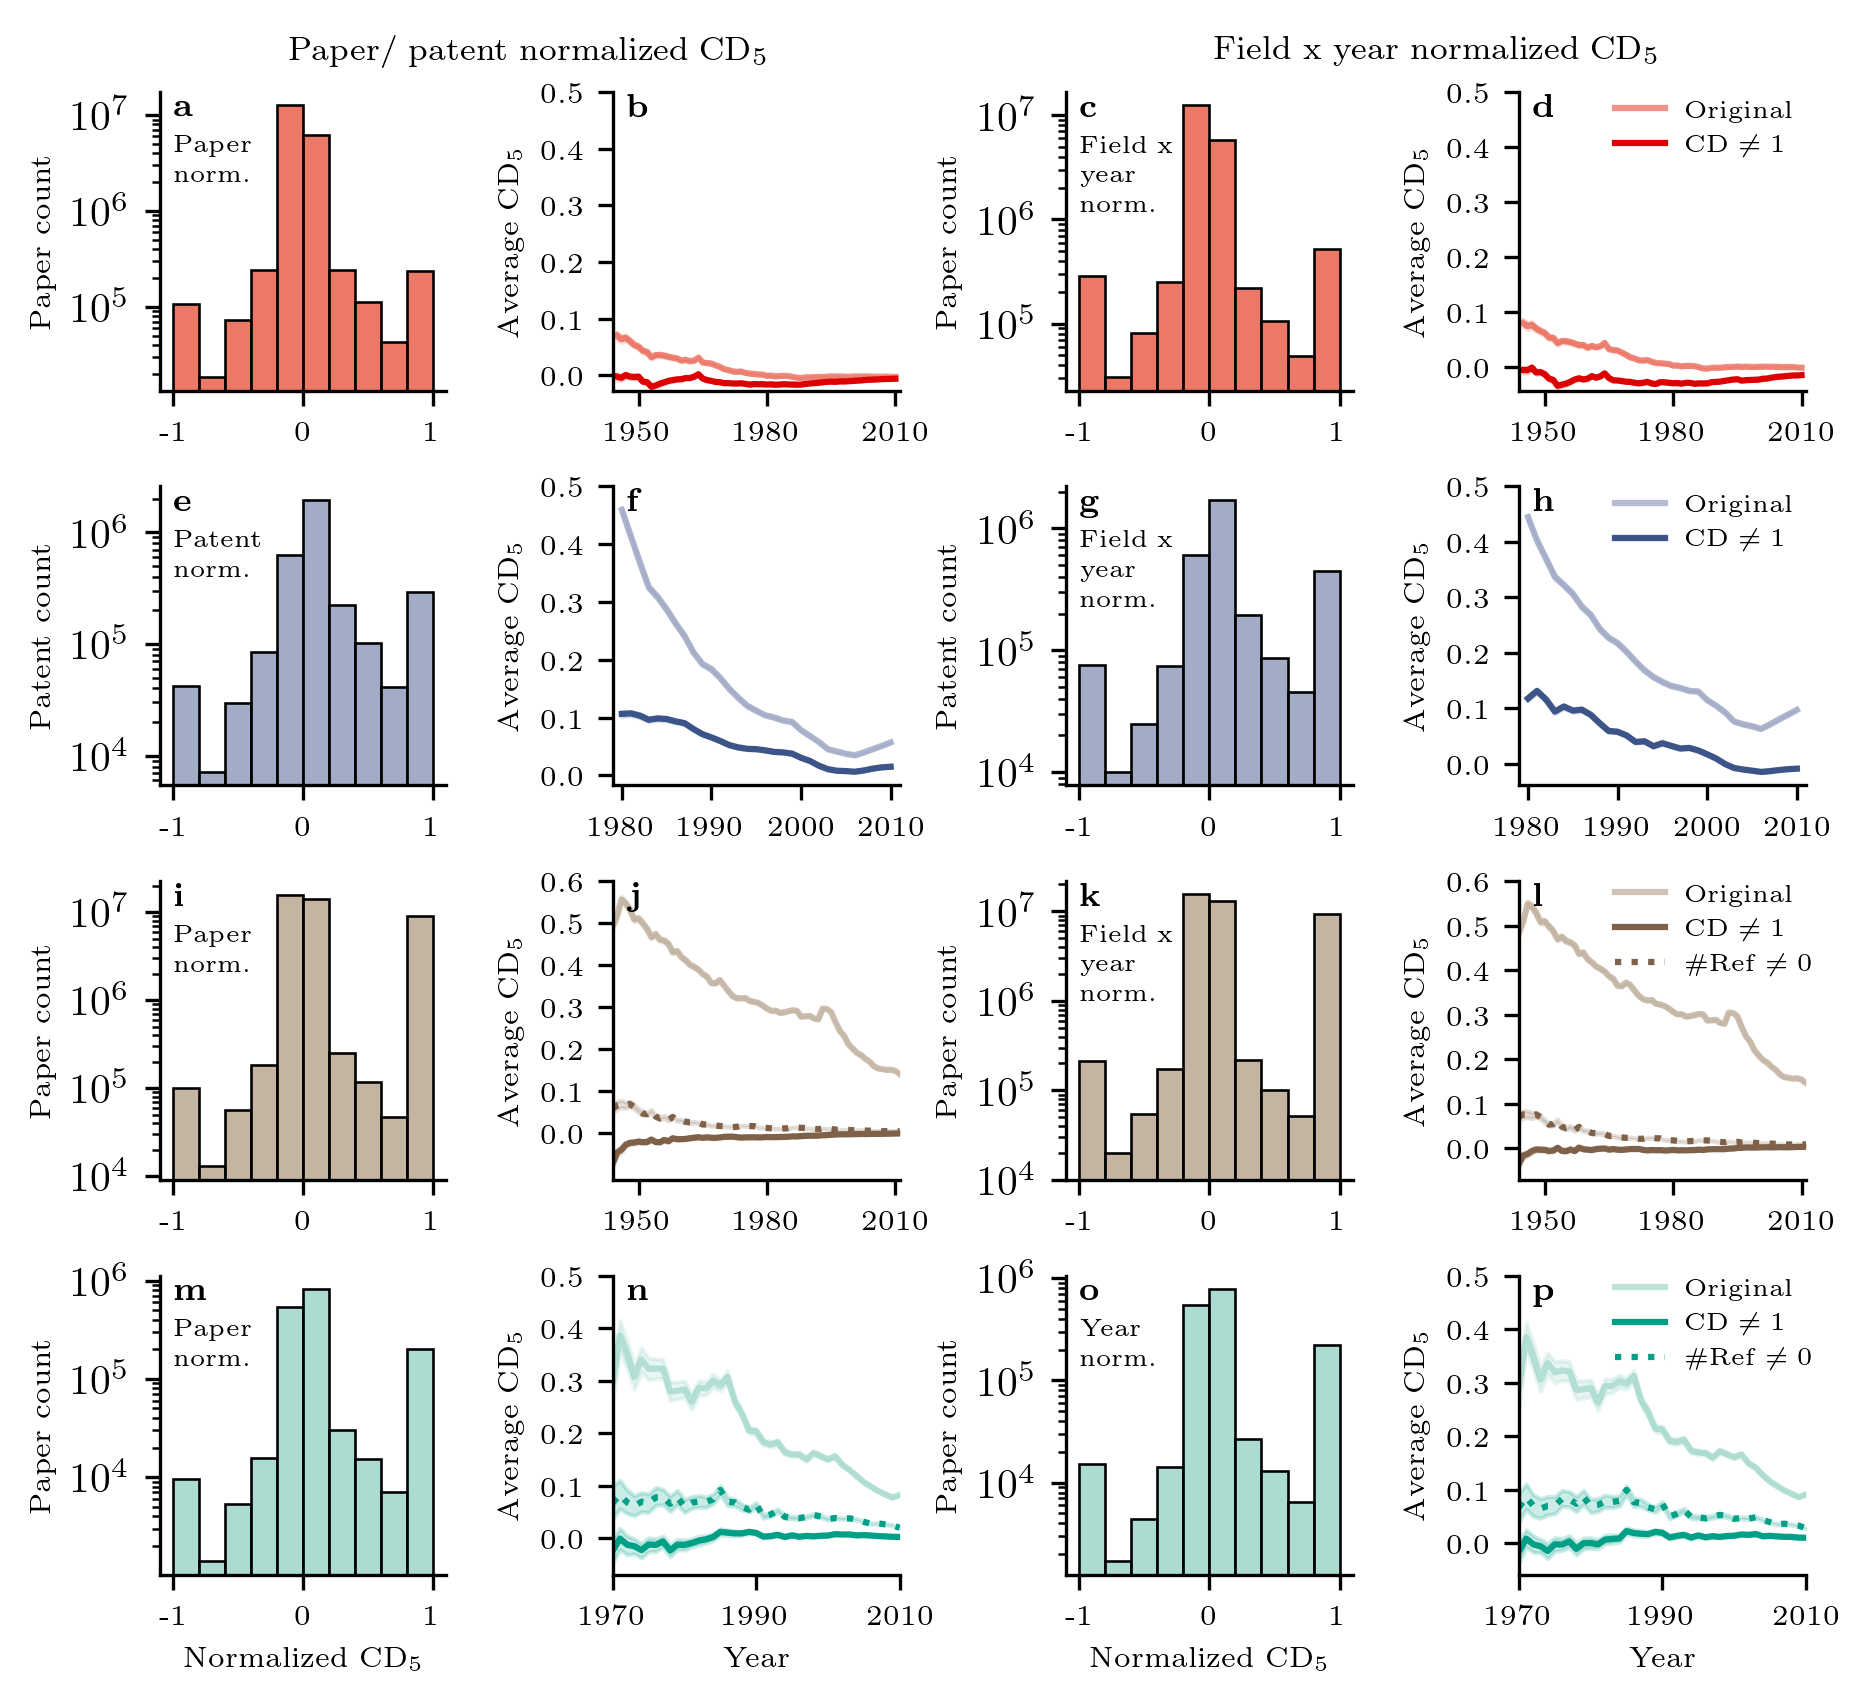

In [41]:
### RUNTIME WARNING: This cell can take some time to run ~60 min ###

CONFIDENCE_INTERVAL=95

### RECOMMENDATION: For faster runtime, set CONFIDENCE_INTERVAL to None ### 

figure, ax = plt.subplot_mosaic([['1', '1', '1', '.', '2', '2', '2'],
                                ['A', '.','B','.','C', '.', 'D'],
                                ['.', '.', '.', '.', '.', '.', '.'],
                                 ['E', '.','F','.','G', '.', 'H'],
                                ['.', '.', '.', '.', '.', '.', '.'],
                                 ['I', '.','J','.','K', '.', 'L'],
                                 ['.', '.', '.', '.', '.', '.', '.'],
                                 ['M', '.','N','.','O', '.', 'P']
                                 ],
                                figsize=(7.08,6.69),
                                gridspec_kw = {'width_ratios':[1,0.3,1,0.3,1, 0.3,1],'height_ratios': [0.1, 1, 0.1, 1, 0.1, 1, 0.1,1]},
                                dpi = 300
                                )

plt.rcParams['legend.title_fontsize'] = 7
plt.rcParams['text.usetex'] = True

#---------------------------------------------1---------------------------------------------
ax['1'].set_axis_off()
ax['1'].text(0.175,0,r'Paper/ patent normalized $\mathrm{CD}_5$', transform=ax['1'].transAxes,fontsize = 8)

#---------------------------------------------2---------------------------------------------
ax['2'].set_axis_off()
ax['2'].text(0.2,0,r'Field x year normalized $\mathrm{CD}_5$', transform=ax['2'].transAxes,fontsize = 8)
#---------------------------------------------A---------------------------------------------

#Histogram for Paper normalized CD index
mask=wos_cdindex_normalized_analytical_df.variable=='Paper normalized'

hist=sns.histplot(x="value",
             data=wos_cdindex_normalized_analytical_df[mask],
             bins=10,
             binrange=(-1,1), 
             stat="count",
             color ='#E64B3599',
             ax=ax['A'])

ax['A'].set_yscale("log")
ax['A'].set_xlabel('')
ax['A'].set_xticks([-1, 0, 1],['-1', '0', '1'], fontsize = 7)
ax['A'].set_ylabel("Paper count",fontsize = 7)
ax['A'].text(0.05,0.92,r'$\textbf{a}$', transform=ax['A'].transAxes,fontsize = 8)
ax['A'].text(0.05,0.8,'Paper', transform=ax['A'].transAxes,fontsize = 6)
ax['A'].text(0.05,0.7,'norm.', transform=ax['A'].transAxes,fontsize = 6)
sns.despine(ax=ax['A'],left=False, bottom=False)

del hist
gc.collect()

#---------------------------------------------B---------------------------------------------

#Lineplot for Paper normalized CD over time
mask=wos_cdindex_normalized_analytical_df.variable=='Paper normalized'

#Plot with no patents removed
line1=sns.lineplot(data=wos_cdindex_normalized_analytical_df[mask],
            x="pubyear",
            y="value",
            color = '#E64B3599',
            ci=CONFIDENCE_INTERVAL,
            ax = ax['B'])
          
#Plot with papers with CD=1 removed

#Mask to remove CD indices with value 1
mask2=wos_cdindex_normalized_analytical_df.value!=1

line2=sns.lineplot(data=wos_cdindex_normalized_analytical_df[mask&mask2],
             x="pubyear",
             y="value",
             color = '#DC0000FF',
             ci=CONFIDENCE_INTERVAL,
             ax = ax['B'])

ax['B'].set_xlim(config.PAPER_MIN_YEAR, config.PAPER_MAX_YEAR)
xticks = config.PAPER_YEAR_TICKS
ax['B'].set_xticks([1950, 1980, 2010])
ax['B'].set_xlabel('')
ax['B'].set_ylabel(r"Average $\mathrm{CD}_{5}$",fontsize = 7)
ax['B'].set_yticks(np.arange(0,0.6,0.1))

ax['B'].text(0.05,0.92,r'$\textbf{b}$', transform=ax['B'].transAxes,fontsize = 8)

ax['B'].tick_params(axis='x', labelsize=7)
ax['B'].tick_params(axis='y', labelsize=7)

sns.despine(ax=ax['B'],left=False, bottom=False)

del line1, line2
gc.collect()

#---------------------------------------------C---------------------------------------------

#Histogram for Field x year normalized CD index

mask=wos_cdindex_normalized_analytical_df.variable=='Field × year normalized'

hist=sns.histplot(x="value",
             data=wos_cdindex_normalized_analytical_df[mask],
             bins=10,
             binrange=(-1,1), 
             stat="count",
             color ='#E64B3599',
             ax=ax['C'])

ax['C'].set_yscale("log")
ax['C'].set_xlabel('')
ax['C'].set_xticks([-1, 0, 1],['-1', '0', '1'], fontsize = 7)
ax['C'].set_ylabel("Paper count",fontsize = 7)
ax['C'].text(0.05,0.92,r'$\textbf{c}$', transform=ax['C'].transAxes,fontsize = 8)
ax['C'].text(0.05,0.8,'Field x', transform=ax['C'].transAxes,fontsize = 6)
ax['C'].text(0.05,0.7,'year', transform=ax['C'].transAxes,fontsize = 6)
ax['C'].text(0.05,0.6,'norm.', transform=ax['C'].transAxes,fontsize = 6)

sns.despine(ax=ax['C'],left=False, bottom=False)

del hist
gc.collect()

#---------------------------------------------D---------------------------------------------

#Lineplot for Field x year normalized CD over time
mask=wos_cdindex_normalized_analytical_df.variable=='Field × year normalized'

#Plot with no patents removed
line1=sns.lineplot(data=wos_cdindex_normalized_analytical_df[mask],
            x="pubyear",
            y="value",
            color = '#E64B3599',
            ci=CONFIDENCE_INTERVAL,
            ax = ax['D'])
          
#Plot with papers with CD=1 removed

#Mask to remove CD indices with value 1
mask2=wos_cdindex_normalized_analytical_df.value!=1

line2=sns.lineplot(data=wos_cdindex_normalized_analytical_df[mask&mask2],
             x="pubyear",
             y="value",
             color = '#DC0000FF',
             ci=CONFIDENCE_INTERVAL,
             ax = ax['D'])

ax['D'].set_xlim(config.PAPER_MIN_YEAR, config.PAPER_MAX_YEAR)
xticks = config.PAPER_YEAR_TICKS
ax['D'].set_xticks(xticks,[str(x) for x in xticks])
ax['D'].set_xticks([1950, 1980, 2010])
ax['D'].set_xlabel('')
ax['D'].set_ylabel(r"Average $\mathrm{CD}_{5}$",fontsize = 7)
ax['D'].set_yticks(np.arange(0,0.6,0.1))
ax['D'].text(0.05,0.92,r'$\textbf{d}$', transform=ax['D'].transAxes,fontsize = 8)

ax['D'].tick_params(axis='x', labelsize=7)
ax['D'].tick_params(axis='y', labelsize=7)

legpatents = ax['D'].legend(labels=['original',
                                    '', 
                                    'minus CD=1'
                                    ],
                            loc = 'upper right',
                            fontsize = 6)
h = legpatents.get_lines()
legpatents_b = ax['D'].legend(handles = [h[0],h[1]],
                              labels=['Original', 
                                r'$\mathrm{CD} \neq 1$'
                                ],
                              loc = (0.3,0.75),
                              fontsize = 6,
                              frameon=False
                              )

sns.despine(ax=ax['D'],left=False, bottom=False)

del line1, line2
gc.collect()

#---------------------------------------------E---------------------------------------------

#Histogram for Patent normalized CD index
mask=patentsview_cdindex_normalized_analytical_df.variable=='Patent normalized'
hist=sns.histplot(x="value",
             data=patentsview_cdindex_normalized_analytical_df[mask],
             bins=10,
             binrange=(-1,1), 
             stat="count",
             color = '#8491B499',
             ax=ax['E'])

ax['E'].set_yscale("log")
ax['E'].set_xlabel('')
ax['E'].set_xticks([-1, 0, 1],['-1', '0', '1'], fontsize = 7)
ax['E'].set_ylabel("Patent count",fontsize = 7)
ax['E'].text(0.05,0.92,r'$\textbf{e}$', transform=ax['E'].transAxes,fontsize = 8)
ax['E'].text(0.05,0.8,'Patent', transform=ax['E'].transAxes,fontsize = 6)
ax['E'].text(0.05,0.7,'norm.', transform=ax['E'].transAxes,fontsize = 6)
sns.despine(ax=ax['E'],left=False, bottom=False)
del hist
gc.collect()

#---------------------------------------------F---------------------------------------------

#Lineplot for Patent normalized CD over time
mask=patentsview_cdindex_normalized_analytical_df.variable=='Patent normalized'

#Plot with no patents removed
line1=sns.lineplot(data=patentsview_cdindex_normalized_analytical_df[mask],
            x="grant_year",
            y="value",
            color = '#8491B499',
            ci=CONFIDENCE_INTERVAL,
            ax = ax['F'])
          
#Plot with patents with CD=1 removed

#Mask to remove CD indices with value 1
mask2=patentsview_cdindex_normalized_analytical_df.value!=1

line2=sns.lineplot(data=patentsview_cdindex_normalized_analytical_df[mask&mask2],
             x="grant_year",
             y="value",
             color = '#3C5488FF',
             ci=CONFIDENCE_INTERVAL,
             ax = ax['F'])

ax['F'].set_xlim(config.PATENT_MIN_YEAR, config.PATENT_MAX_YEAR)
xticks = config.PATENT_YEAR_TICKS
ax['F'].set_xticks(xticks,[str(x) for x in xticks])
ax['F'].set_xlabel('')
ax['F'].set_ylabel(r"Average $\mathrm{CD}_{5}$",fontsize = 7)
ax['F'].set_yticks(np.arange(0.0,0.6,0.1))
ax['F'].text(0.05,0.92,r'$\textbf{f}$', transform=ax['F'].transAxes,fontsize = 8)

ax['F'].tick_params(axis='x', labelsize=7)
ax['F'].tick_params(axis='y', labelsize=7)

sns.despine(ax=ax['F'],left=False, bottom=False)

del line1, line2
gc.collect()

#---------------------------------------------G---------------------------------------------

#Histogram for Field x year normalized CD index
mask=patentsview_cdindex_normalized_analytical_df.variable=='Field × year normalized'
hist=sns.histplot(x="value",
             data=patentsview_cdindex_normalized_analytical_df[mask],
             bins=10,
             binrange=(-1,1), 
             stat="count",
             color = '#8491B499',
             ax=ax['G'])

ax['G'].set_yscale("log")
ax['G'].set_xlabel('')
ax['G'].set_xticks([-1, 0, 1],['-1', '0', '1'], fontsize=7)
ax['G'].set_ylabel("Patent count",fontsize = 7)
ax['G'].text(0.05,0.92,r'$\textbf{g}$', transform=ax['G'].transAxes,fontsize = 8)
ax['G'].text(0.05,0.8,'Field x', transform=ax['G'].transAxes,fontsize = 6)
ax['G'].text(0.05,0.7,'year', transform=ax['G'].transAxes,fontsize = 6)
ax['G'].text(0.05,0.6,'norm.', transform=ax['G'].transAxes,fontsize = 6)
sns.despine(ax=ax['G'],left=False, bottom=False)

del hist
gc.collect()

#---------------------------------------------H---------------------------------------------

#Lineplot for Patent normalized CD over time
mask=patentsview_cdindex_normalized_analytical_df.variable=='Field × year normalized'

#Plot with no patents removed
line1=sns.lineplot(data=patentsview_cdindex_normalized_analytical_df[mask],
            x="grant_year",
            y="value",
            color ='#8491B499',
            ci=CONFIDENCE_INTERVAL,
            ax = ax['H'])
          
#Plot with patents with CD=1 removed

#Mask to remove CD indices with value 1
mask2=patentsview_cdindex_normalized_analytical_df.value!=1

line2=sns.lineplot(data=patentsview_cdindex_normalized_analytical_df[mask&mask2],
             x="grant_year",
             y="value",
             color ='#3C5488FF',
             ci=CONFIDENCE_INTERVAL,
             ax = ax['H'])

ax['H'].set_xlim(config.PATENT_MIN_YEAR, config.PATENT_MAX_YEAR)
xticks = config.PATENT_YEAR_TICKS
ax['H'].set_xticks(xticks,[str(x) for x in xticks])
ax['H'].set_xlabel('')
ax['H'].set_ylabel(r"Average $\mathrm{CD}_{5}$",fontsize = 7)
ax['H'].set_yticks(np.arange(0.0,0.6,0.1))
ax['H'].text(0.05,0.92,r'$\textbf{h}$', transform=ax['H'].transAxes,fontsize = 8)

ax['H'].tick_params(axis='x', labelsize=7)
ax['H'].tick_params(axis='y', labelsize=7)

legpatents = ax['H'].legend(labels=['original',
                                    '', 
                                    'minus CD=1'
                                    ],
                            loc = 'upper right',
                            fontsize = 6)
h = legpatents.get_lines()
legpatents_b = ax['H'].legend(handles = [h[0],h[1]],
                              labels=['Original', 
                                r'$\mathrm{CD} \neq 1$'],
                              loc = (0.3,0.75),
                              fontsize = 6,
                              frameon=False
                              )

sns.despine(ax=ax['H'],left=False, bottom=False)

del line1, line2
gc.collect()

#---------------------------------------------I---------------------------------------------

hist=sns.histplot(x='cd_5_paper_norm',
             data=SciSciNet_df,
             bins=10,
             binrange=(-1,1), 
             stat="count",
             color ='#B09C8599',
             ax=ax['I'])

ax['I'].set_yscale("log")
ax['I'].set_xlabel('')
ax['I'].set_xticks([-1, 0, 1],['-1', '0', '1'], fontsize = 7)
ax['I'].set_ylabel("Paper count",fontsize = 7)
# Major y-ticks at 10^4, 10^5, 10^6, 10^7
yticks_major = [10**4, 10**5, 10**6, 10**7]
ax['I'].set_yticks(yticks_major)
ax['I'].get_yaxis().set_major_formatter(plt.ScalarFormatter())
def log_format(x, pos):
    return f'$10^{{{int(np.log10(x))}}}$'

ax['I'].get_yaxis().set_major_formatter(ticker.FuncFormatter(log_format))

# Minor y-ticks for logarithmic scale
yticks_minor = LogLocator(subs='all', numticks=12)
ax['I'].yaxis.set_minor_locator(yticks_minor)
ax['I'].text(0.05,0.92,r'$\textbf{i}$', transform=ax['I'].transAxes,fontsize = 8)
ax['I'].text(0.05,0.8,'Paper', transform=ax['I'].transAxes,fontsize = 6)
ax['I'].text(0.05,0.7,'norm.', transform=ax['I'].transAxes,fontsize = 6)
sns.despine(ax=ax['I'],left=False, bottom=False)

del hist
gc.collect()

#---------------------------------------------J---------------------------------------------

#Plot with no patents removed
line1=sns.lineplot(data=SciSciNet_df,
            x='year',
            y='cd_5_paper_norm',
            color = '#B09C8599',
            ci=CONFIDENCE_INTERVAL,
            ax = ax['J'])
          
#Plot with papers with CD=1 removed

#Mask to remove CD indices with value 1
mask=SciSciNet_df.cd_5_paper_norm!=1

line2=sns.lineplot(data=SciSciNet_df[mask],
             x="year",
             y="cd_5_paper_norm",
             color = '#7E6148FF',
             ci=CONFIDENCE_INTERVAL,
             ax = ax['J'])

#Plot with papers with zero references removed

#Mask to remove patents with zero references
mask=SciSciNet_df.references!=0

line3=sns.lineplot(data=SciSciNet_df[mask],
             x="year",
             y="cd_5_paper_norm",
             color = '#7E6148FF',
             linestyle = ':',
             ci=CONFIDENCE_INTERVAL,
             ax = ax['J'])

ax['J'].set_xlim(config.PAPER_MIN_YEAR, config.PAPER_MAX_YEAR)
xticks = config.PAPER_YEAR_TICKS
ax['J'].set_xticks([1950, 1980, 2010])
ax['J'].set_xlabel('')
ax['J'].set_ylabel(r"Average $\mathrm{CD}_{5}$",fontsize = 7)
ax['J'].set_yticks(np.arange(0,0.7,0.1)
                   )
ax['J'].text(0.05,0.92,r'$\textbf{j}$', transform=ax['J'].transAxes,fontsize = 8)

ax['J'].tick_params(axis='x', labelsize=7)
ax['J'].tick_params(axis='y', labelsize=7)

sns.despine(ax=ax['J'],left=False, bottom=False)

del line1, line2, line3
gc.collect()

#---------------------------------------------K---------------------------------------------

hist=sns.histplot(x='cd_5_field_x_year_norm',
             data=SciSciNet_df,
             bins=10,
             binrange=(-1,1), 
             stat="count",
             color ='#B09C8599',
             ax=ax['K'])

ax['K'].set_yscale("log")
ax['K'].set_xlabel('')
ax['K'].set_xticks([-1, 0, 1],['-1', '0', '1'], fontsize = 7)
ax['K'].set_ylabel("Paper count",fontsize = 7)
# Major y-ticks at 10^4, 10^5, 10^6, 10^7
yticks_major = [10**4, 10**5, 10**6, 10**7]
ax['K'].set_yticks(yticks_major)
ax['K'].get_yaxis().set_major_formatter(plt.ScalarFormatter())
def log_format(x, pos):
    return f'$10^{{{int(np.log10(x))}}}$'

ax['K'].get_yaxis().set_major_formatter(ticker.FuncFormatter(log_format))

# Minor y-ticks for logarithmic scale
yticks_minor = LogLocator(subs='all', numticks=12)
ax['K'].yaxis.set_minor_locator(yticks_minor)
ax['K'].text(0.05,0.92,r'$\textbf{k}$', transform=ax['K'].transAxes,fontsize = 8)
ax['K'].text(0.05,0.8,'Field x', transform=ax['K'].transAxes,fontsize = 6)
ax['K'].text(0.05,0.7,'year', transform=ax['K'].transAxes,fontsize = 6)
ax['K'].text(0.05,0.6,'norm.', transform=ax['K'].transAxes,fontsize = 6)
sns.despine(ax=ax['K'],left=False, bottom=False)

del hist
gc.collect()

#---------------------------------------------L---------------------------------------------

#Plot with no patents removed
line1=sns.lineplot(data=SciSciNet_df,
            x='year',
            y='cd_5_field_x_year_norm',
            color = '#B09C8599',
            ci=CONFIDENCE_INTERVAL,
            ax = ax['L'])
          
#Plot with papers with CD=1 removed

#Mask to remove CD indices with value 1
mask=SciSciNet_df.cd_5_paper_norm!=1

line2=sns.lineplot(data=SciSciNet_df[mask],
             x="year",
             y="cd_5_field_x_year_norm",
             color = '#7E6148FF',
             ci=CONFIDENCE_INTERVAL,
             ax = ax['L'])

#Plot with papers with zero references removed

#Mask to remove patents with zero references
mask=SciSciNet_df.references!=0

line3=sns.lineplot(data=SciSciNet_df[mask],
             x="year",
             y="cd_5_field_x_year_norm",
             color = '#7E6148FF',
             linestyle = ':',
             ci=CONFIDENCE_INTERVAL,
             ax = ax['L'])

ax['L'].set_xlim(config.PAPER_MIN_YEAR, config.PAPER_MAX_YEAR)
xticks = config.PAPER_YEAR_TICKS
ax['L'].set_xticks([1950, 1980, 2010])
ax['L'].set_xlabel('')
ax['L'].set_ylabel(r"Average $\mathrm{CD}_{5}$",fontsize = 7)
ax['L'].set_yticks(np.arange(0,0.7,0.1)
                   )
ax['L'].text(0.05,0.92,r'$\textbf{l}$', transform=ax['L'].transAxes,fontsize = 8)

ax['L'].tick_params(axis='x', labelsize=7)
ax['L'].tick_params(axis='y', labelsize=7)

legpatents = ax['L'].legend(labels=['original',
                                    '', 
                                    'minus CD=1',
                                    '',
                                    'minus zero ref.'],
                            loc = 'upper right',
                            fontsize = 6)
h = legpatents.get_lines()
legpatents_b = ax['L'].legend(handles = [h[0],h[1], h[2]],
                              labels=['Original', 
                                r'$\mathrm{CD} \neq 1$',
                                r'$\# \mathrm{Ref} \neq 0$'],
                              loc = (0.3,0.65),
                              fontsize = 6,
                              frameon=False
                              )

sns.despine(ax=ax['L'],left=False, bottom=False)

del line1, line2, line3
gc.collect()

#---------------------------------------------M---------------------------------------------

hist=sns.histplot(x='cd_5_paper_norm',
             data=DBLPv14_df,
             bins=10,
             binrange=(-1,1), 
             stat="count",
             color ='#91D1C299',
             ax=ax['M'])

ax['M'].set_yscale("log")
ax['M'].set_xlabel(r'Normalized $\mathrm{CD}_5$', fontsize = 7)
ax['M'].set_xticks([-1, 0, 1],['-1', '0', '1'], fontsize = 7)
ax['M'].set_ylabel("Paper count",fontsize = 7)
ax['M'].text(0.05,0.92,r'$\textbf{m}$', transform=ax['M'].transAxes,fontsize = 8)
ax['M'].text(0.05,0.8,'Paper', transform=ax['M'].transAxes,fontsize = 6)
ax['M'].text(0.05,0.7,'norm.', transform=ax['M'].transAxes,fontsize = 6)
sns.despine(ax=ax['M'],left=False, bottom=False)

del hist
gc.collect()

#---------------------------------------------N---------------------------------------------

#Plot with no patents removed
line1=sns.lineplot(data=DBLPv14_df,
            x='year',
            y='cd_5_paper_norm',
            color = '#91D1C299',
            ci=CONFIDENCE_INTERVAL,
            ax = ax['N'])
          
#Plot with papers with CD=1 removed

#Mask to remove CD indices with value 1
mask=DBLPv14_df.cd_5_paper_norm!=1

line2=sns.lineplot(data=DBLPv14_df[mask],
             x="year",
             y="cd_5_paper_norm",
             color = '#00A087FF',
             ci=CONFIDENCE_INTERVAL,
             ax = ax['N'])

#Plot with papers with zero references removed

#Mask to remove patents with zero references
mask=DBLPv14_df.references!=0

line3=sns.lineplot(data=DBLPv14_df[mask],
             x="year",
             y="cd_5_paper_norm",
             color = '#00A087FF',
             linestyle = ':',
             ci=CONFIDENCE_INTERVAL,
             ax = ax['N'])

ax['N'].set_xlim(config.DBLP_MIN_YEAR, config.DBLP_MAX_YEAR)
xticks = config.DBLP_YEAR_TICKS
ax['N'].set_xticks([1970, 1990, 2010])
ax['N'].set_xlabel('Year', fontsize=7)
ax['N'].set_ylabel(r"Average $\mathrm{CD}_{5}$",fontsize = 7)
ax['N'].set_yticks(np.arange(0,0.6,0.1)
                   )
ax['N'].text(0.05,0.92,r'$\textbf{n}$', transform=ax['N'].transAxes,fontsize = 8)

ax['N'].tick_params(axis='x', labelsize=7)
ax['N'].tick_params(axis='y', labelsize=7)

sns.despine(ax=ax['N'],left=False, bottom=False)

del line1, line2, line3
gc.collect()

#---------------------------------------------O---------------------------------------------

hist=sns.histplot(x='cd_5_year_norm',
             data=DBLPv14_df,
             bins=10,
             binrange=(-1,1), 
             stat="count",
             color ='#91D1C299',
             ax=ax['O'])

ax['O'].set_yscale("log")
ax['O'].set_xlabel(r'Normalized $\mathrm{CD}_5$', fontsize = 7)
ax['O'].set_xticks([-1, 0, 1],['-1', '0', '1'], fontsize = 7)
ax['O'].set_ylabel("Paper count",fontsize = 7)
ax['O'].text(0.05,0.92,r'$\textbf{o}$', transform=ax['O'].transAxes,fontsize = 8)
ax['O'].text(0.05,0.8,'Year', transform=ax['O'].transAxes,fontsize = 6)
ax['O'].text(0.05,0.7,'norm.', transform=ax['O'].transAxes,fontsize = 6)
sns.despine(ax=ax['O'],left=False, bottom=False)

del hist
gc.collect()

#---------------------------------------------P---------------------------------------------

#Plot with no papers removed
line1=sns.lineplot(data=DBLPv14_df,
            x='year',
            y='cd_5_year_norm',
            color = '#91D1C299',
            ci=CONFIDENCE_INTERVAL,
            ax = ax['P'])
          
#Plot with papers with CD=1 removed

#Mask to remove CD indices with value 1
mask=DBLPv14_df.cd_5_paper_norm!=1

line2=sns.lineplot(data=DBLPv14_df[mask],
             x="year",
             y="cd_5_year_norm",
             color = '#00A087FF',
             ci=CONFIDENCE_INTERVAL,
             ax = ax['P'])

#Plot with papers with zero references removed

#Mask to remove patents with zero references
mask=DBLPv14_df.references!=0

line3=sns.lineplot(data=DBLPv14_df[mask],
             x="year",
             y="cd_5_year_norm",
             color = '#00A087FF',
             linestyle = ':',
             ci=CONFIDENCE_INTERVAL,
             ax = ax['P'])

ax['P'].set_xlim(config.DBLP_MIN_YEAR, config.DBLP_MAX_YEAR)
xticks = config.DBLP_YEAR_TICKS
ax['P'].set_xticks([1970, 1990, 2010])
ax['P'].set_xlabel('Year', fontsize=7)
ax['P'].set_ylabel(r"Average $\mathrm{CD}_{5}$",fontsize = 7)
ax['P'].set_yticks(np.arange(0,0.6,0.1)
                   )
ax['P'].text(0.05,0.92,r'$\textbf{p}$', transform=ax['P'].transAxes,fontsize = 8)

ax['P'].tick_params(axis='x', labelsize=7)
ax['P'].tick_params(axis='y', labelsize=7)

legpatents = ax['P'].legend(labels=['original',
                                    '', 
                                    'minus CD=1',
                                    '',
                                    'minus zero ref.'],
                            loc = 'upper right',
                            fontsize = 6)
h = legpatents.get_lines()
legpatents_b = ax['P'].legend(handles = [h[0],h[1], h[2]],
                              labels=['Original', 
                                r'$\mathrm{CD} \neq 1$',
                                r'$\# \mathrm{Ref} \neq 0$'],
                              loc = (0.3,0.65),
                              fontsize = 6,
                              frameon=False
                              )

sns.despine(ax=ax['P'],left=False, bottom=False)

del line1, line2, line3
gc.collect()

figure.savefig(config.OUTPUT_PATH+'SupplementalFigure_normalized_measures.pdf')

plt.show()